In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score, plot_roc_curve
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
import warnings
from itertools import combinations
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## PREPROCESSING

In [2]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

In [3]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [4]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can drop "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature" due to unsufficent number of data 

In [6]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
df_train=df_train.drop(["Alley", "FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
df_train.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

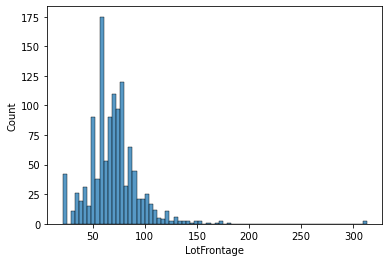

In [11]:
sns.histplot(df_train['LotFrontage'])

In [12]:
df_train.select_dtypes('object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [13]:
df_train.select_dtypes('number')

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

In [14]:
df_train=df_train.dropna()

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

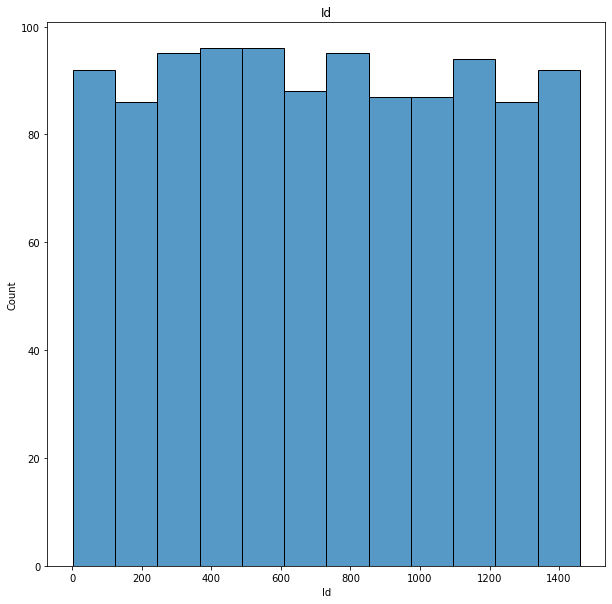

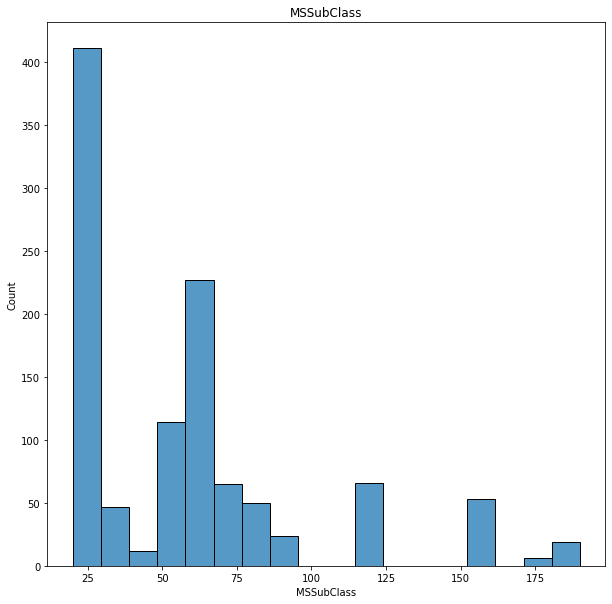

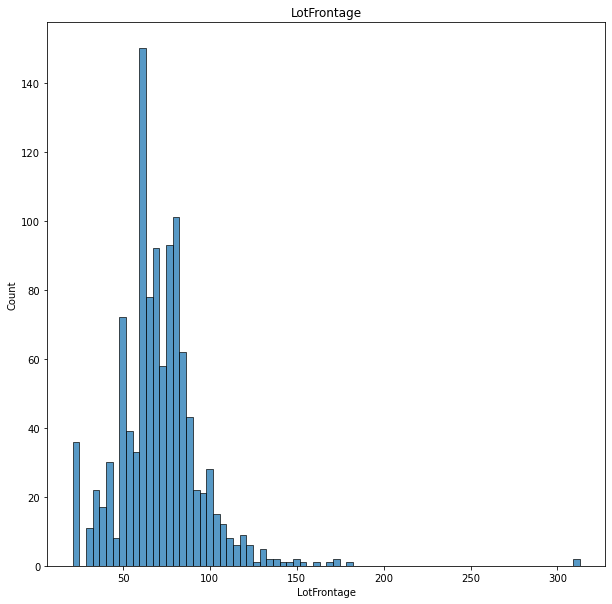

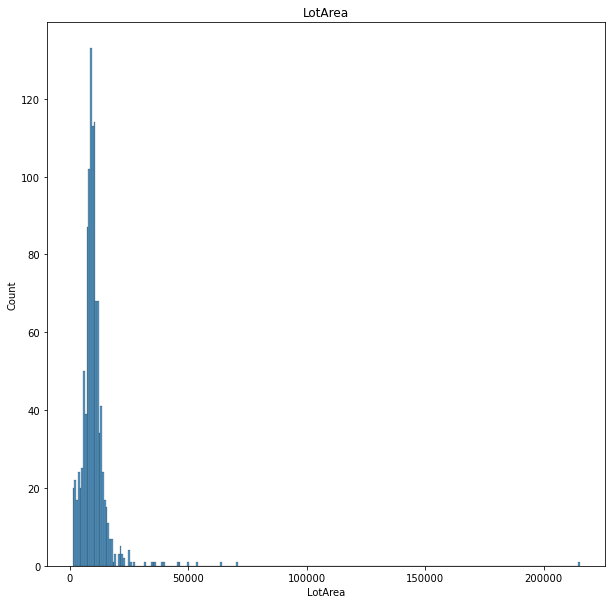

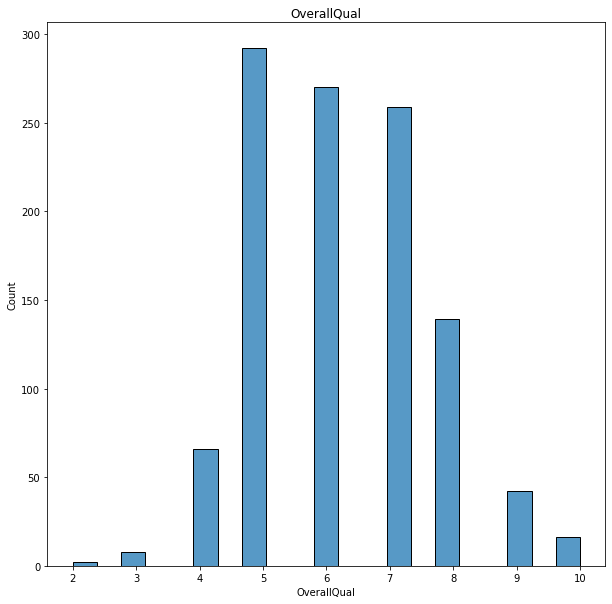

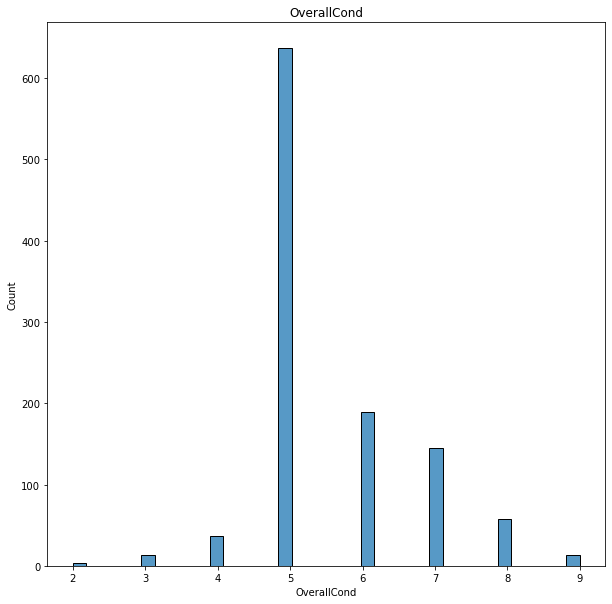

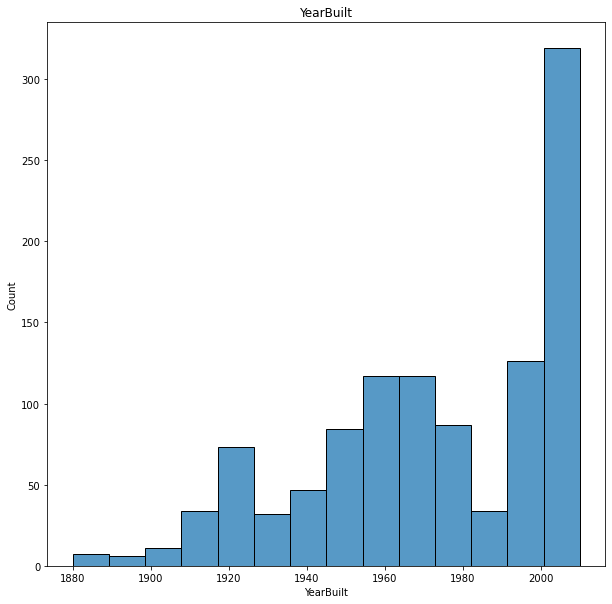

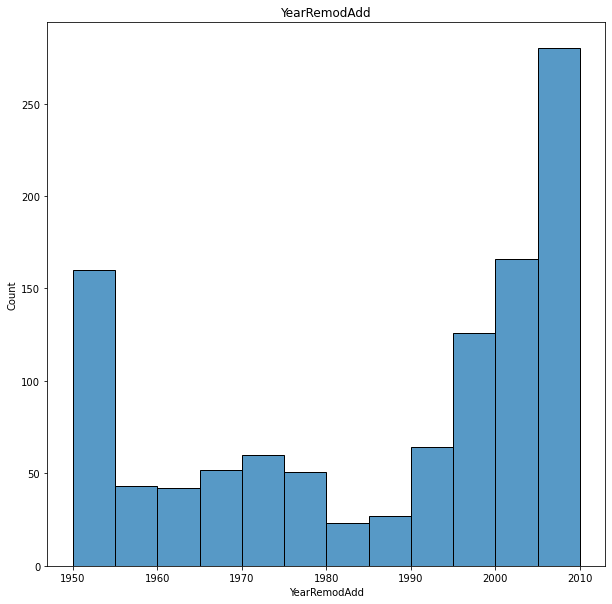

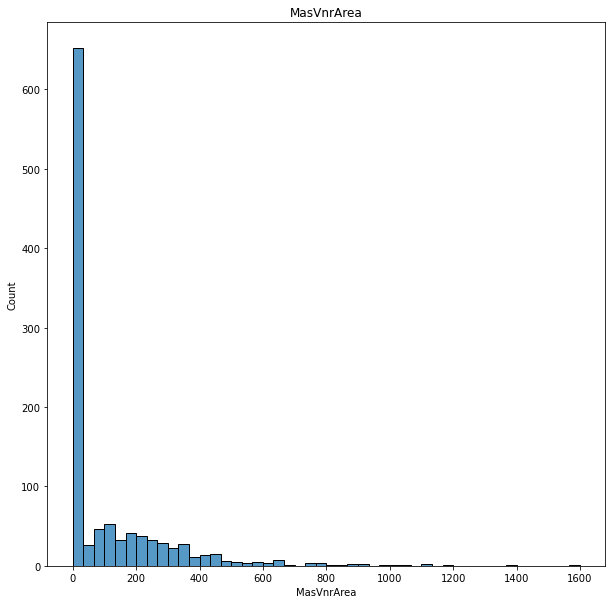

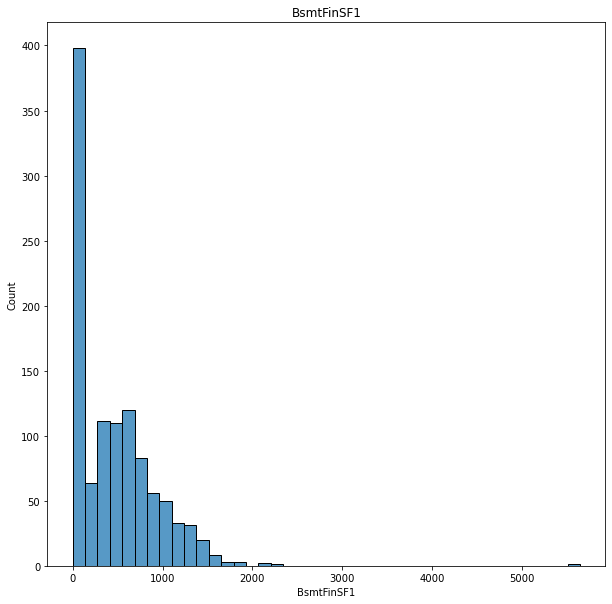

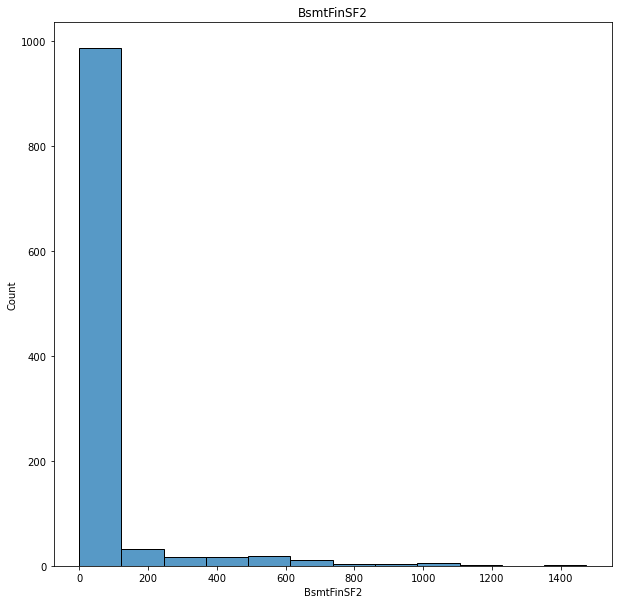

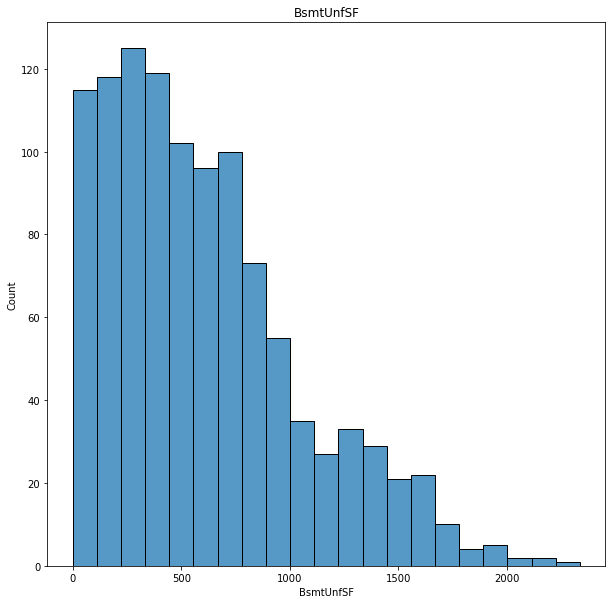

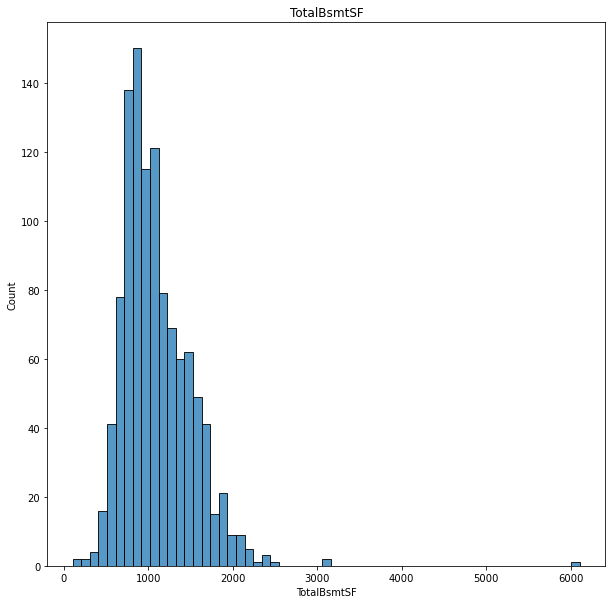

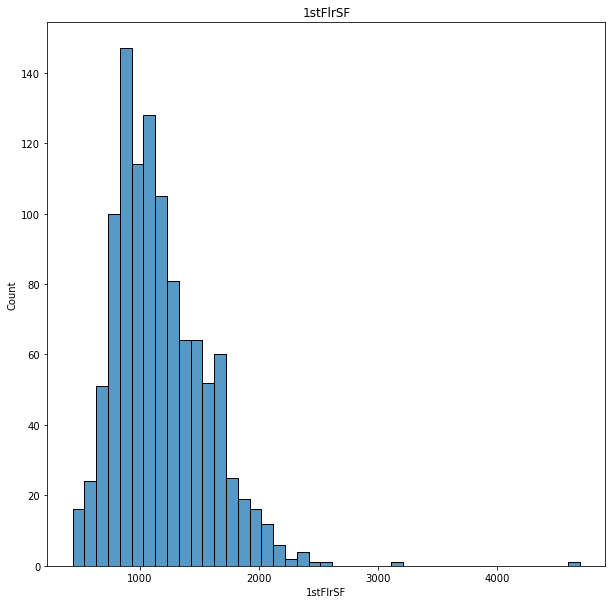

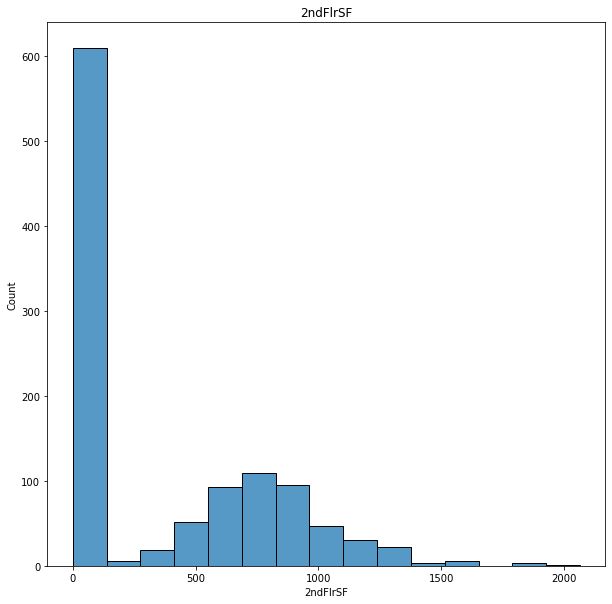

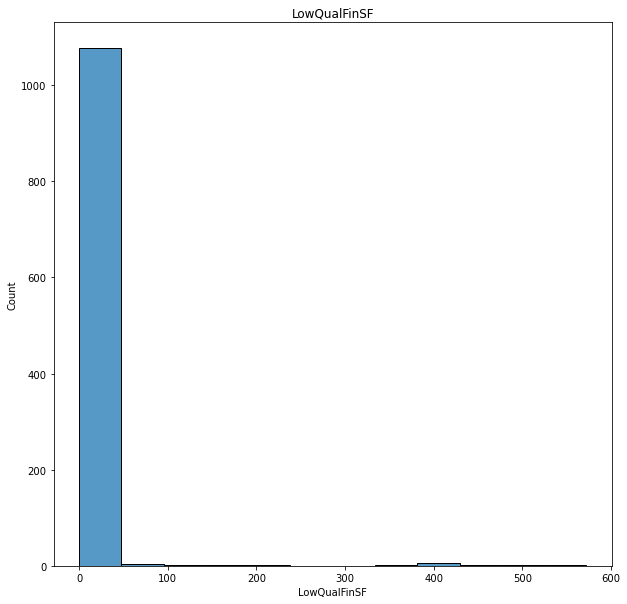

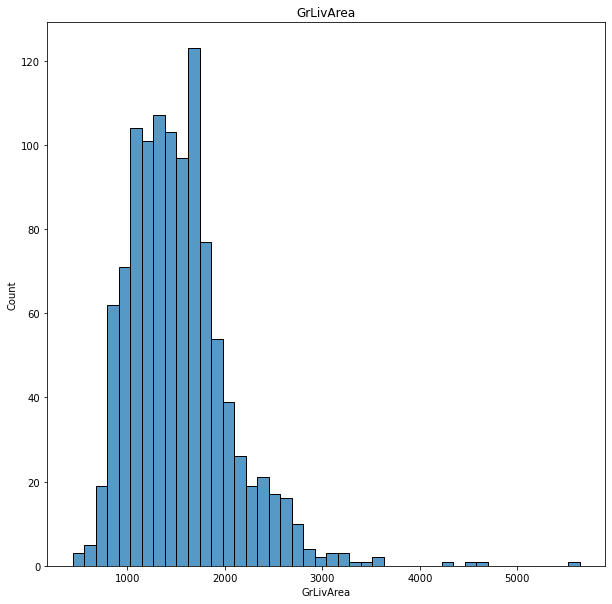

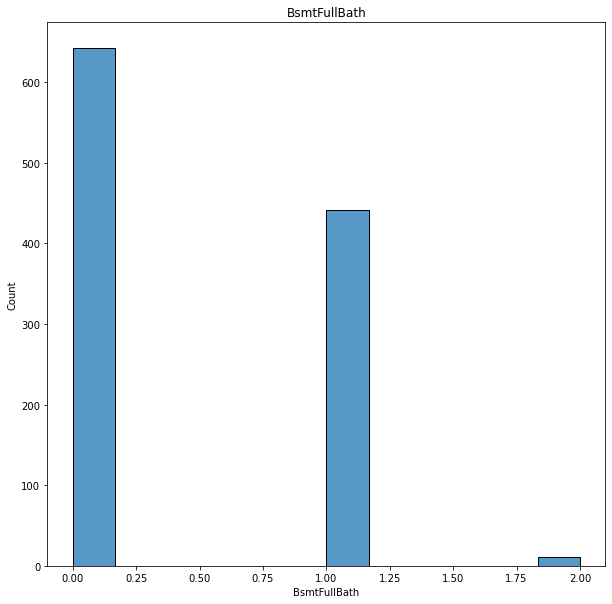

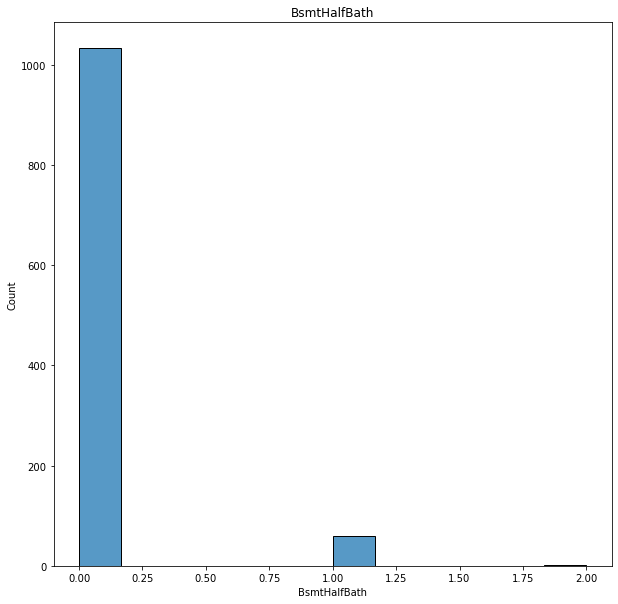

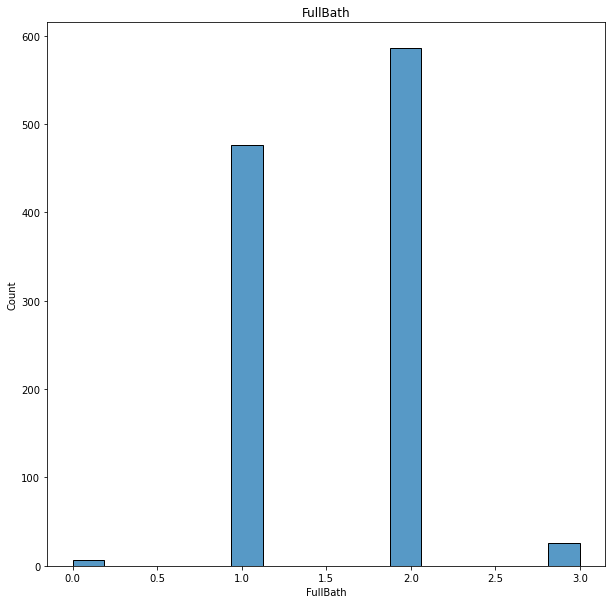

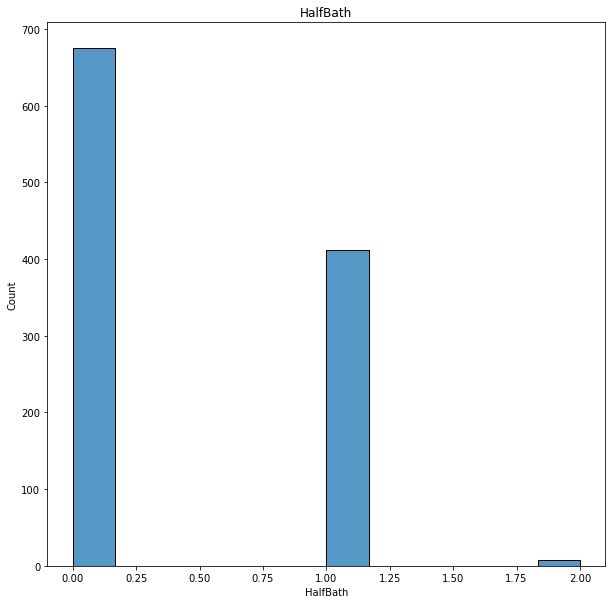

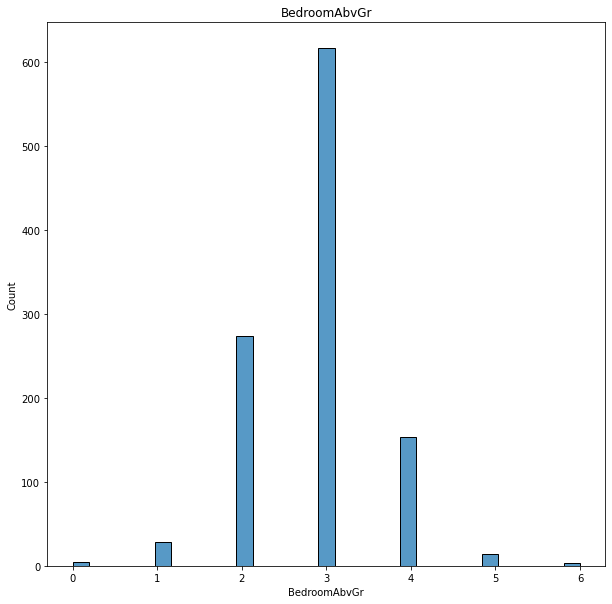

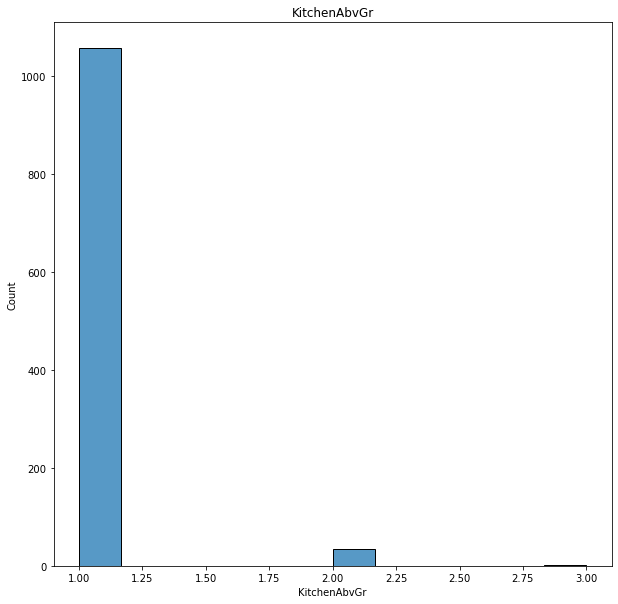

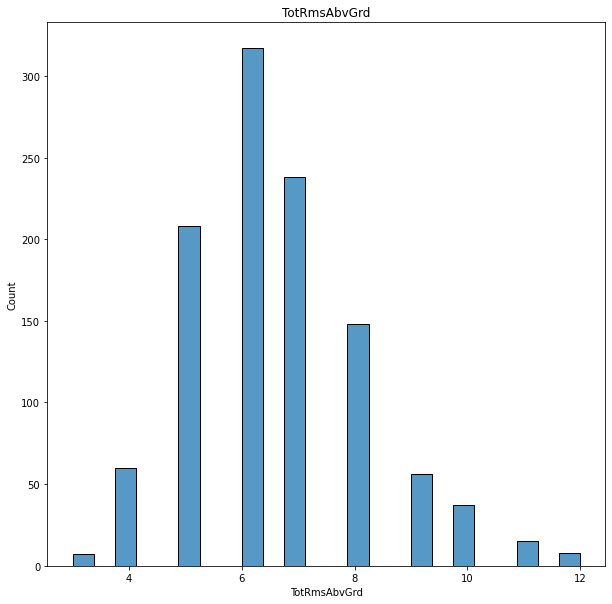

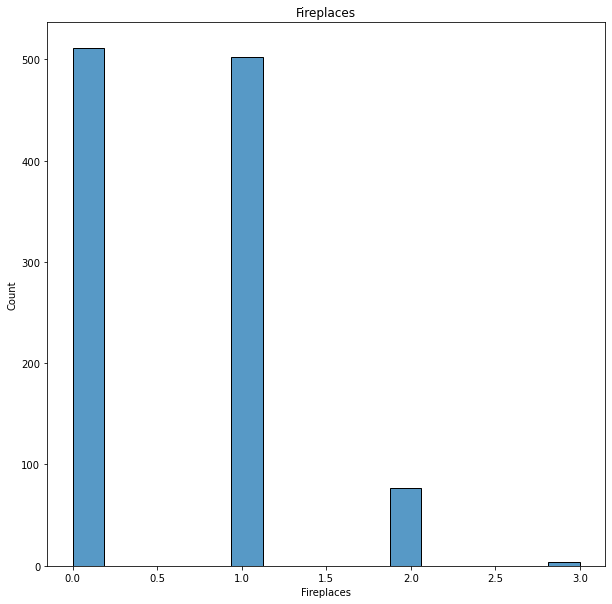

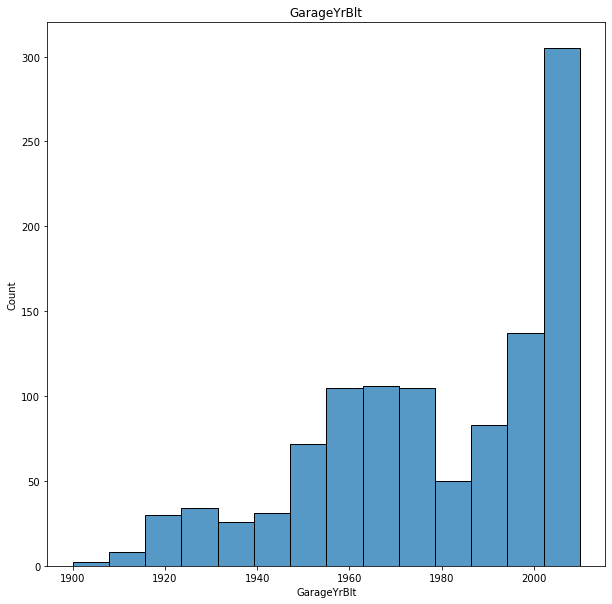

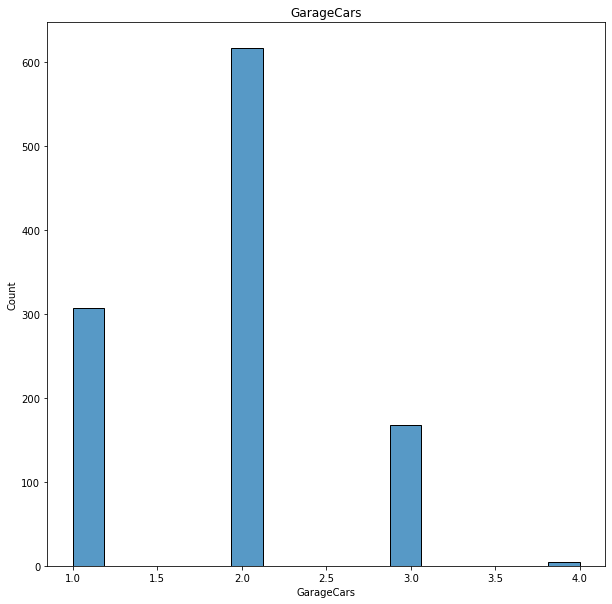

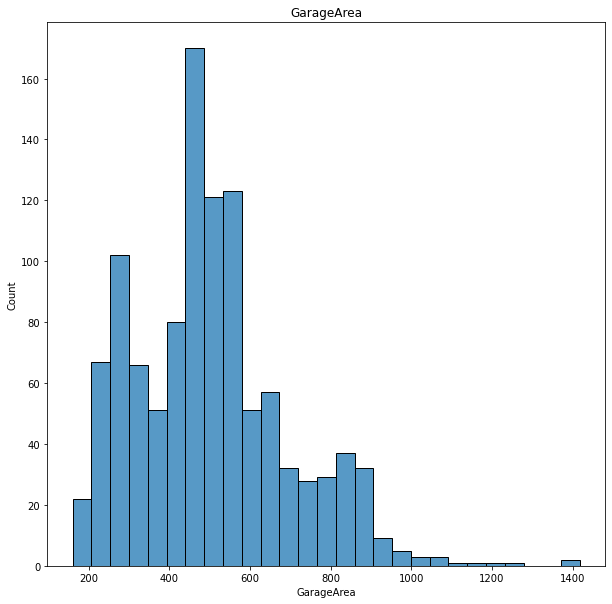

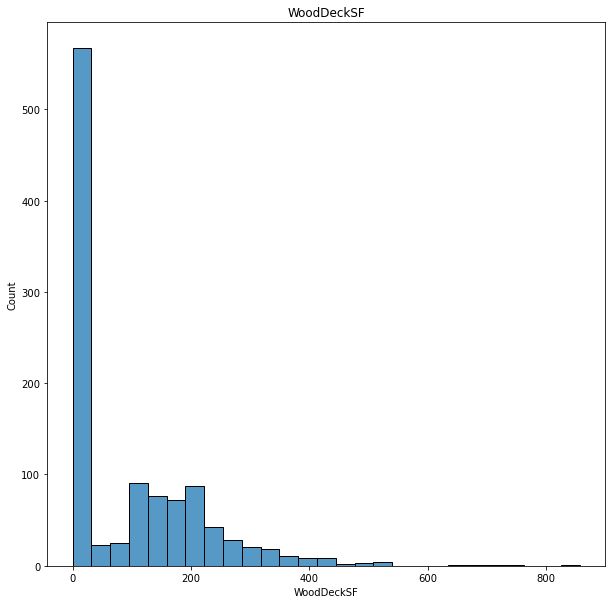

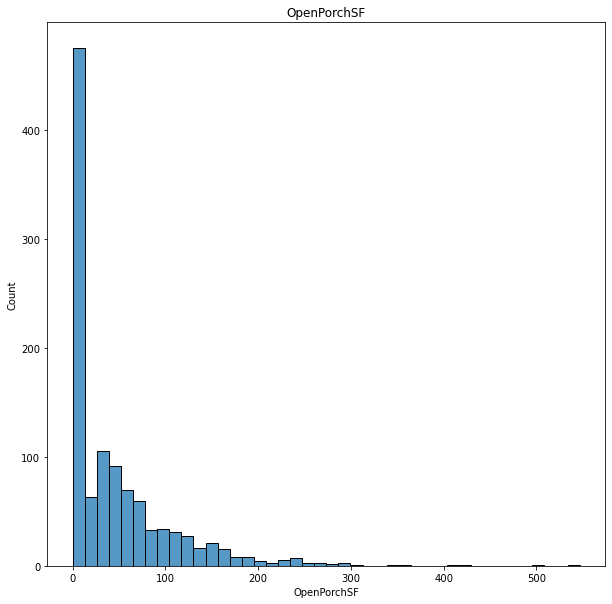

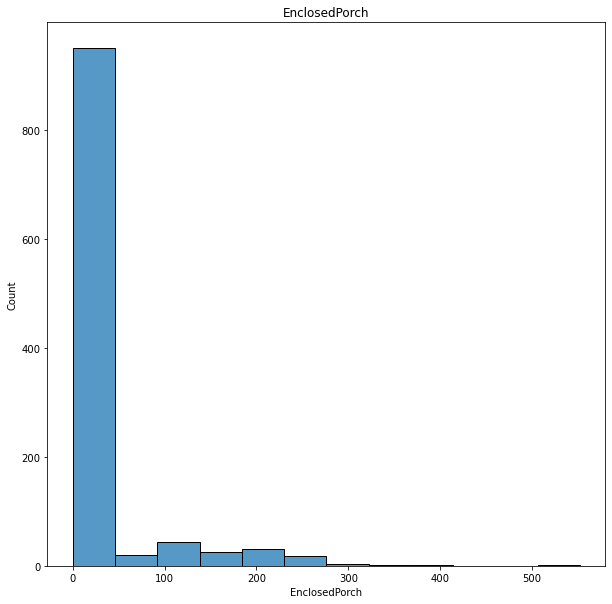

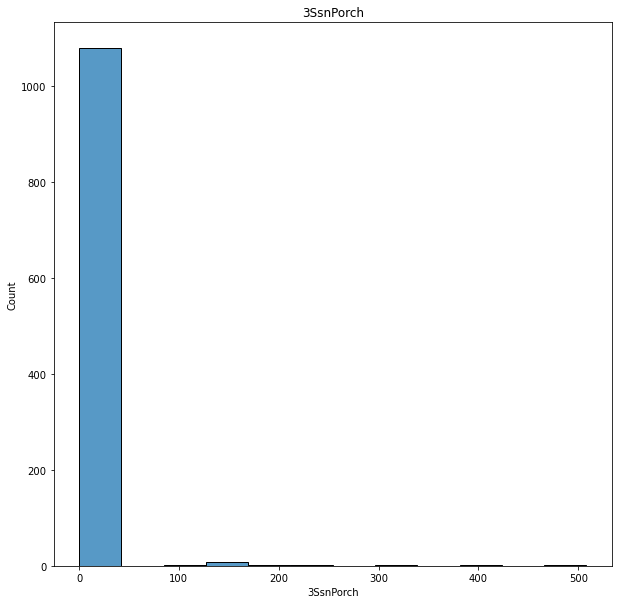

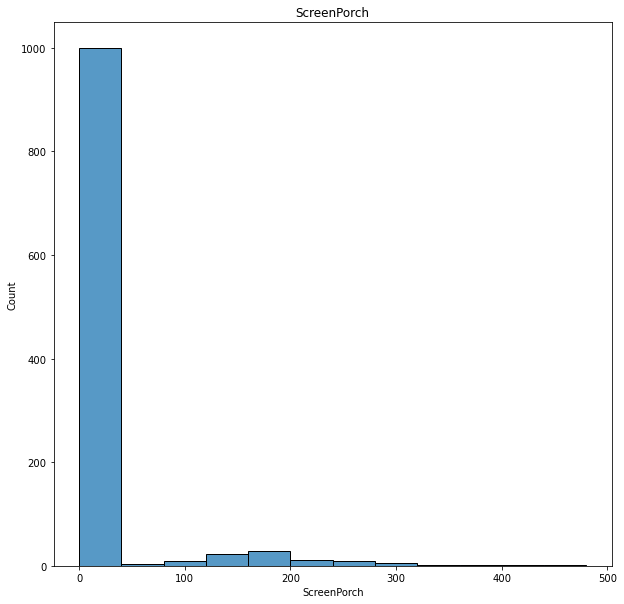

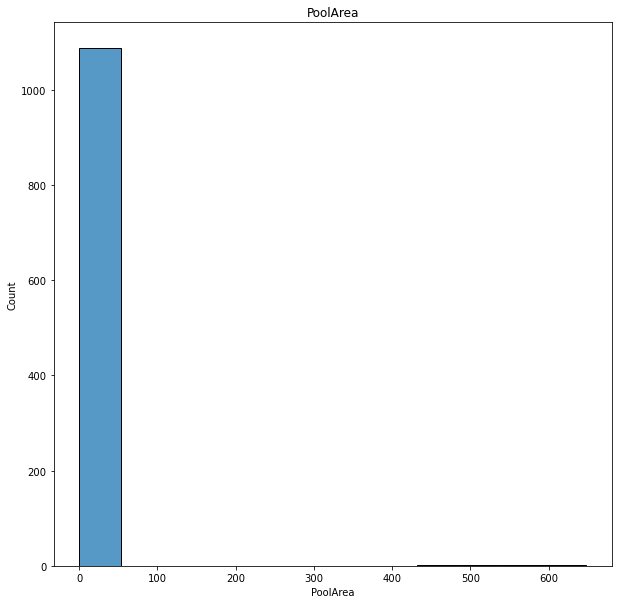

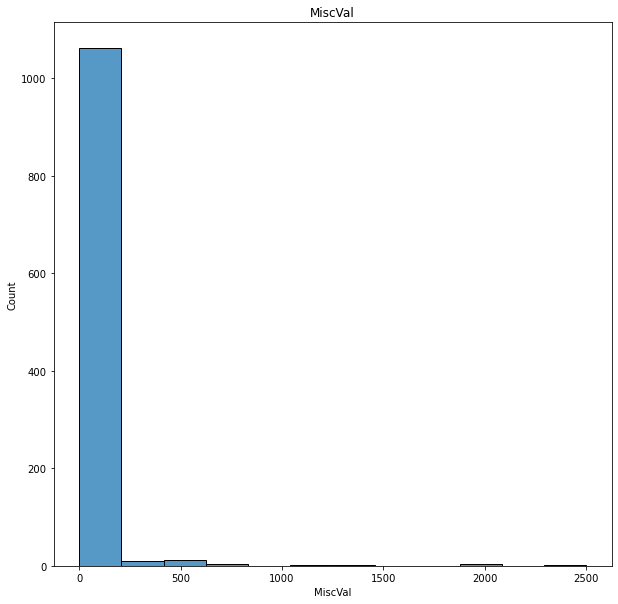

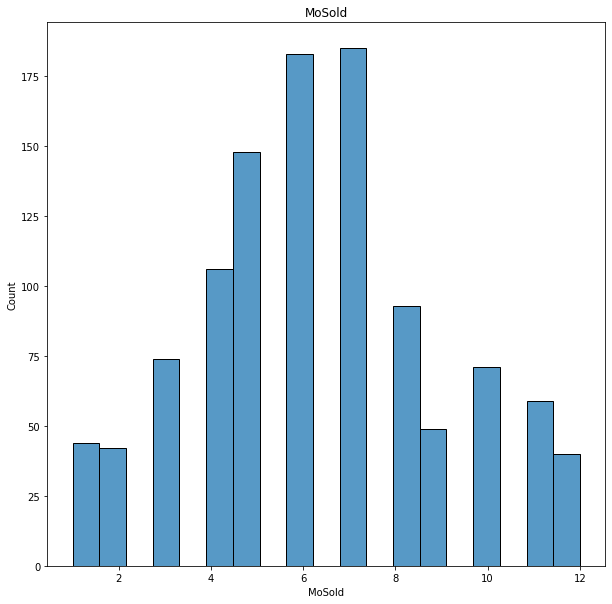

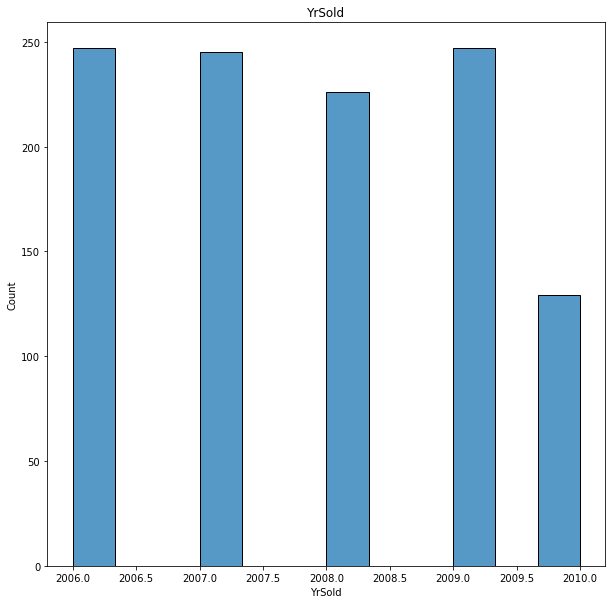

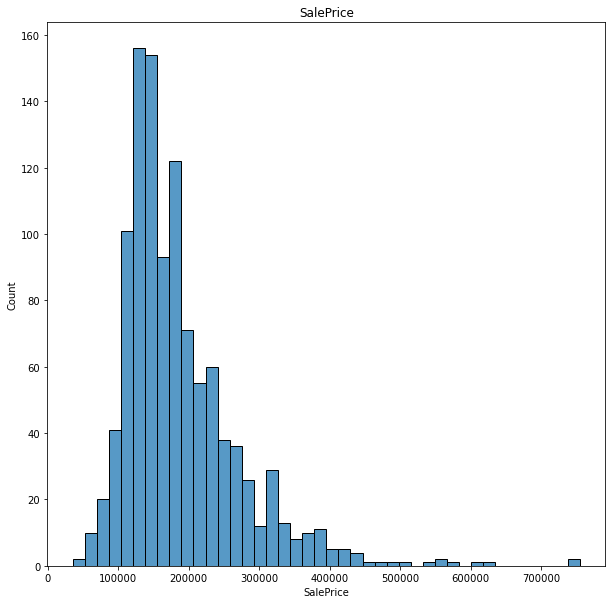

In [16]:
#Numerical values distribution graphs

# get the numerical columns of the DataFrame
num_cols = df_train.select_dtypes(include=['float64','int64']).columns

# create a figure with size (10, 10) for each numerical column
for col in num_cols:
    plt.figure(figsize=(10,10))
    sns.histplot(data=df_train, x=col)
    plt.title(col)
    plt.show()

We should drop Id and after that we should detect outliers and apply capping for outlier values for some numerical values. We can process them in Outlier detection & capping section below.

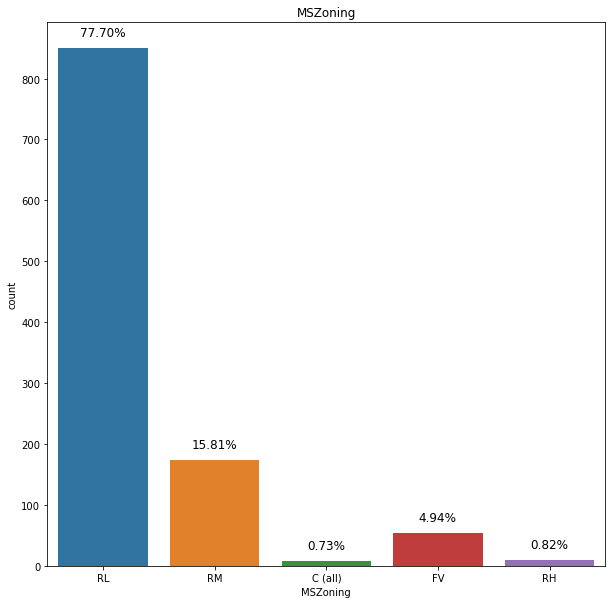

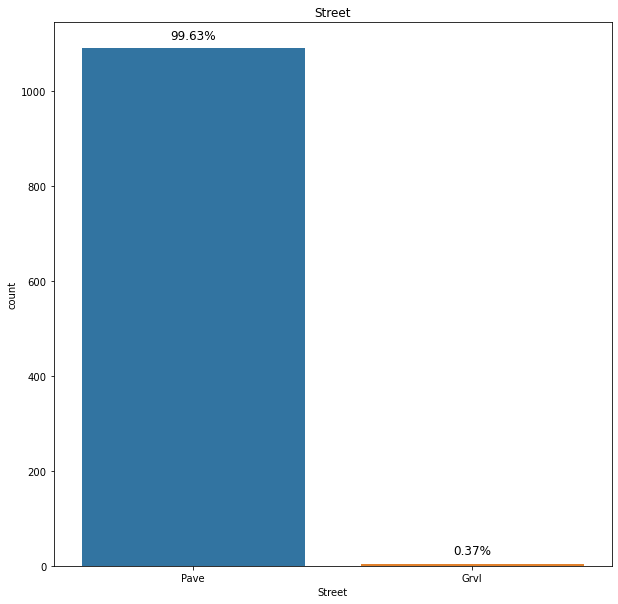

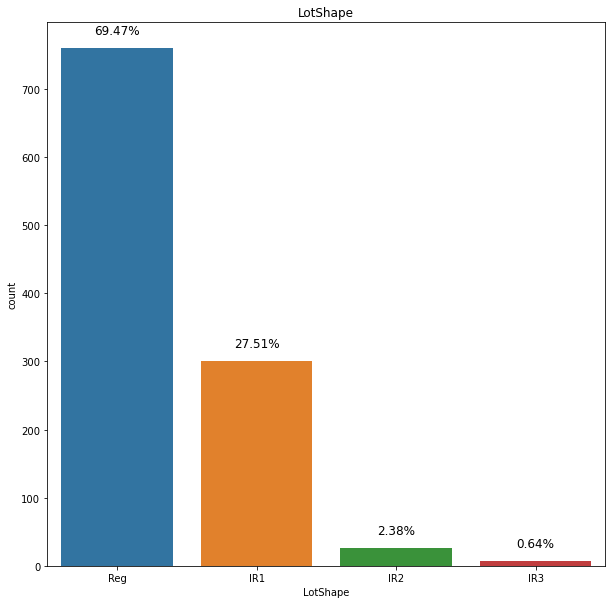

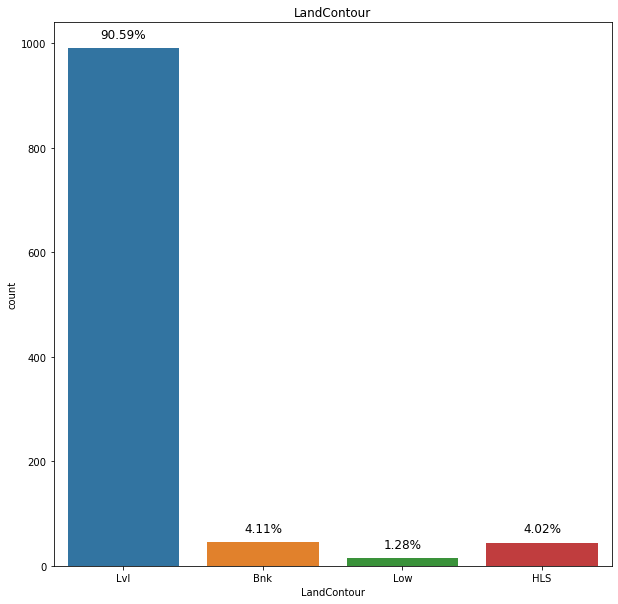

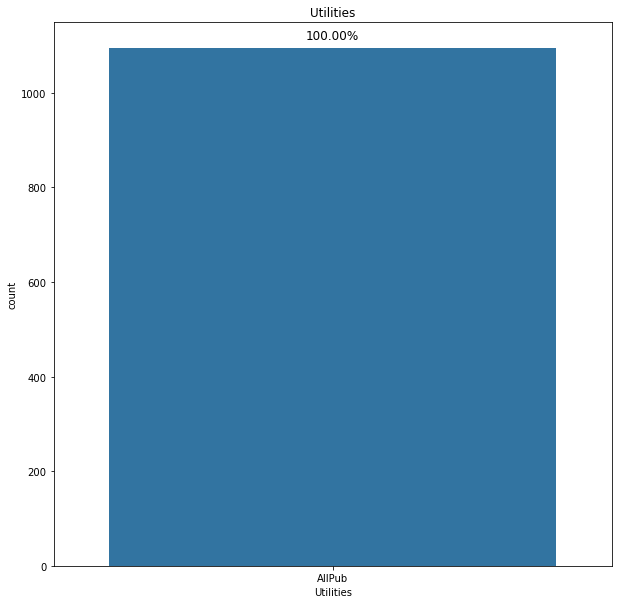

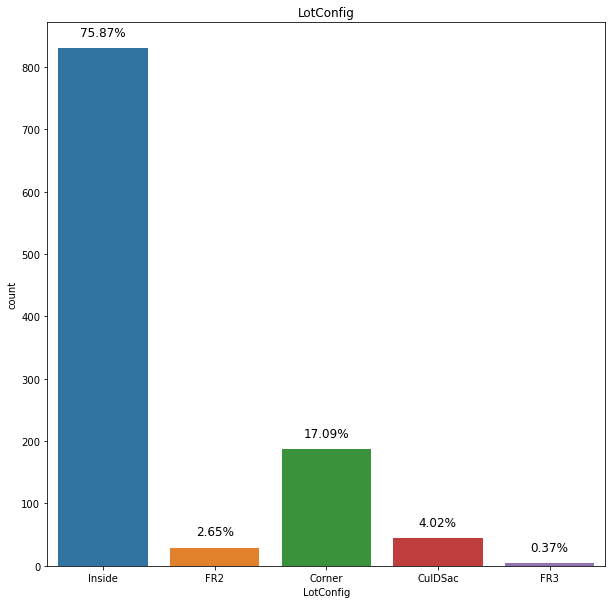

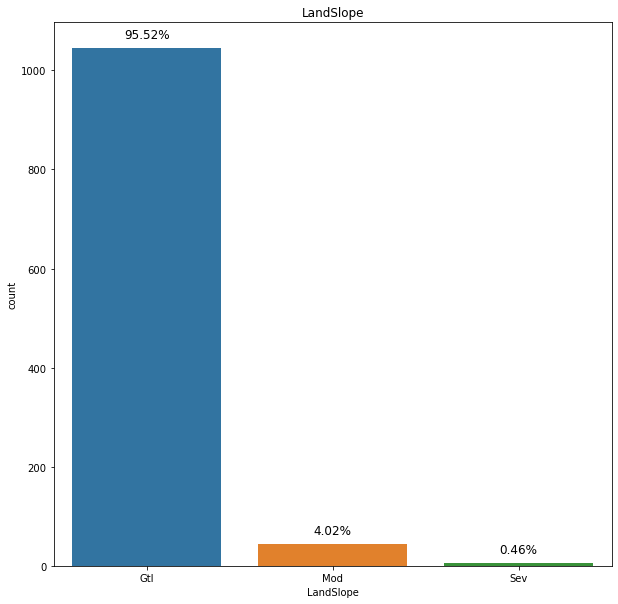

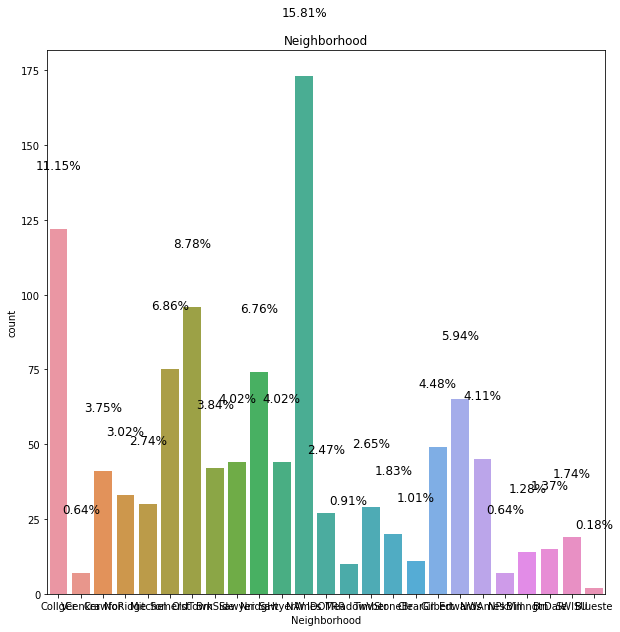

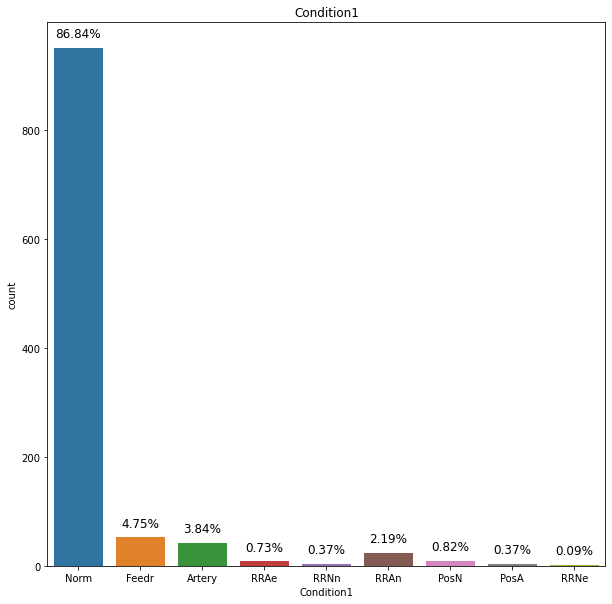

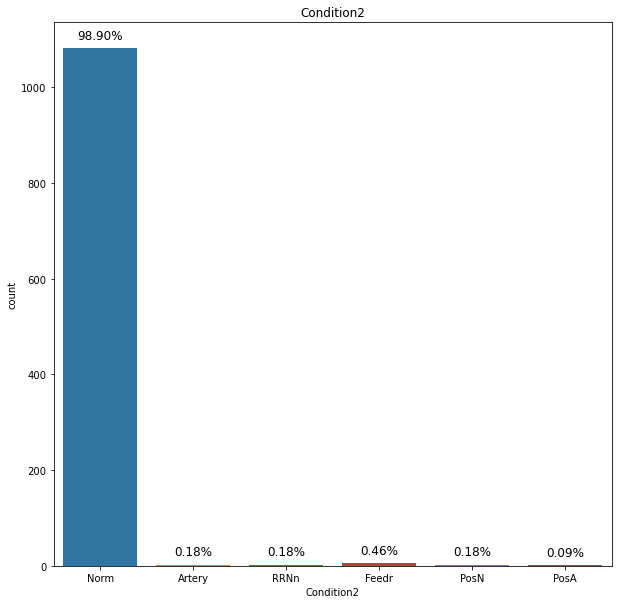

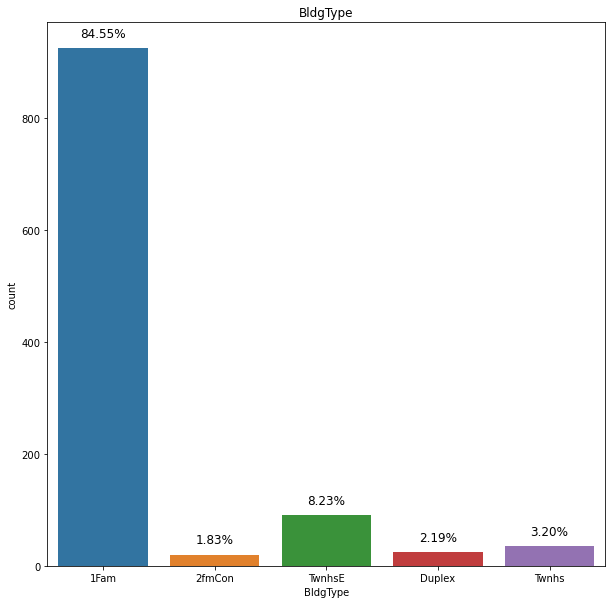

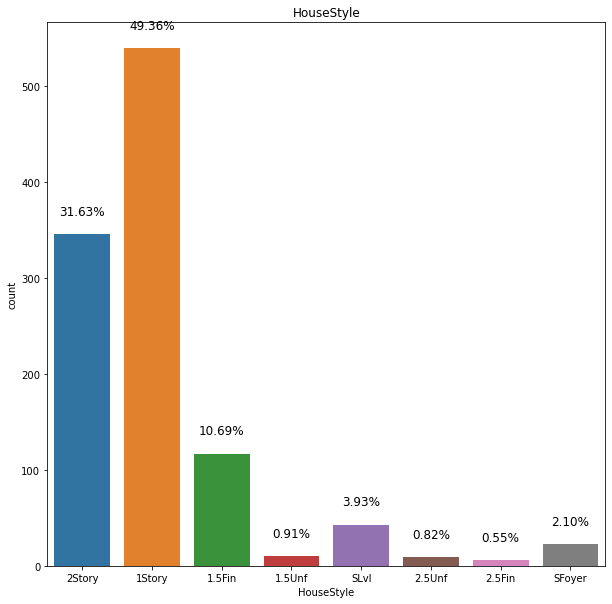

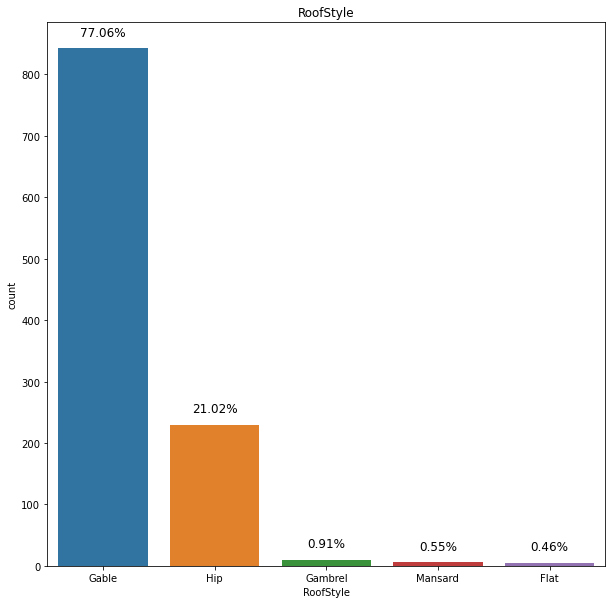

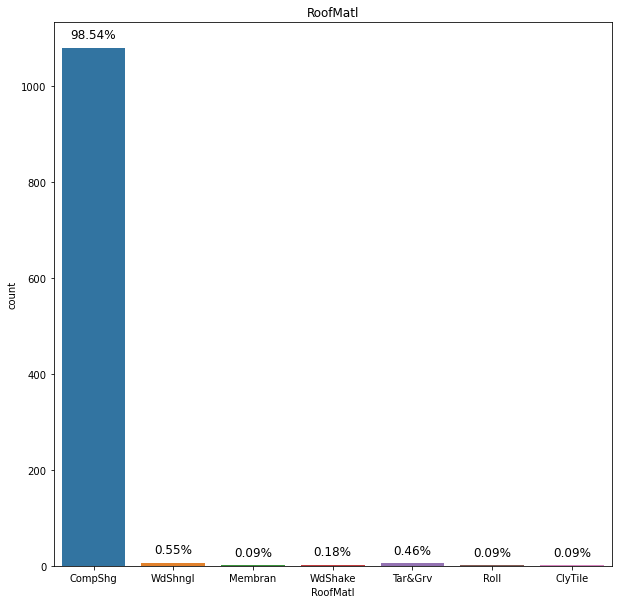

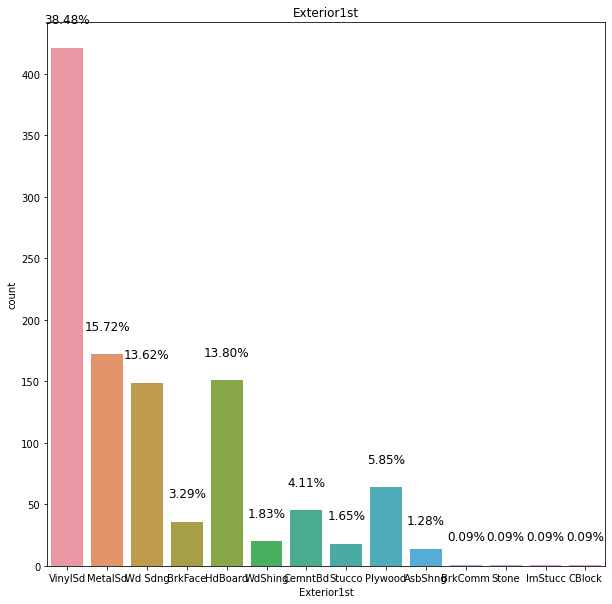

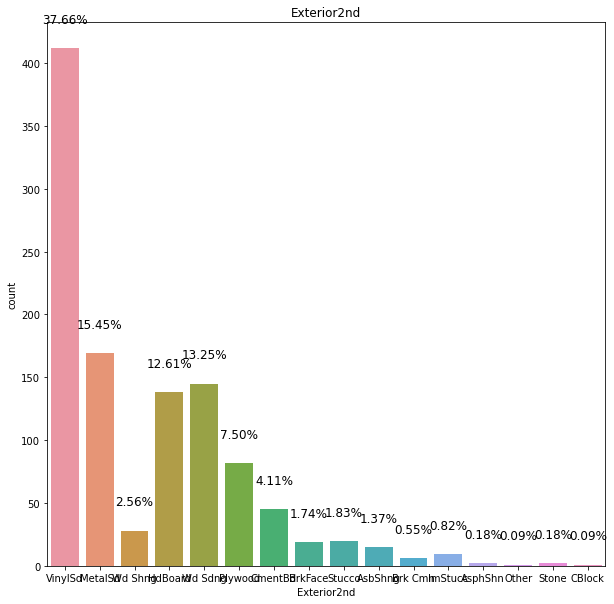

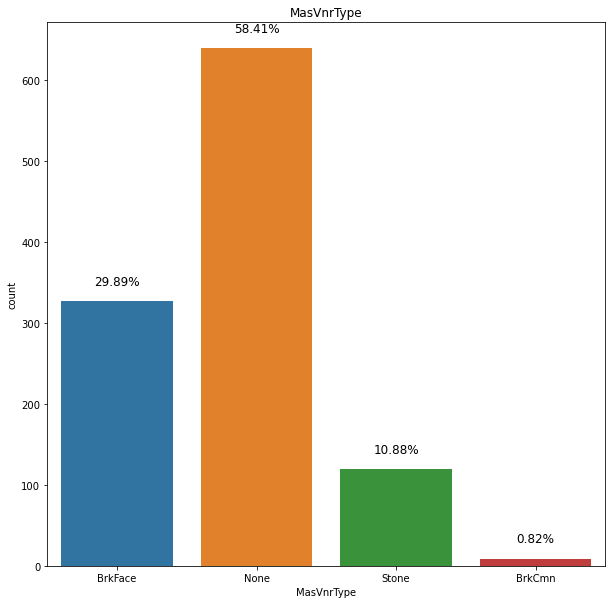

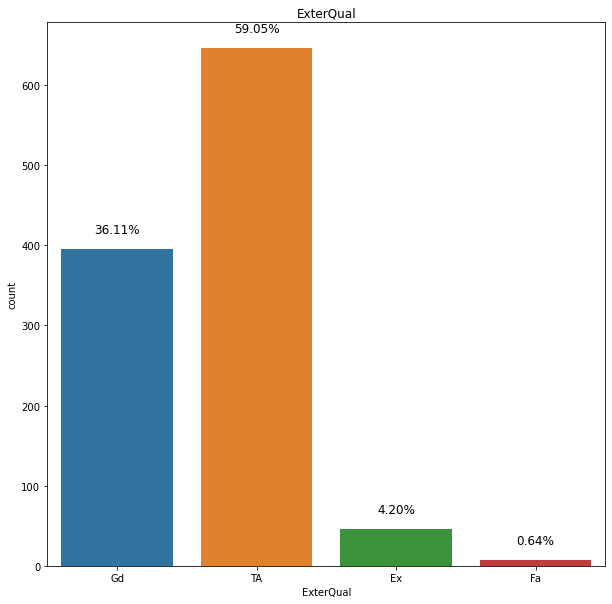

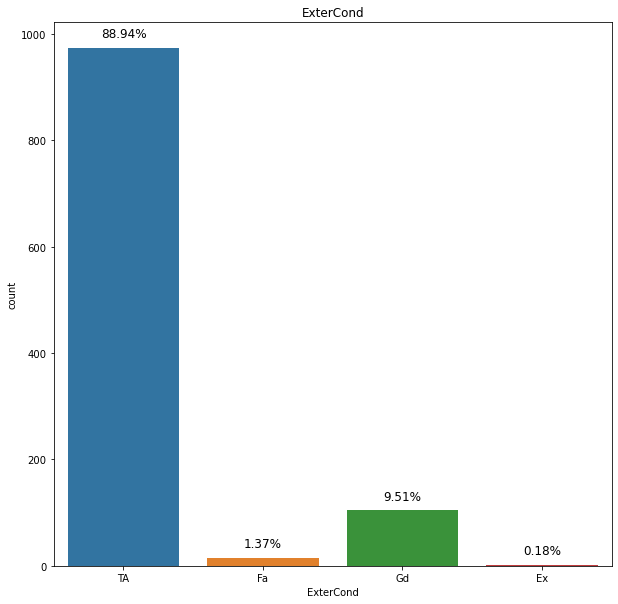

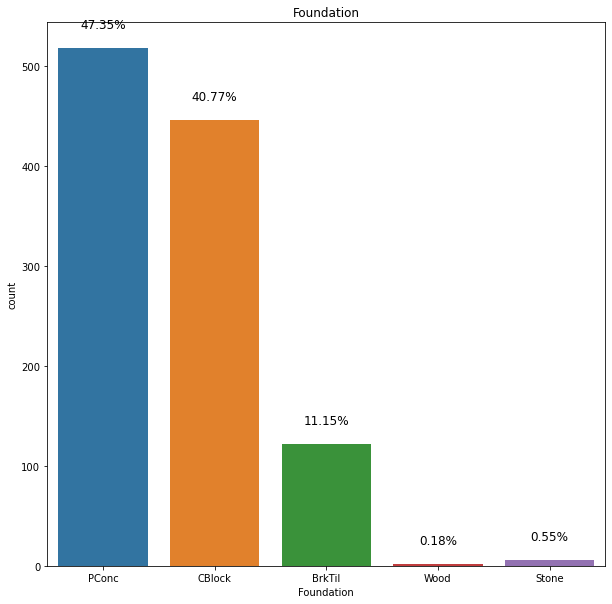

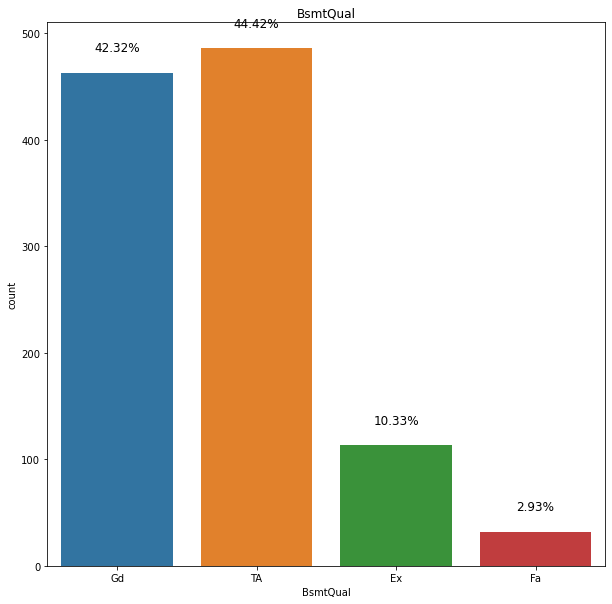

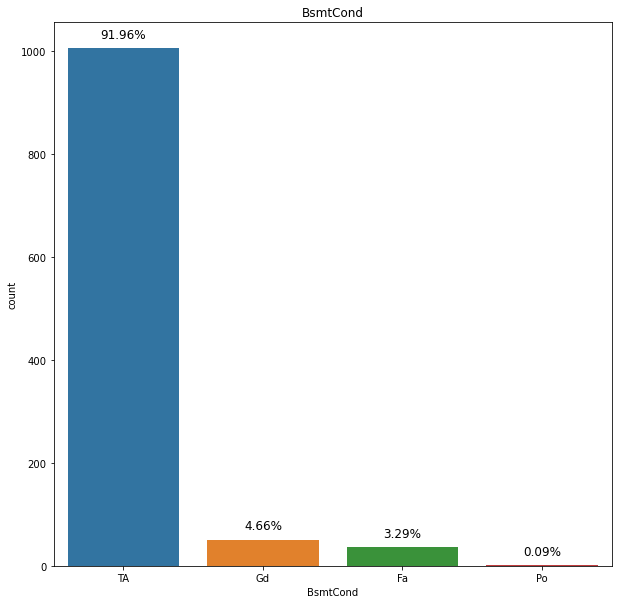

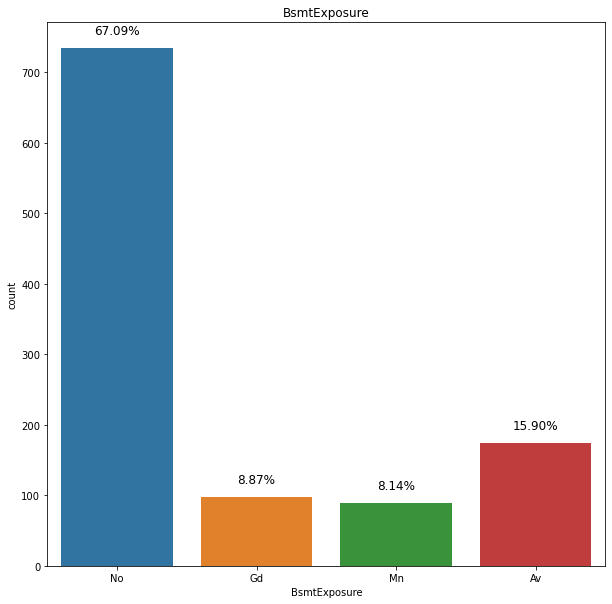

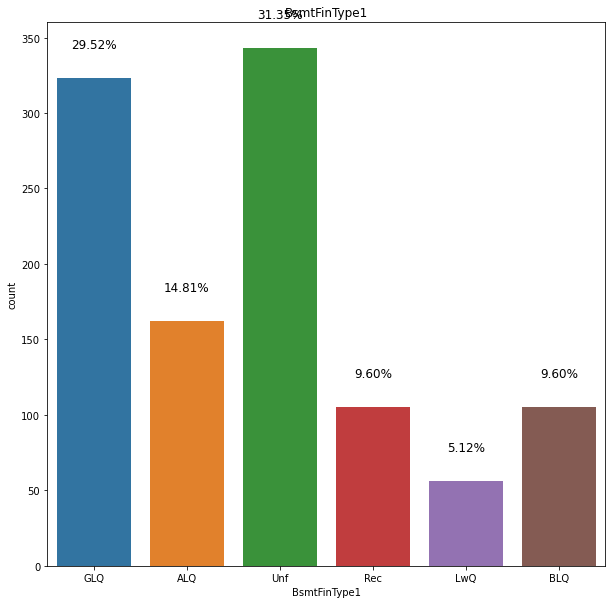

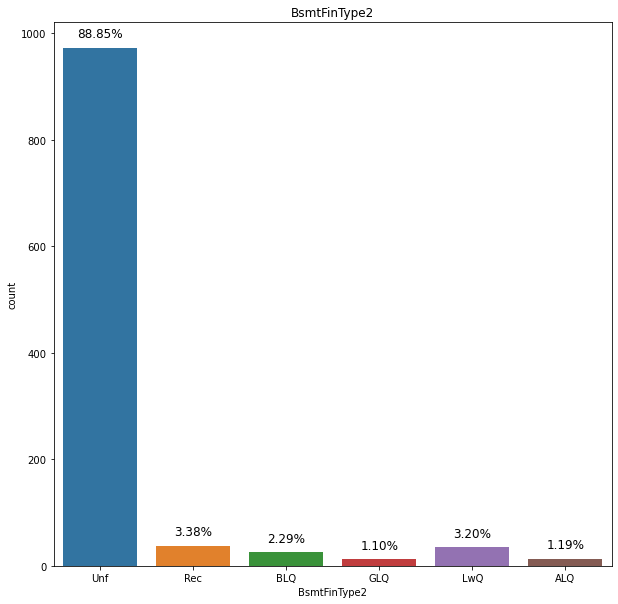

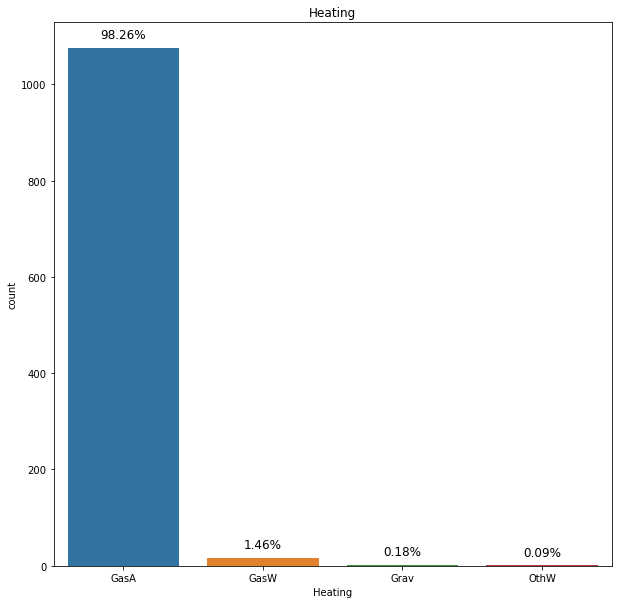

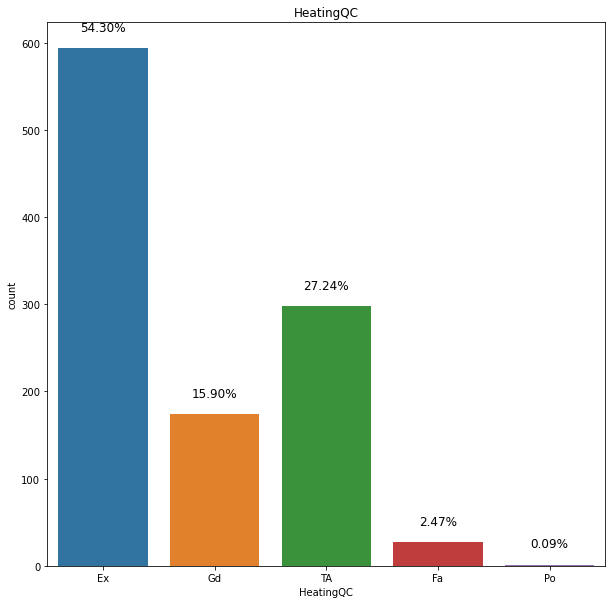

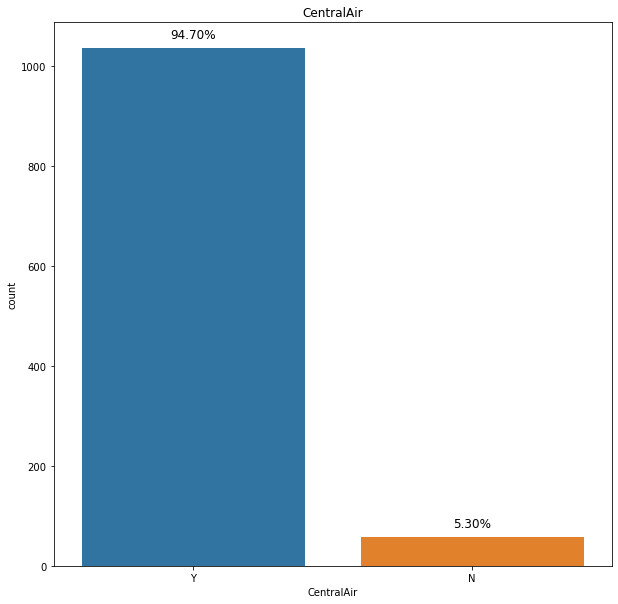

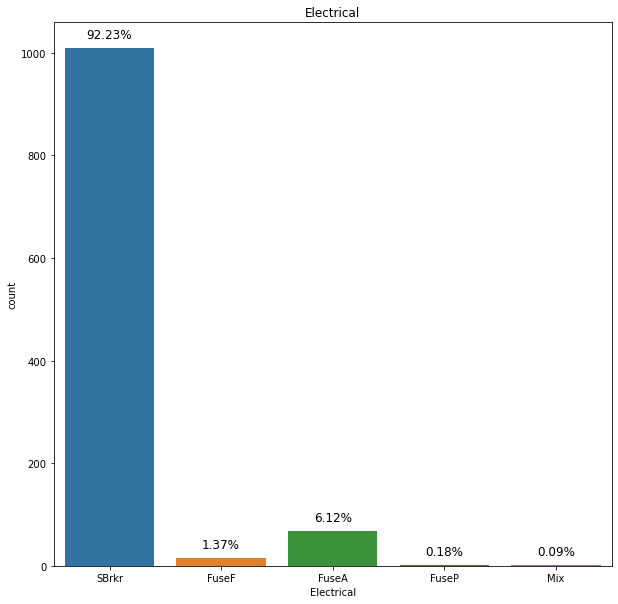

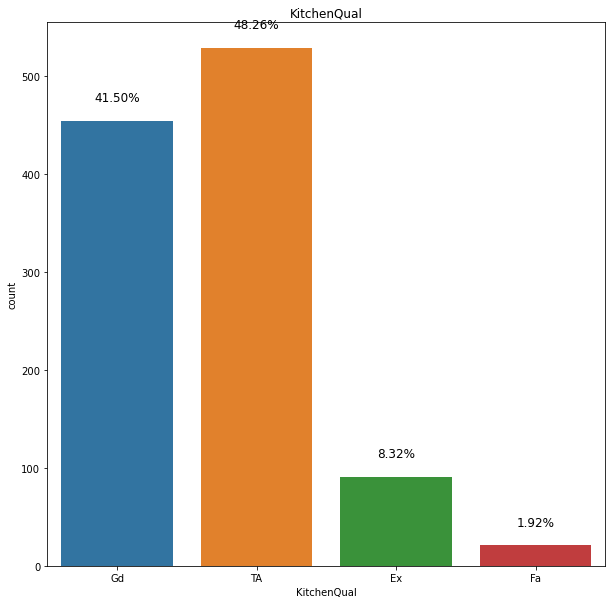

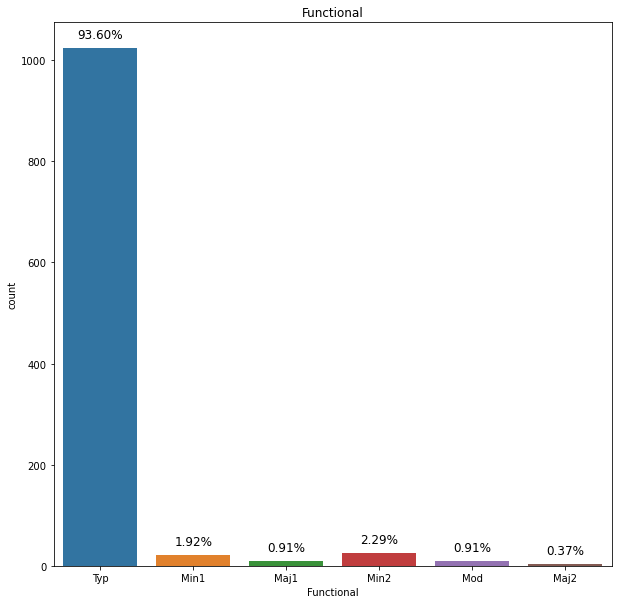

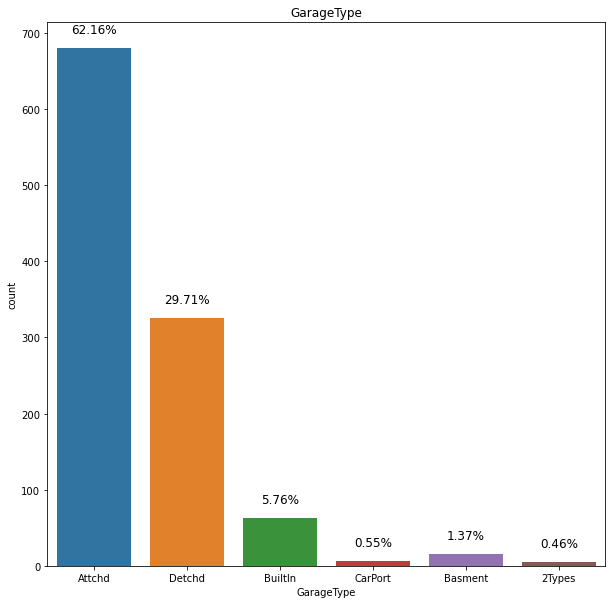

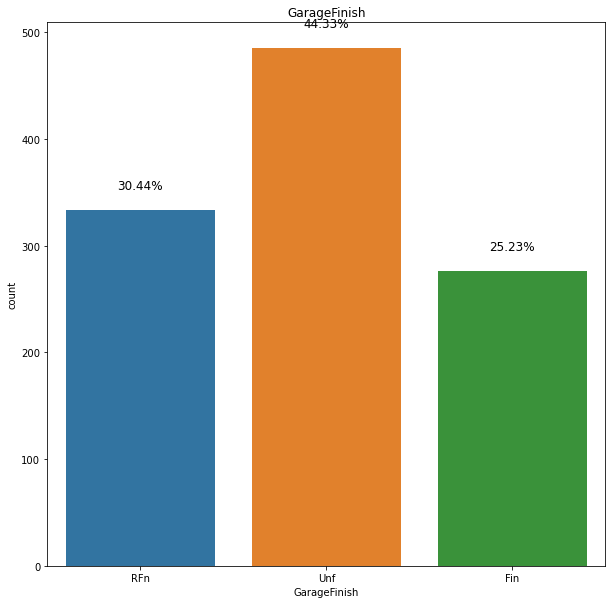

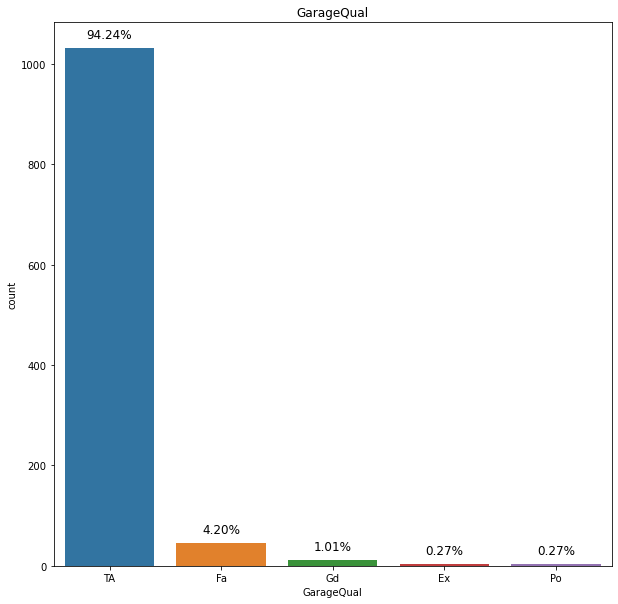

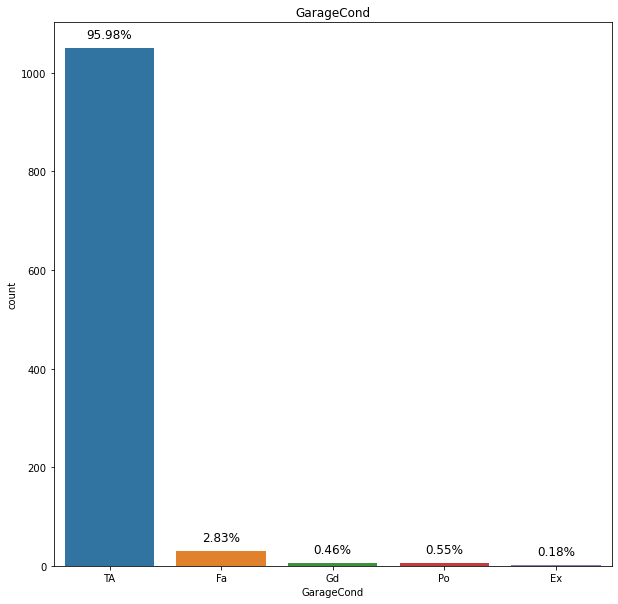

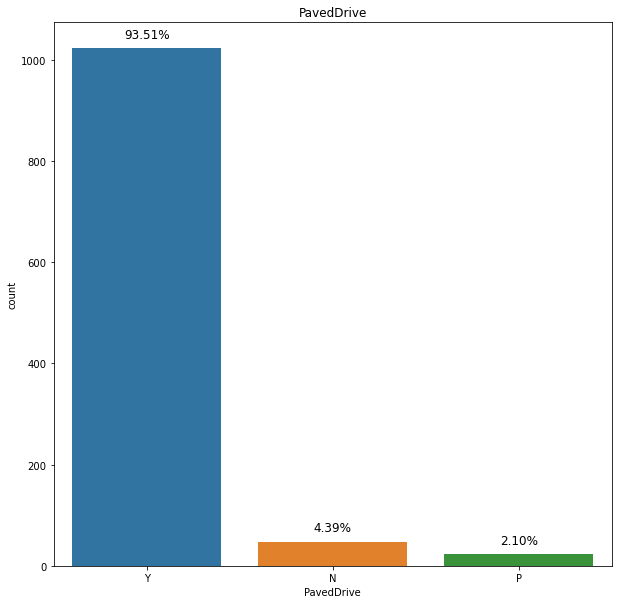

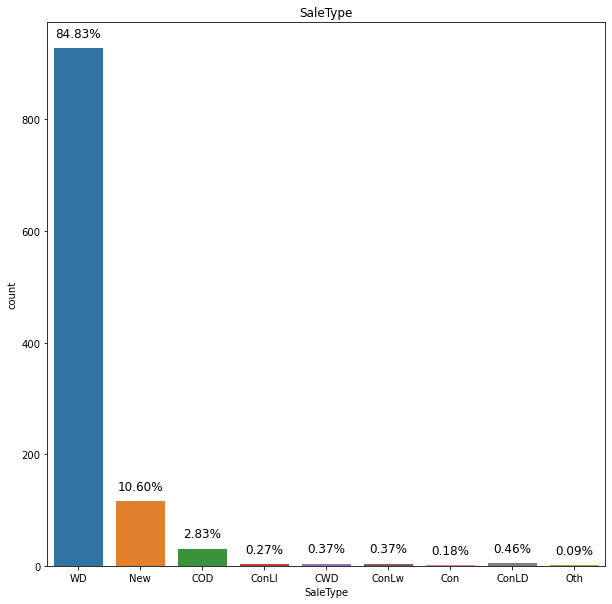

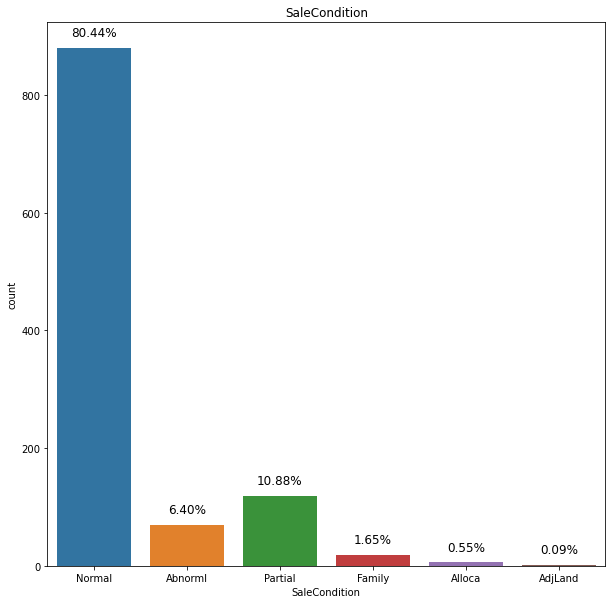

In [17]:
#Categorical values graphs
# get the categorical columns of the DataFrame
cat_cols = df_train.select_dtypes(include=['object','category']).columns

# create a countplot for each categorical column
for col in cat_cols:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(data=df_train, x=col)
    plt.title(col)
    
    # add percentage labels on each bar
    for p in ax.containers[0].patches:
        percent = (p.get_height()/len(df_train))*100
        ax.text(p.get_x()+p.get_width()/2,
                p.get_height()+20,
                '{:1.2f}%'.format(percent),
                ha='center', fontsize=12)
    plt.show()


### OUTLIER DETECTION AND CAPPING

In [18]:
# Z-score capping function
def z_score_capping(df,columns_list,threshold):
    for col in columns_list:
        mean = df[col].mean()
        std = df[col].std()
        lower_limit = mean - threshold * std
        upper_limit = mean + threshold * std
        df.loc[df[col] < lower_limit, col] = lower_limit
        df.loc[df[col] > upper_limit, col] = upper_limit
    return df

# Example usage
columns_to_cap = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea','GarageArea','LowQualFinSF']
df_train = z_score_capping(df_train,columns_to_cap,3)



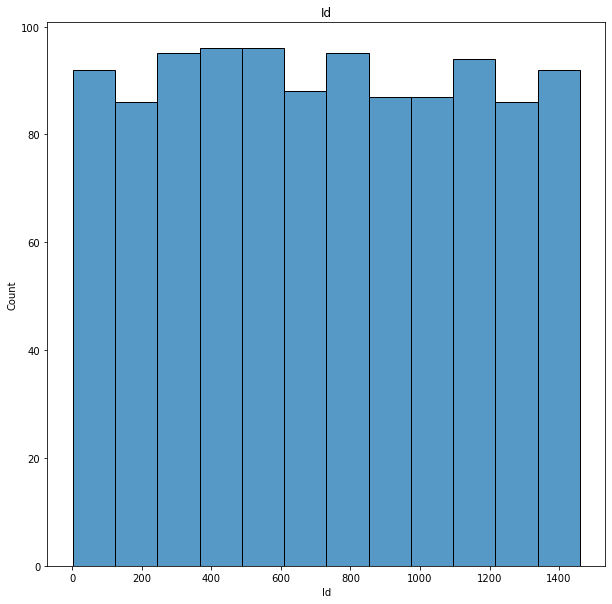

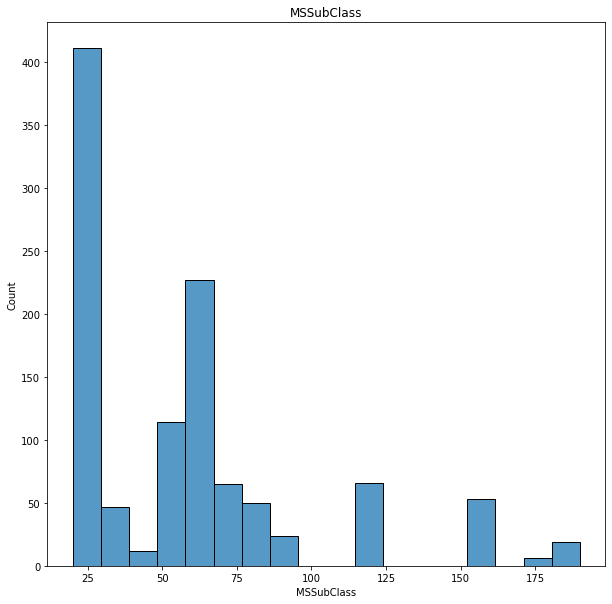

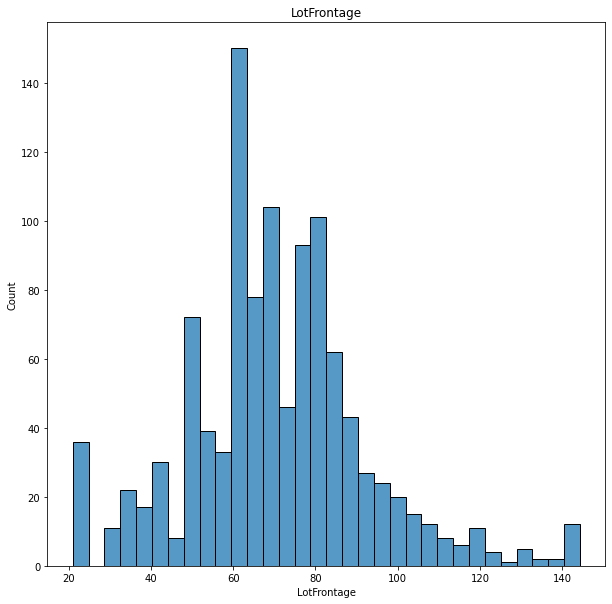

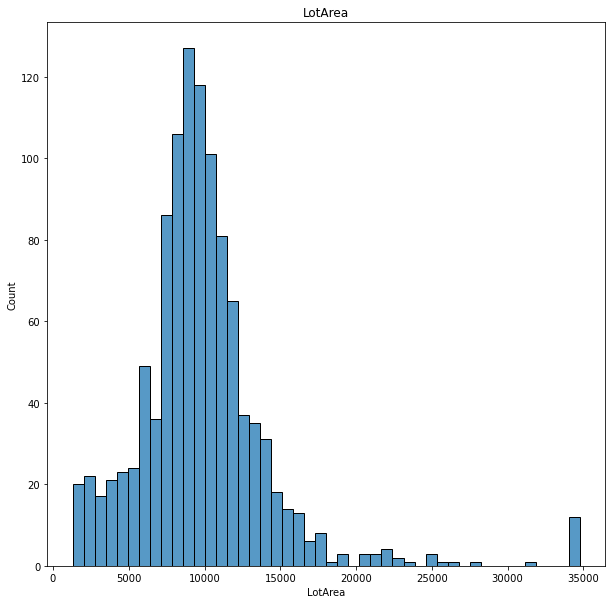

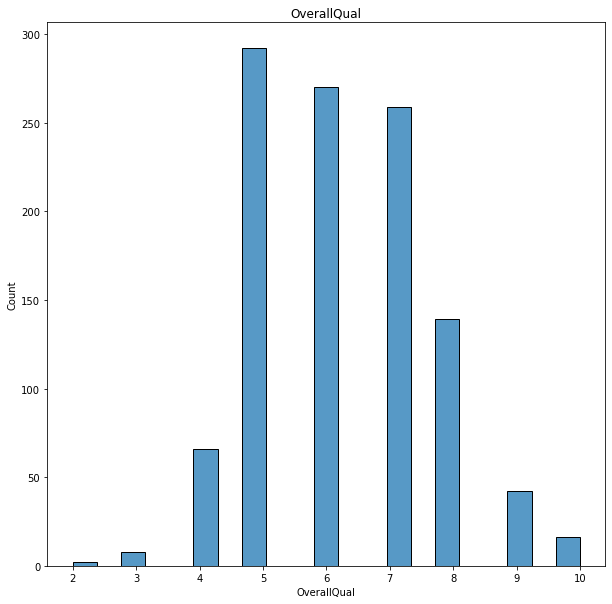

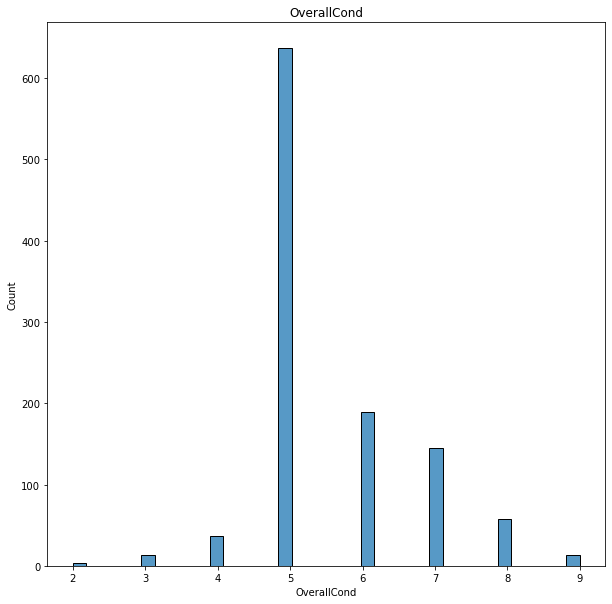

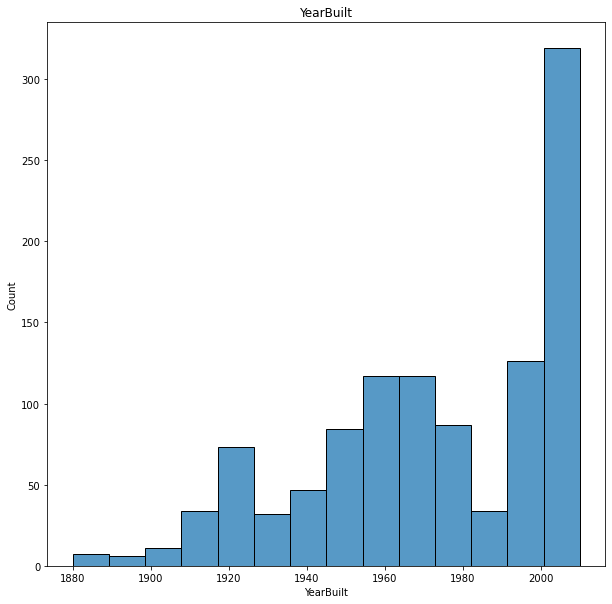

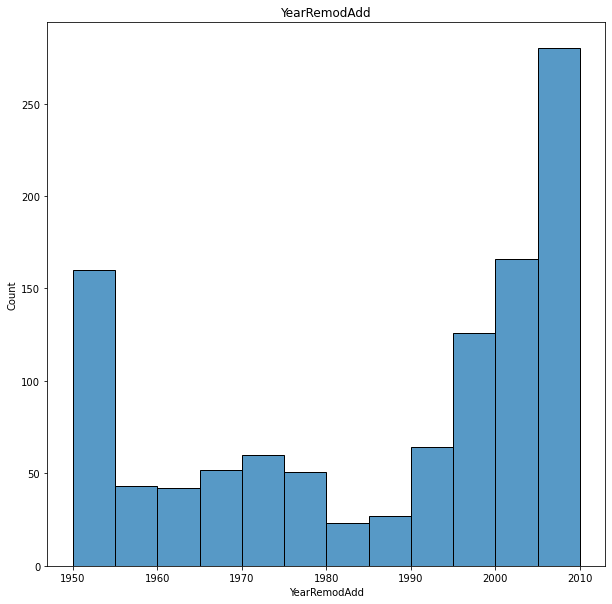

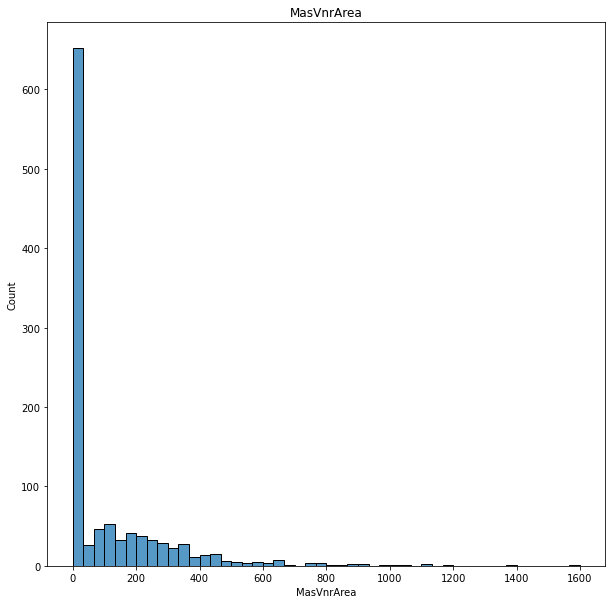

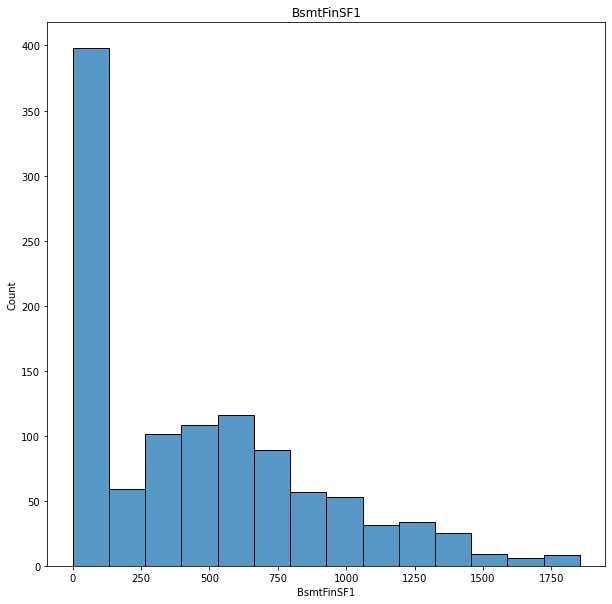

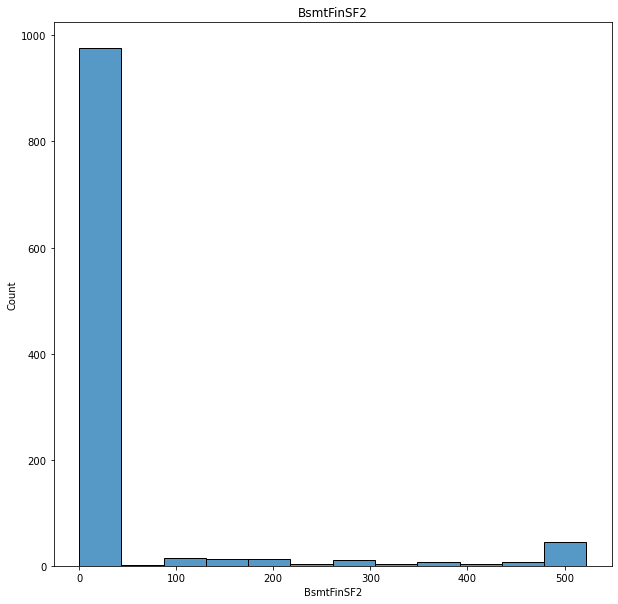

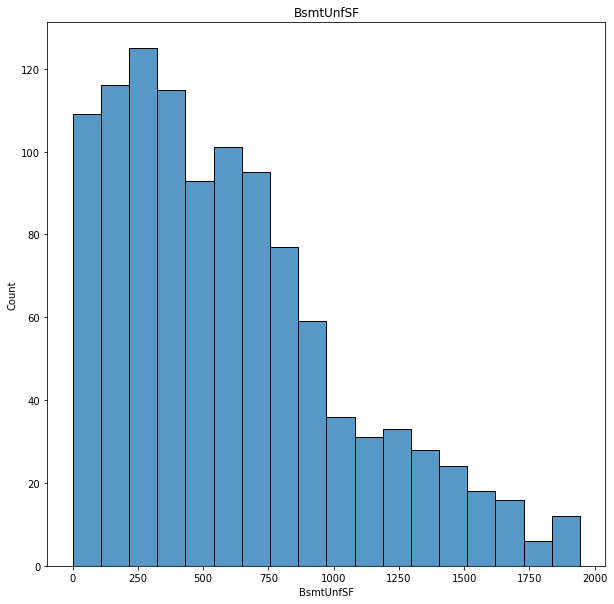

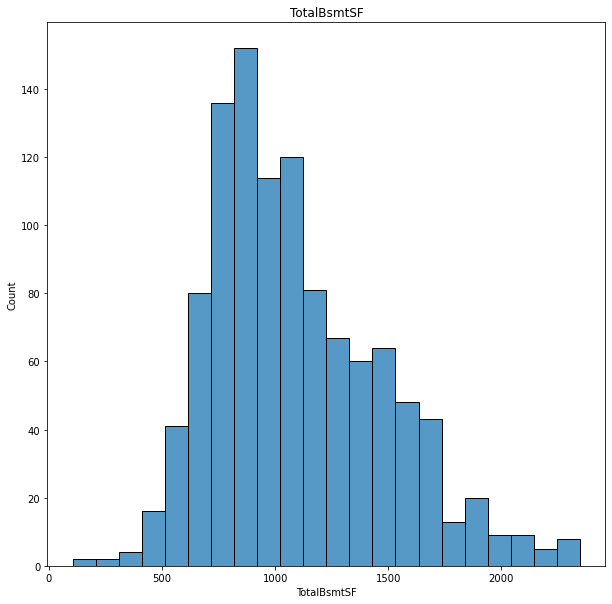

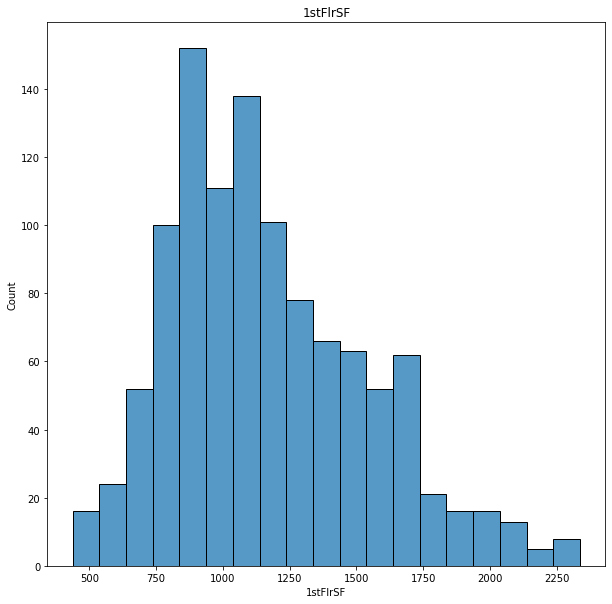

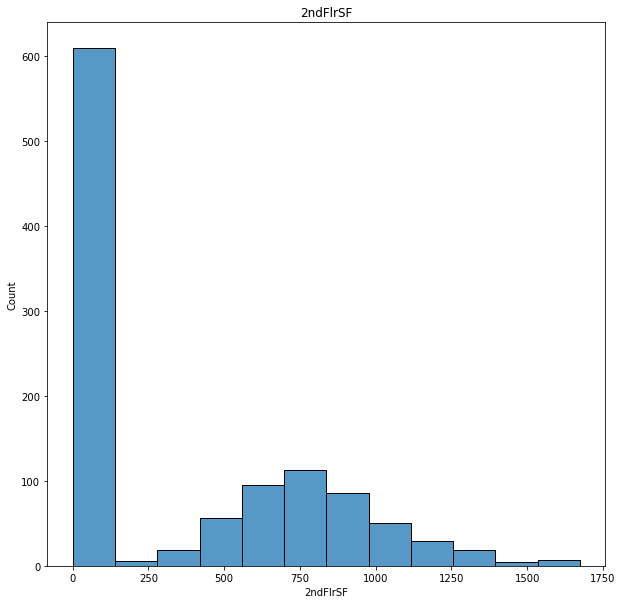

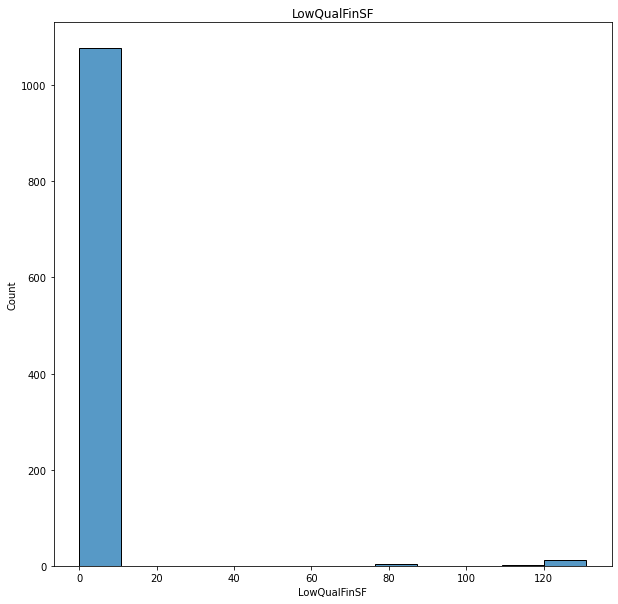

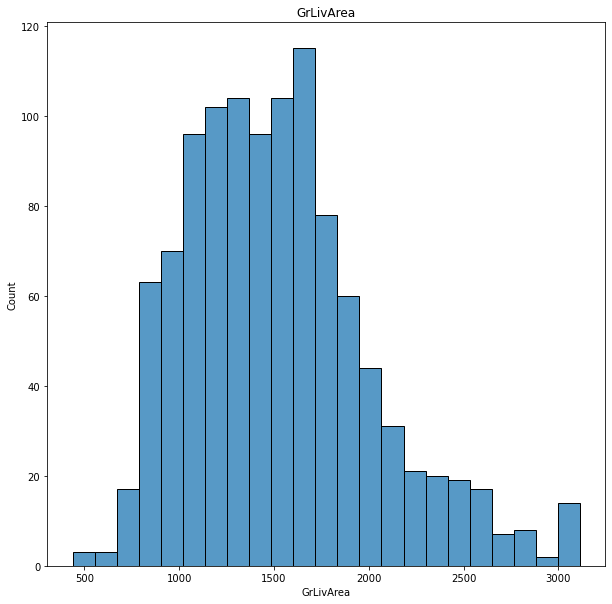

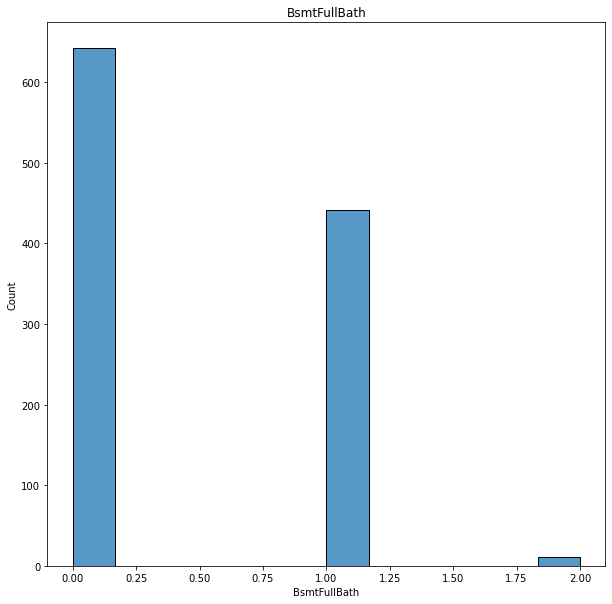

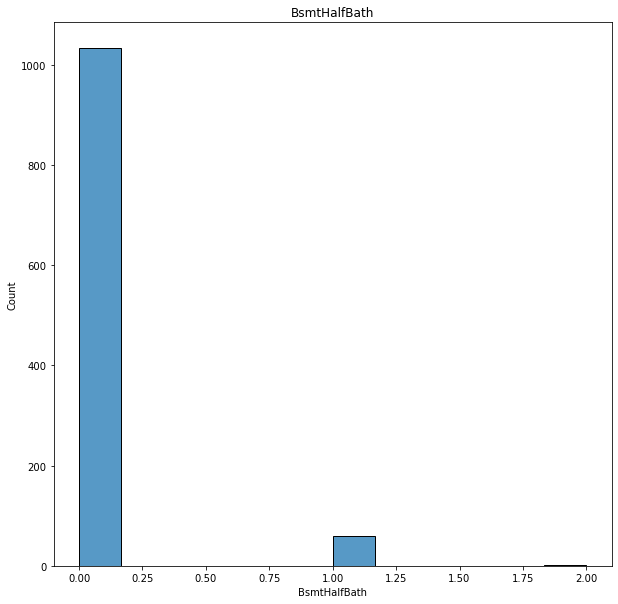

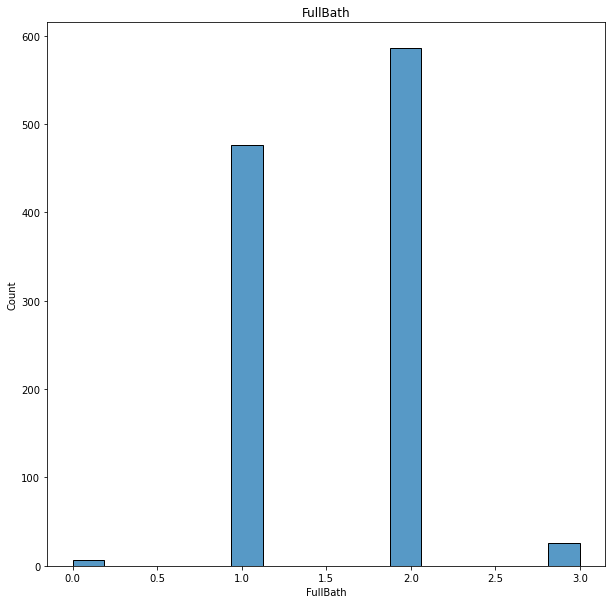

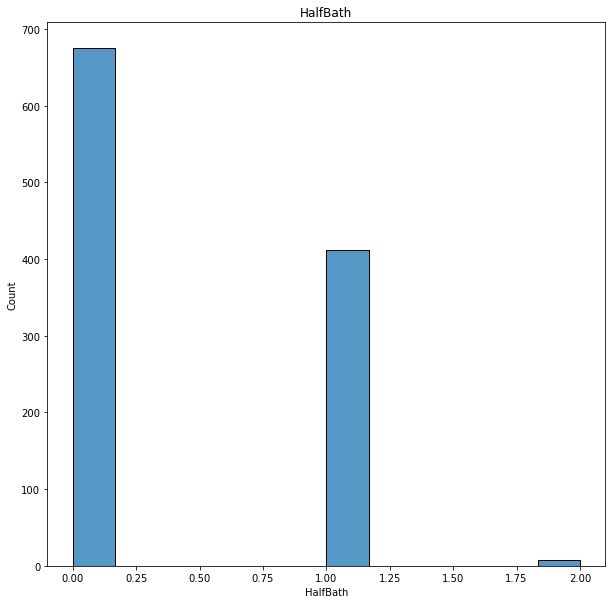

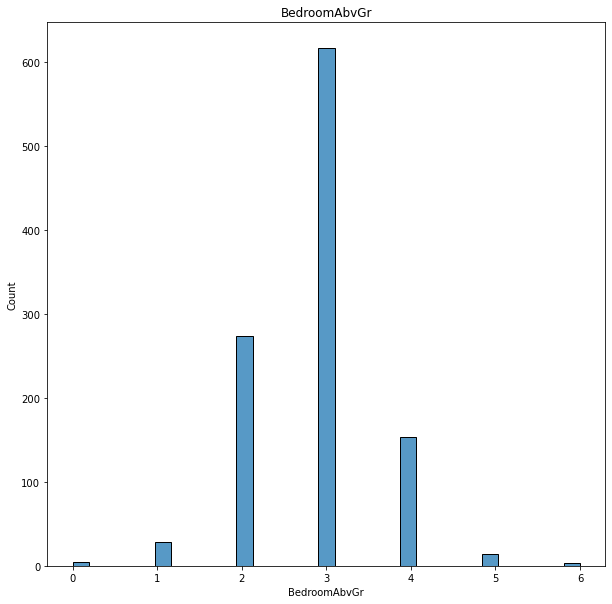

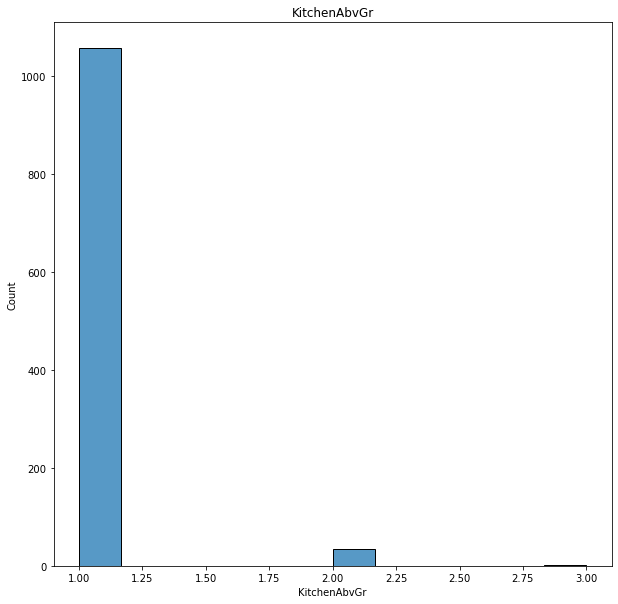

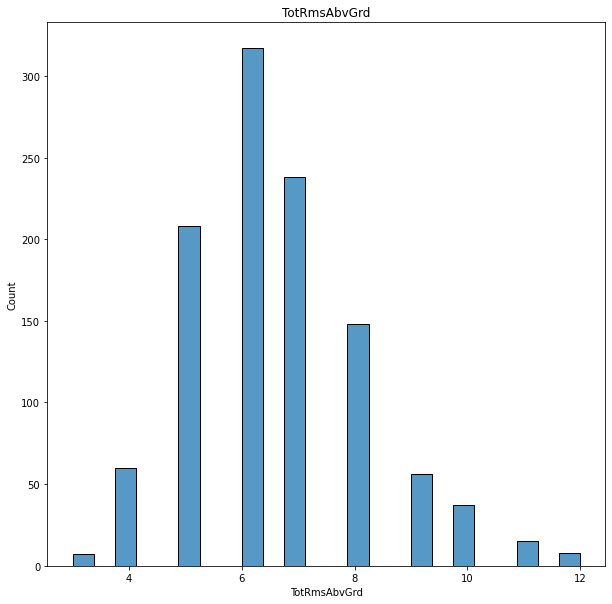

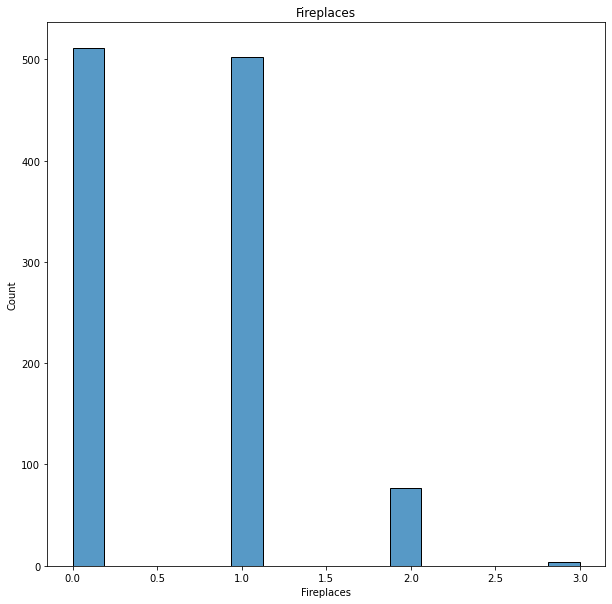

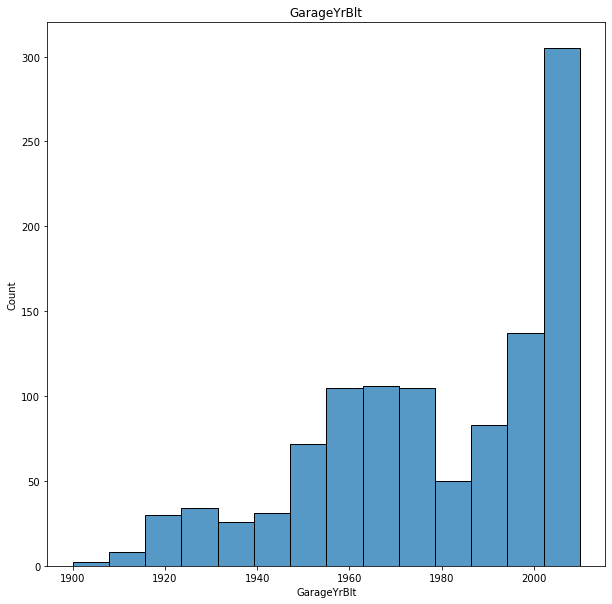

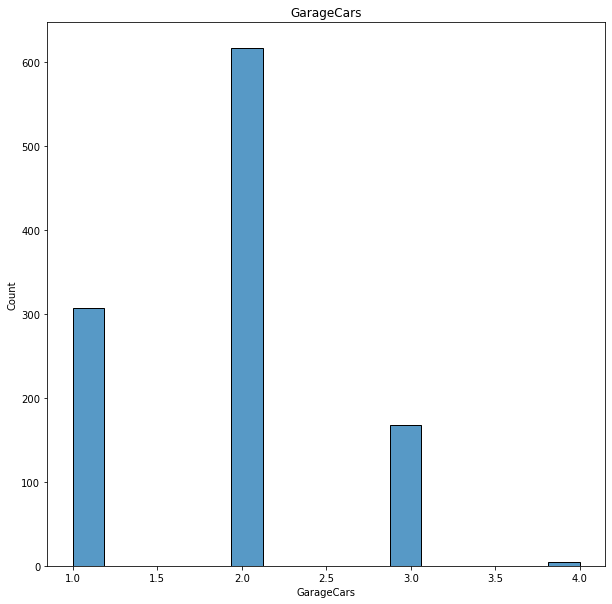

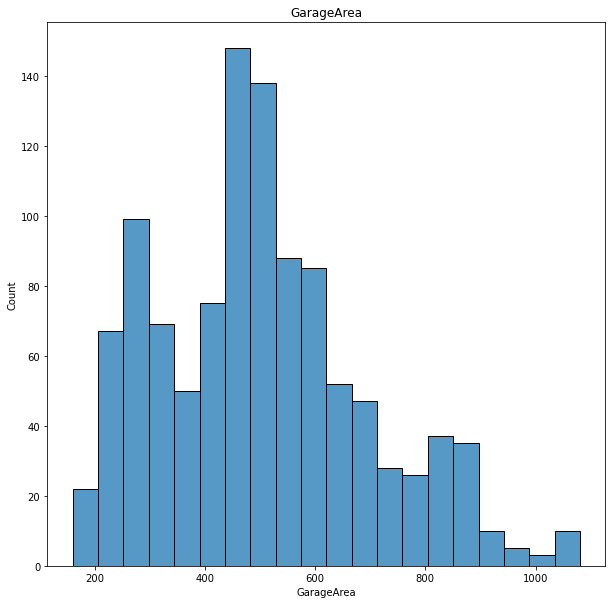

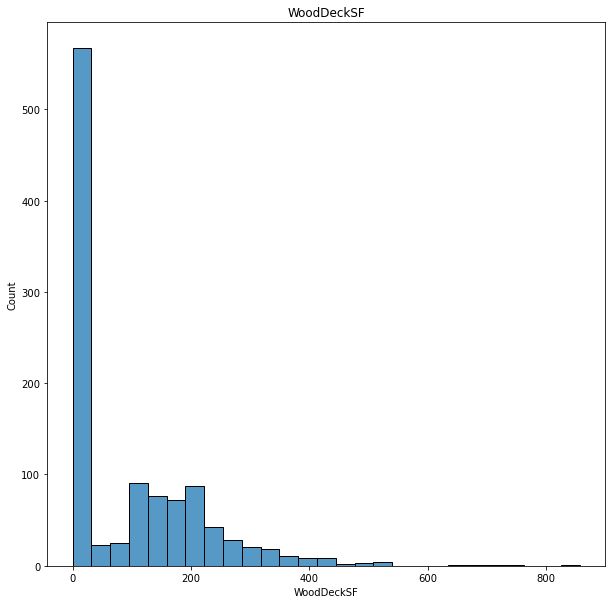

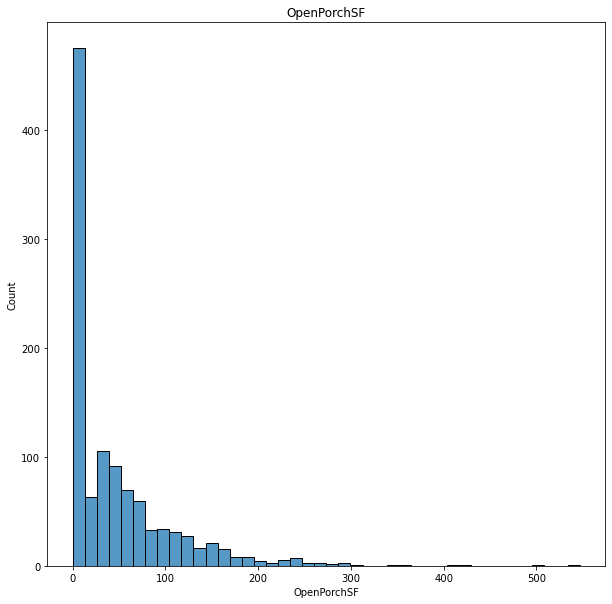

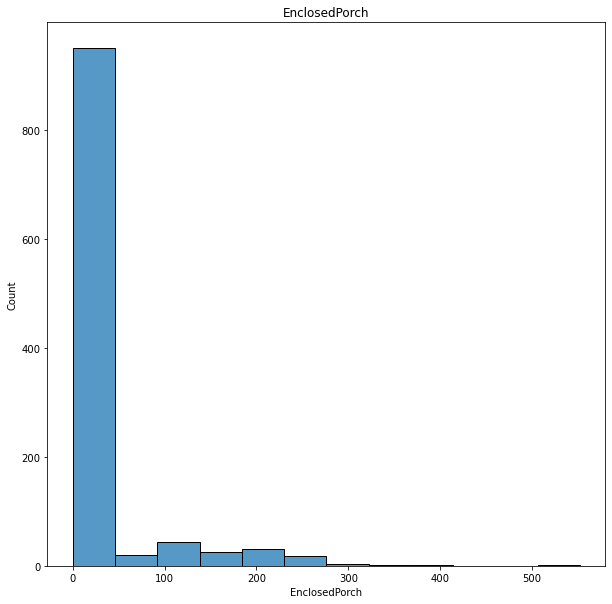

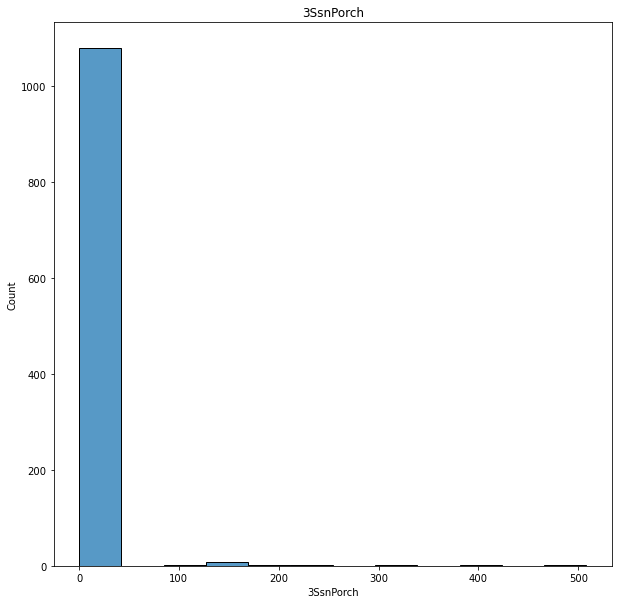

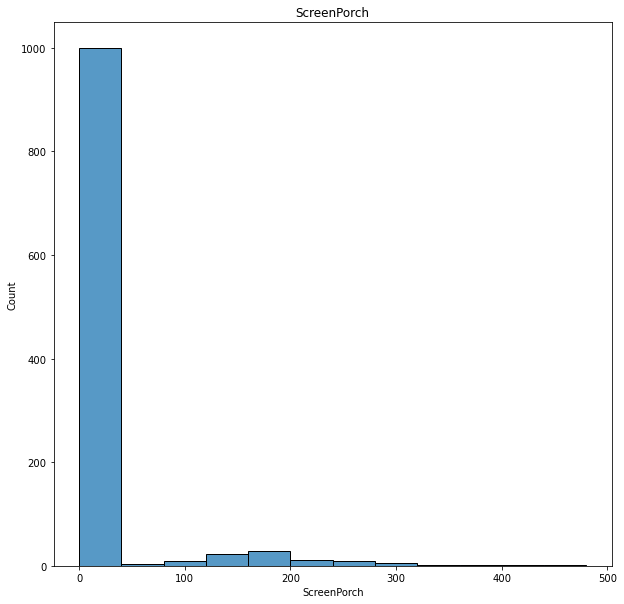

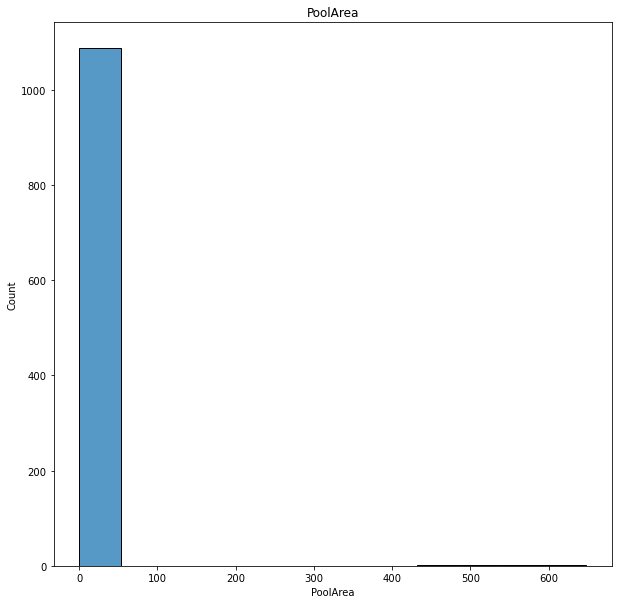

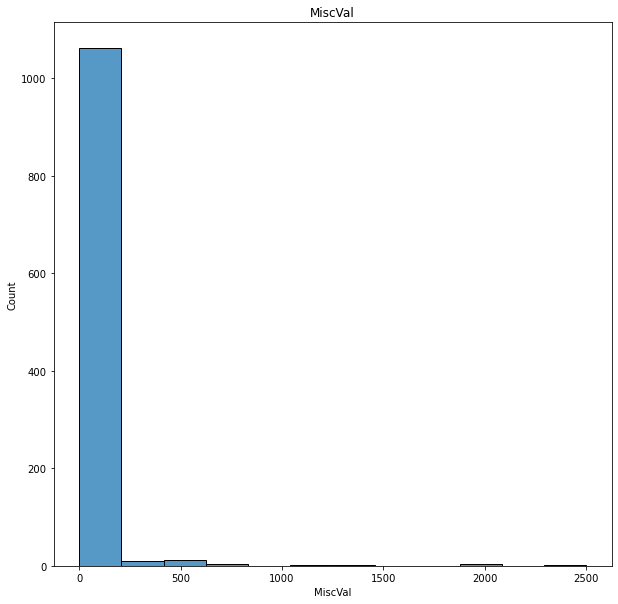

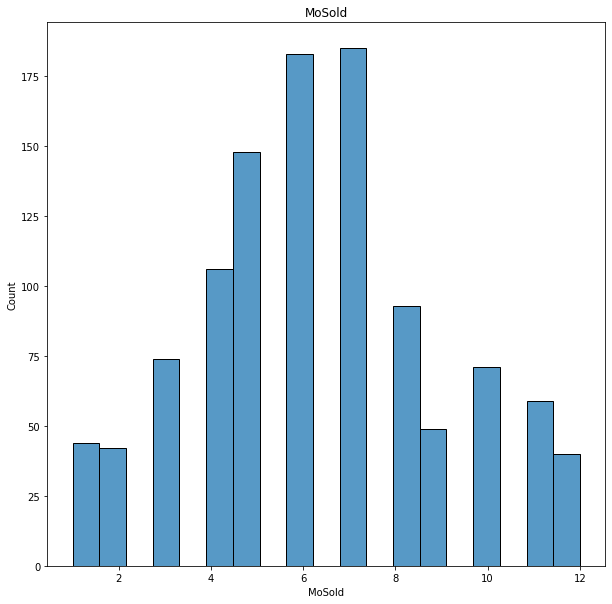

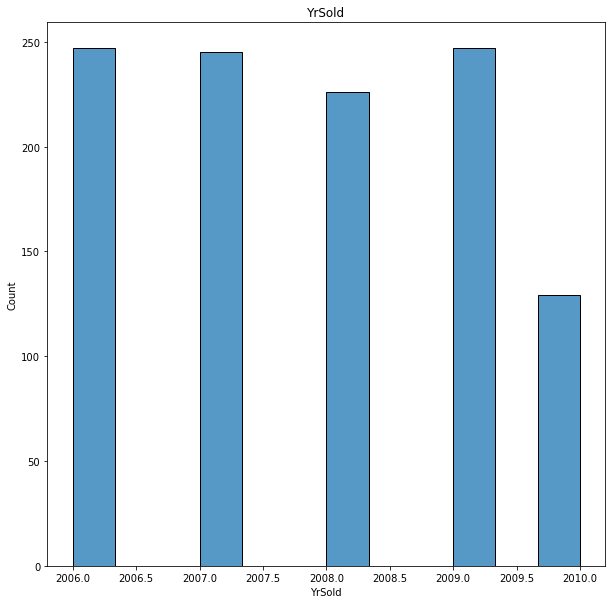

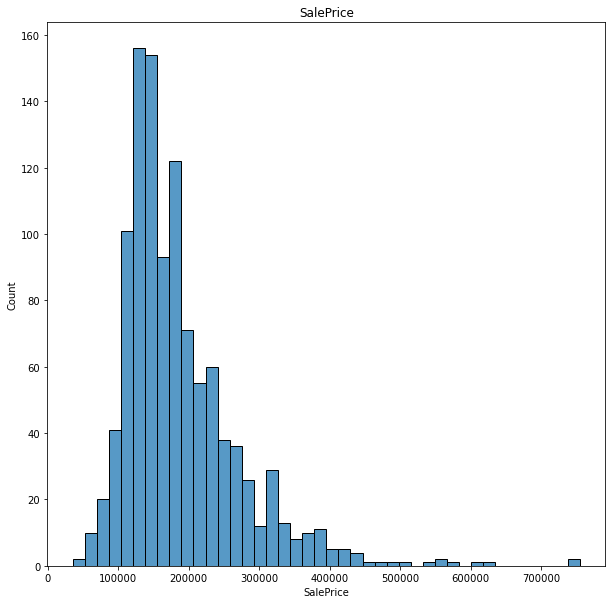

In [19]:
#Numerical values distribution graphs

# get the numerical columns of the DataFrame
num_cols = df_train.select_dtypes(include=['float64','int64']).columns

# create a figure with size (10, 10) for each numerical column
for col in num_cols:
    plt.figure(figsize=(10,10))
    sns.histplot(data=df_train, x=col)
    plt.title(col)
    plt.show()

With capping, we managed capping with upper & lower limits of z-score.

## EXPLORATORY DATA ANALYSIS


In [20]:
df_train.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.015540    -0.029594 -0.038491    -0.058371   
MSSubClass     0.015540    1.000000    -0.430212 -0.317579     0.031639   
LotFrontage   -0.029594   -0.430212     1.000000  0.580013     0.240060   
LotArea       -0.038491   -0.317579     0.580013  1.000000     0.249264   
OverallQual   -0.058371    0.031639     0.240060  0.249264     1.000000   
OverallCond    0.008627   -0.085553    -0.054371 -0.037931    -0.189587   
YearBuilt     -0.022610    0.021605     0.113519  0.051177     0.590761   
YearRemodAdd  -0.030239    0.010178     0.074670  0.069333     0.568582   
MasVnrArea    -0.072344    0.040009     0.191739  0.180224     0.419756   
BsmtFinSF1    -0.024989   -0.074059     0.164453  0.235170     0.218426   
BsmtFinSF2     0.013723   -0.075272     0.050975  0.048836    -0.108996   
BsmtUnfSF     -0.012862   -0.146758     0.134664  0.064068     0.294870   
TotalBsmtSF   -0.037125   -0.286773     0.369112  0.371314     0.559381   
1stFlrSF      -0.015089   -0.270740     0.416169  0.414543     0.529217   
2ndFlrSF      -0.006849    0.320795     0.067649  0.143909     0.263232   
LowQualFinSF  -0.030432    0.039432    -0.020139  0.015503    -0.028742   
GrLivArea     -0.021505    0.081910     0.359209  0.419180     0.614057   
BsmtFullBath   0.027265   -0.013040     0.094692  0.170407     0.107138   
BsmtHalfBath  -0.027415    0.012509    -0.000874 -0.011175    -0.060775   
FullBath       0.003601    0.119495     0.195558  0.191616     0.597881   
HalfBath      -0.015403    0.206259     0.044392  0.095653     0.239893   
BedroomAbvGr   0.039320   -0.044628     0.293045  0.253074     0.091462   
KitchenAbvGr   0.013252    0.258401     0.012051 -0.008131    -0.141071   
TotRmsAbvGrd   0.013832    0.038180     0.355375  0.372226     0.465733   
Fireplaces    -0.015798   -0.029575     0.255802  0.334721     0.409725   
GarageYrBlt   -0.003820    0.051225     0.071285  0.036852     0.562405   
GarageCars    -0.009568   -0.031638     0.311133  0.285939     0.605466   
GarageArea    -0.025674   -0.094423     0.357834  0.329710     0.558616   
WoodDeckSF    -0.027597   -0.018514     0.090980  0.209743     0.273652   
OpenPorchSF   -0.000987    0.006799     0.156930  0.173539     0.335884   
EnclosedPorch  0.011796   -0.019313     0.010145 -0.018579    -0.155080   
3SsnPorch     -0.061688   -0.035855     0.084069  0.031069     0.020081   
ScreenPorch    0.015019   -0.021854     0.044958  0.128283     0.049286   
PoolArea       0.048487    0.003221     0.131231  0.133074     0.080037   
MiscVal        0.050954   -0.043299     0.003785  0.031456    -0.062944   
MoSold         0.007486   -0.025393     0.015963  0.003839     0.082995   
YrSold         0.005307   -0.012347     0.014959 -0.039683    -0.003529   
SalePrice     -0.047595   -0.089478     0.371876  0.425503     0.795437   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.008627  -0.022610     -0.030239   -0.072344   -0.024989   
MSSubClass       -0.085553   0.021605      0.010178    0.040009   -0.074059   
LotFrontage      -0.054371   0.113519      0.074670    0.191739    0.164453   
LotArea          -0.037931   0.051177      0.069333    0.180224    0.235170   
OverallQual      -0.189587   0.590761      0.568582    0.419756    0.218426   
OverallCond       1.000000  -0.437647      0.024427   -0.174581   -0.067323   
YearBuilt        -0.437647   1.000000      0.625905    0.328897    0.238155   
YearRemodAdd      0.024427   0.625905      1.000000    0.187492    0.108593   
MasVnrArea       -0.174581   0.328897      0.187492    1.000000    0.265665   
BsmtFinSF1       -0.067323   0.238155      0.108593    0.265665    1.000000   
BsmtFinSF2        0.060379  -0.077299     -0.087184   -0.087155   -0.037475   
BsmtUnfSF        -0.169781   0.169009      0.186800    0.095127   -0.584642   
TotalBsmtSF      -0.257909   0.446475      0.315793    0.387508    0

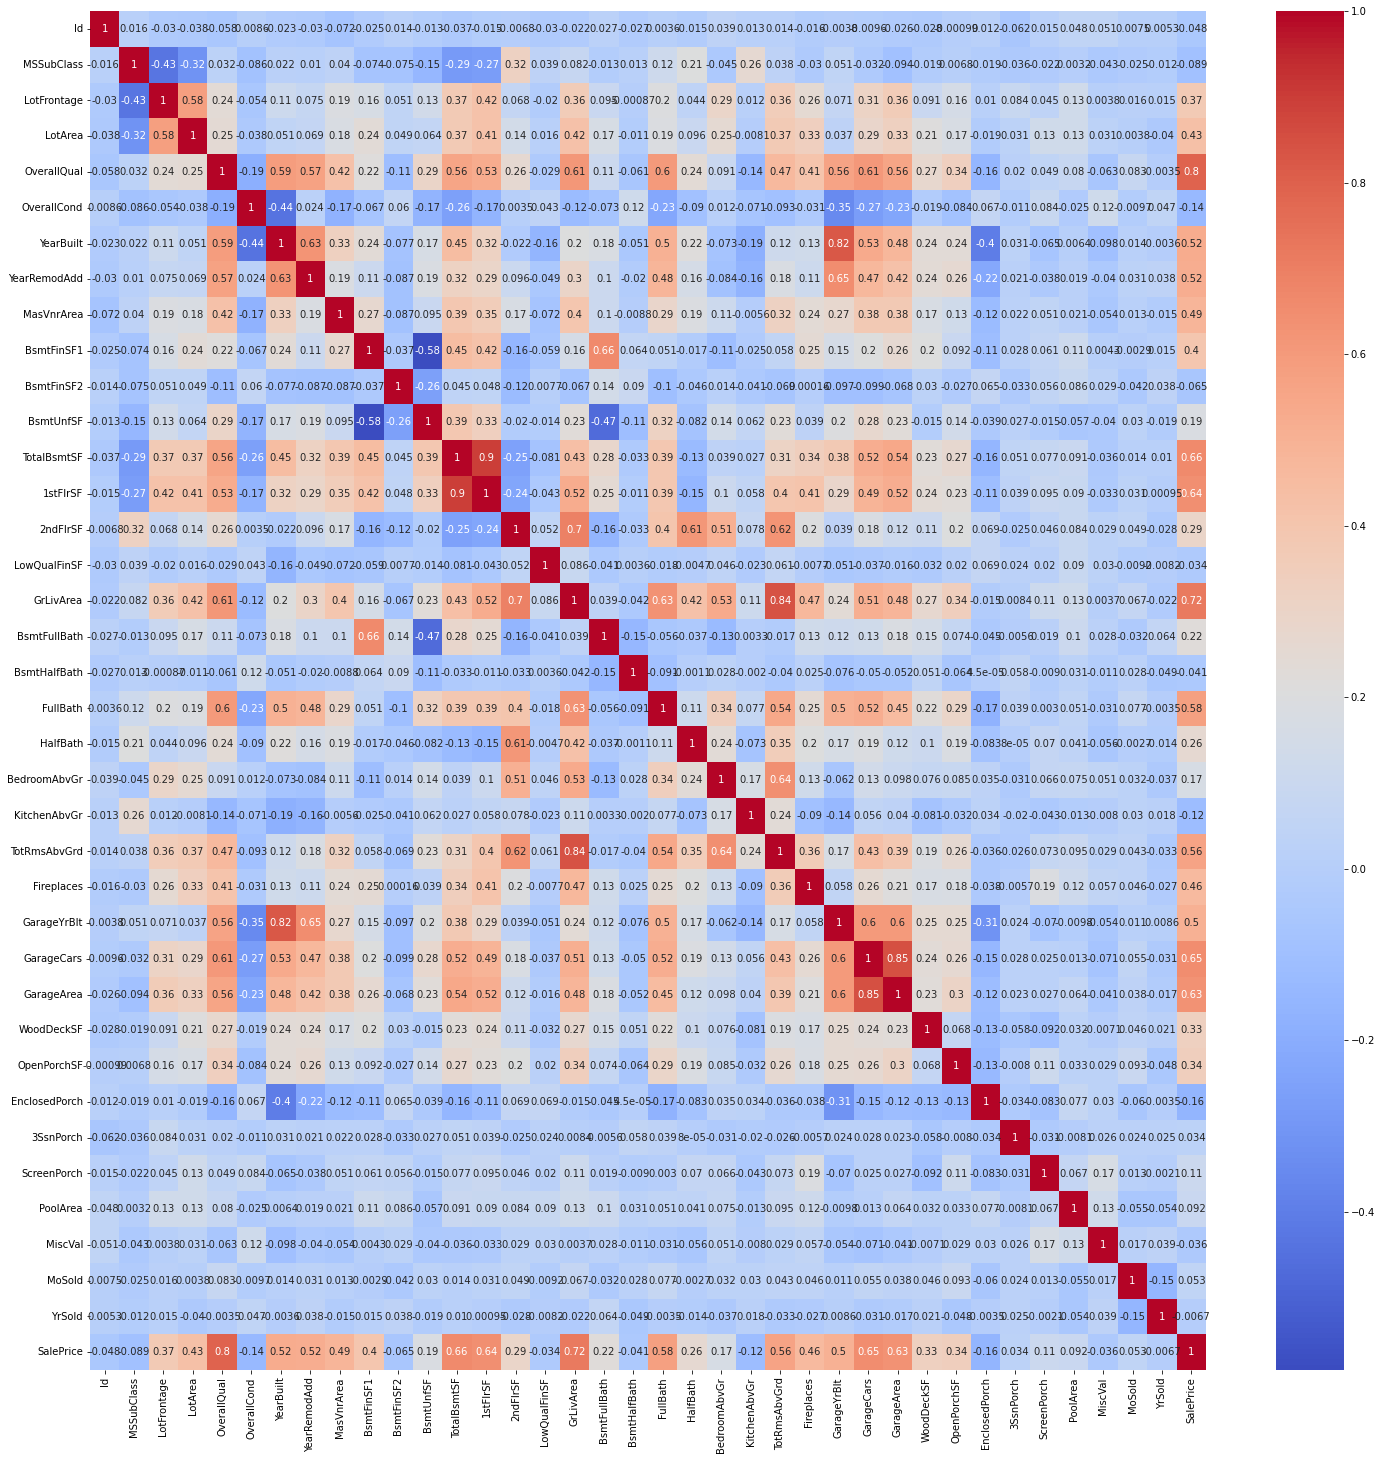

In [21]:

plt.figure(figsize=(25,25))

sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

It is obvious that our dataset have correlated variables. We should get rid of correlation problem before building some models like linear regression.  

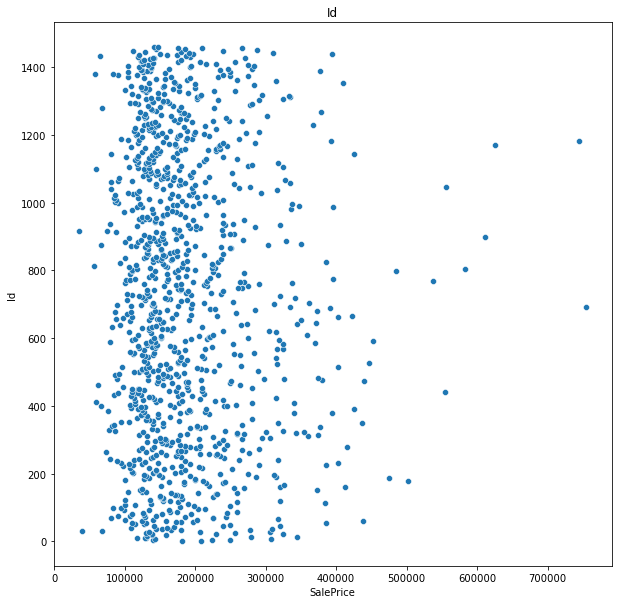

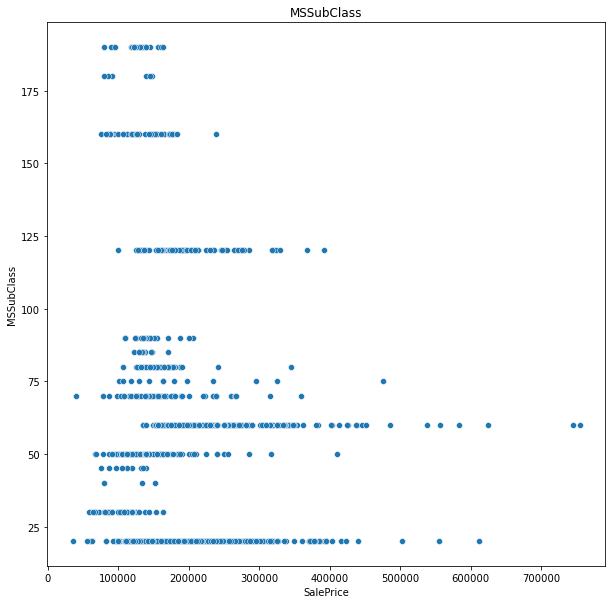

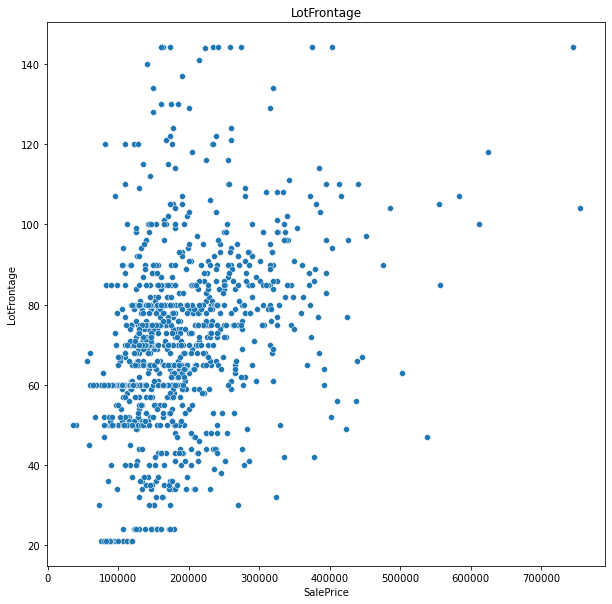

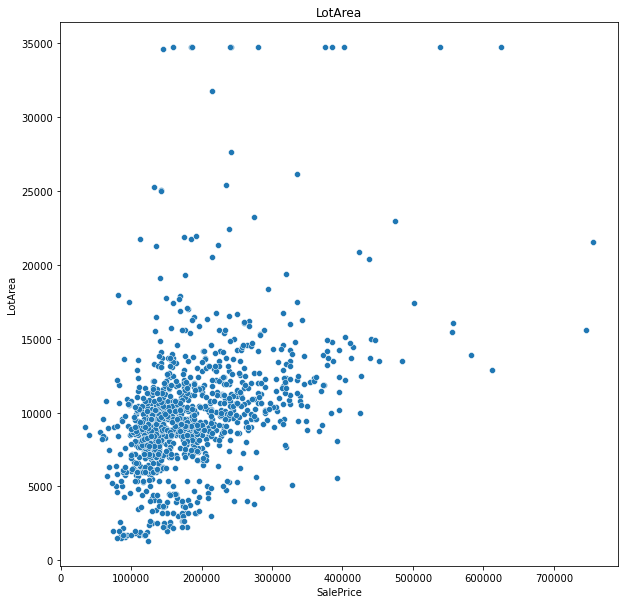

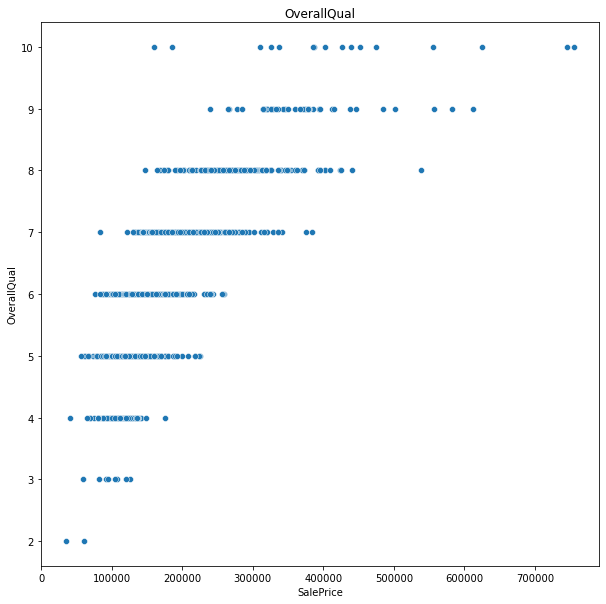

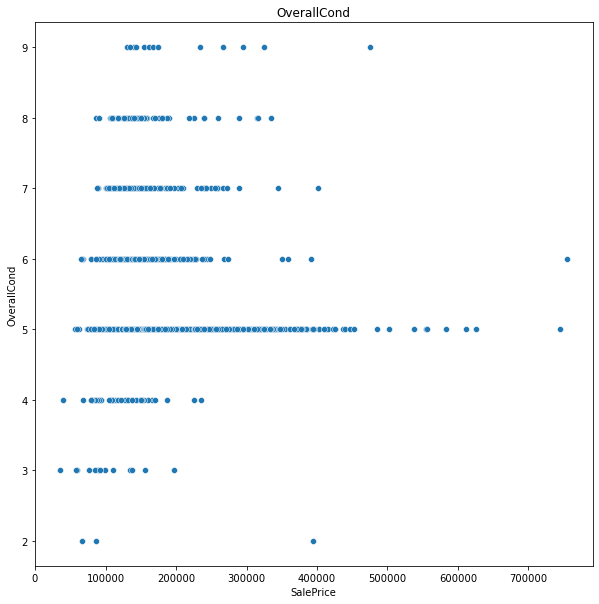

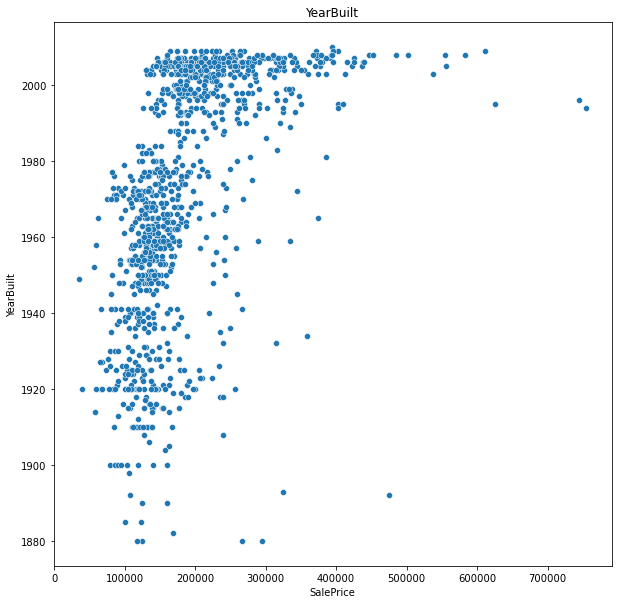

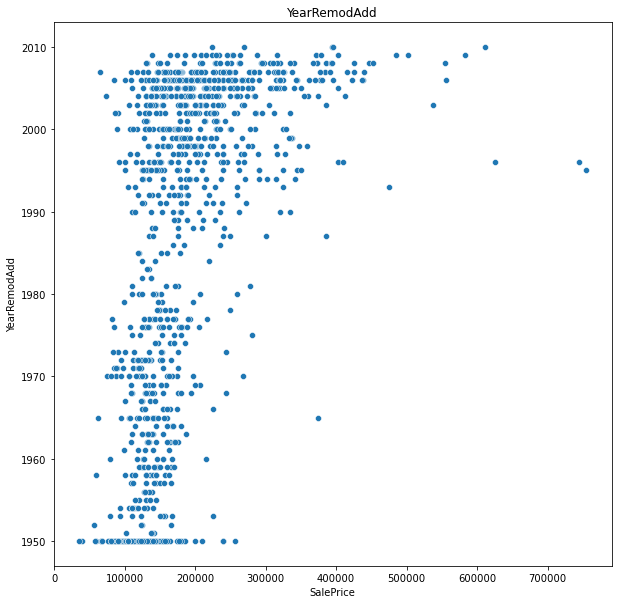

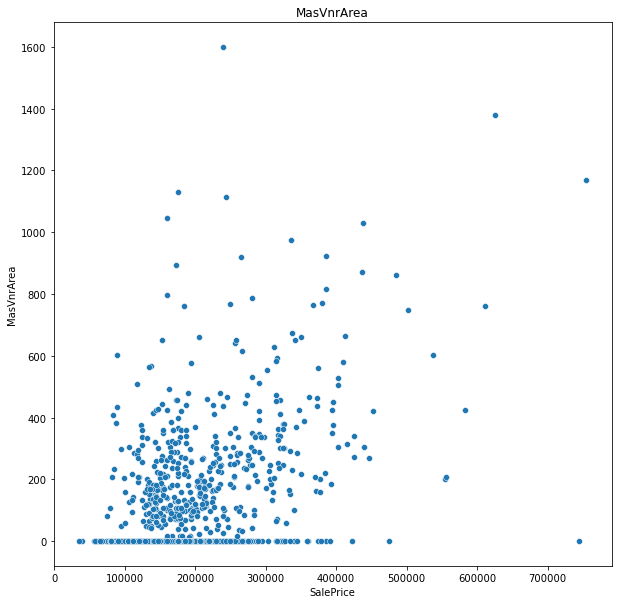

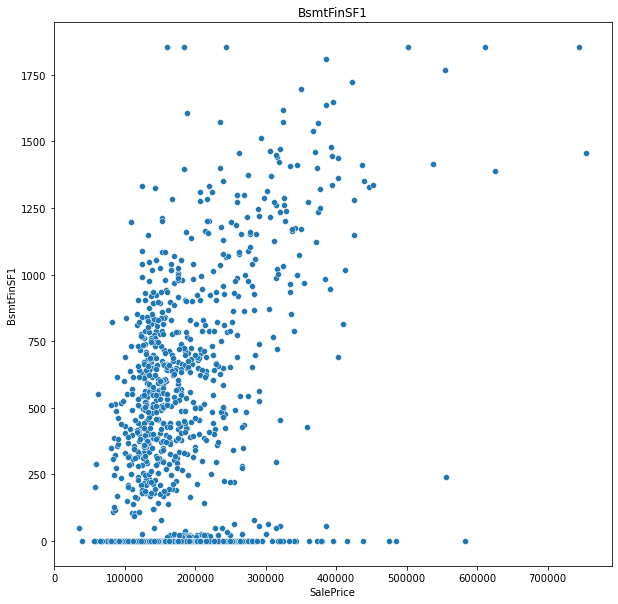

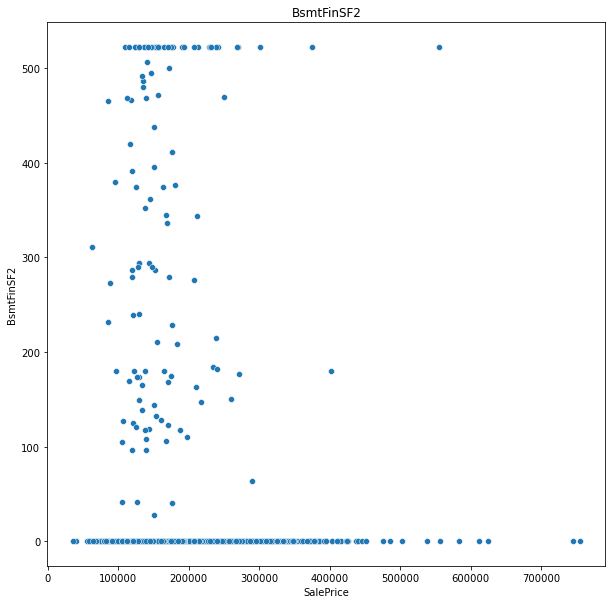

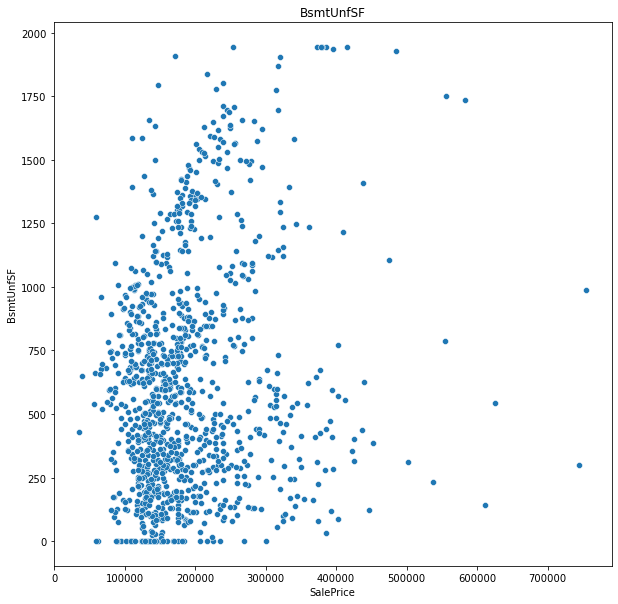

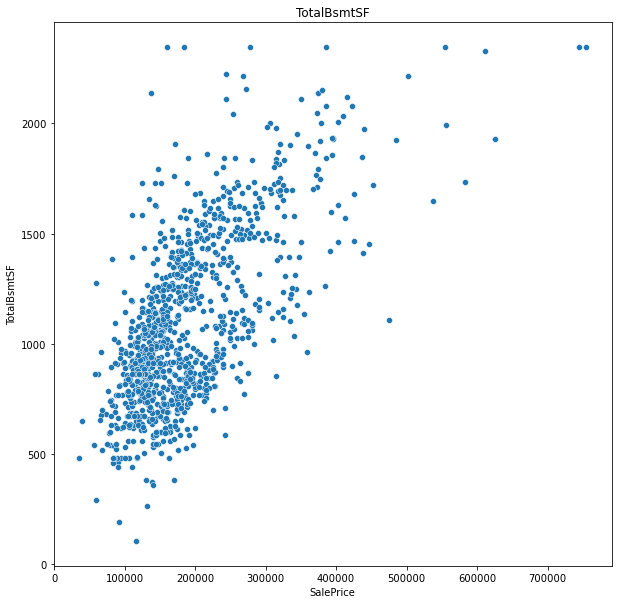

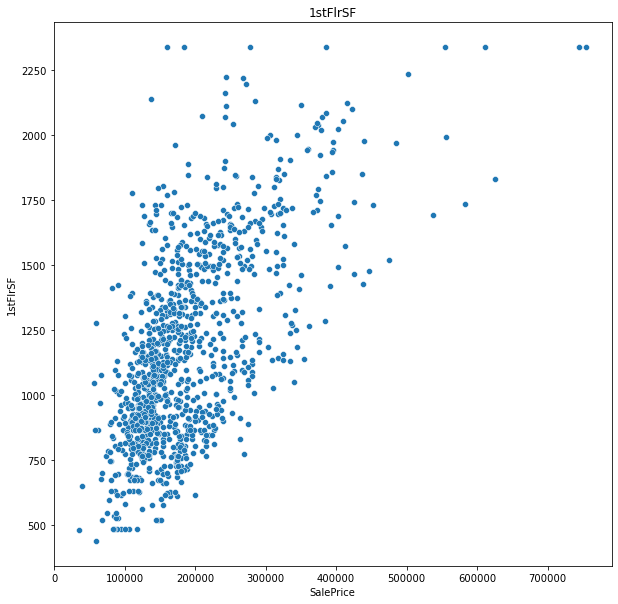

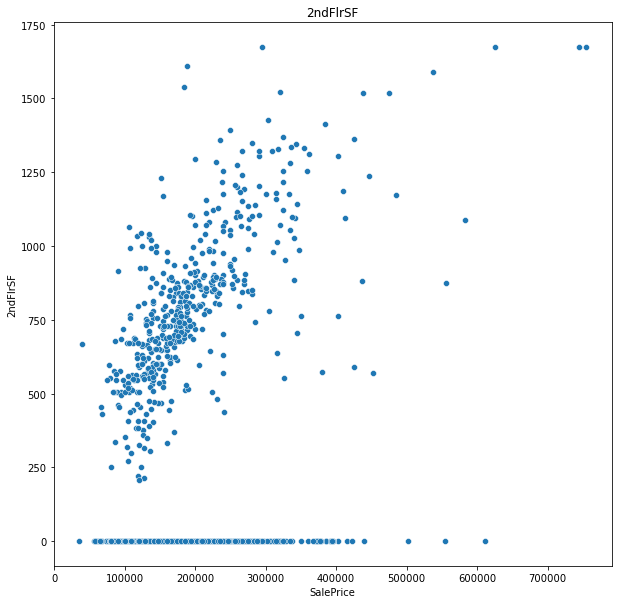

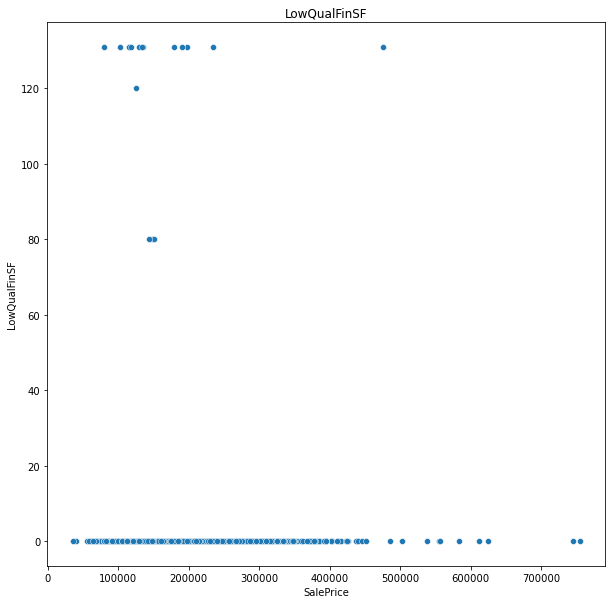

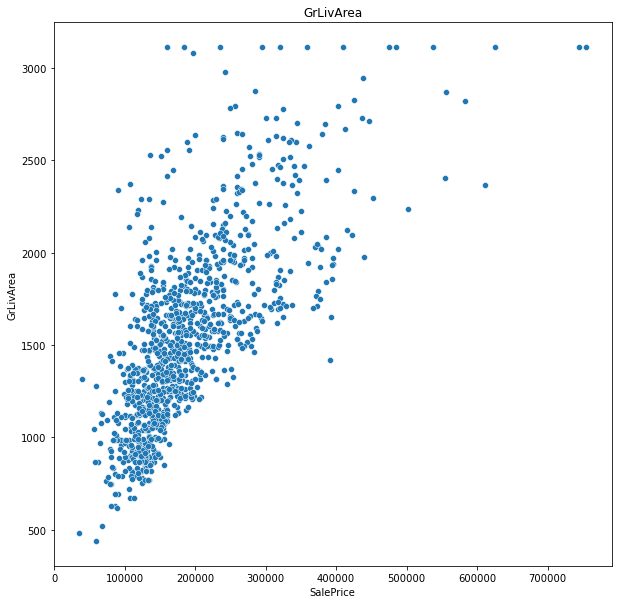

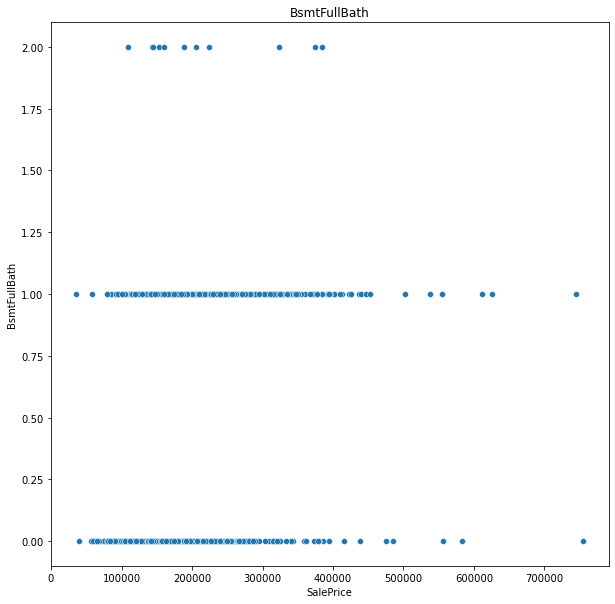

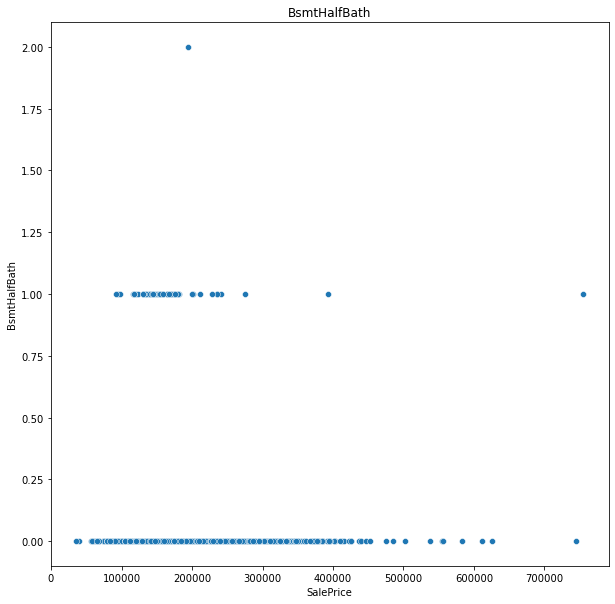

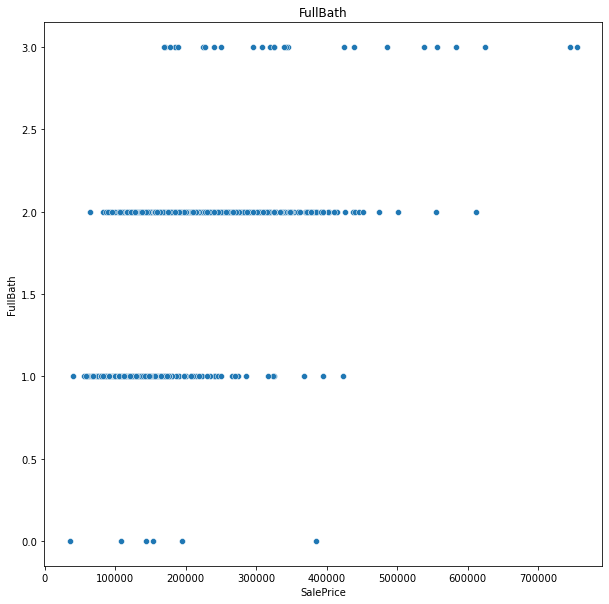

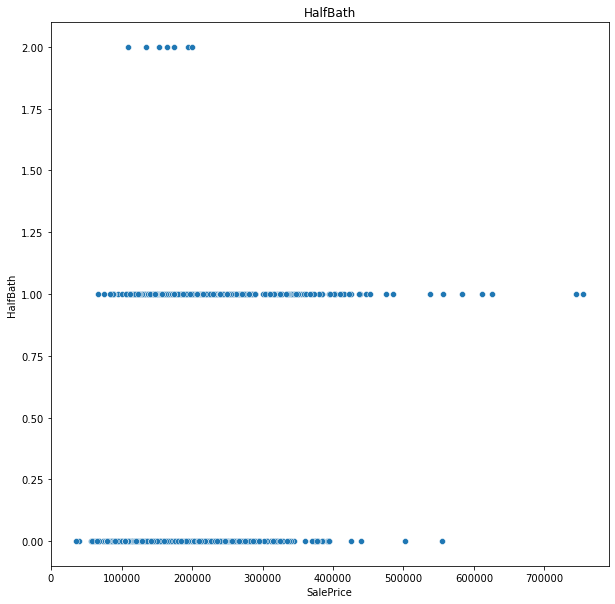

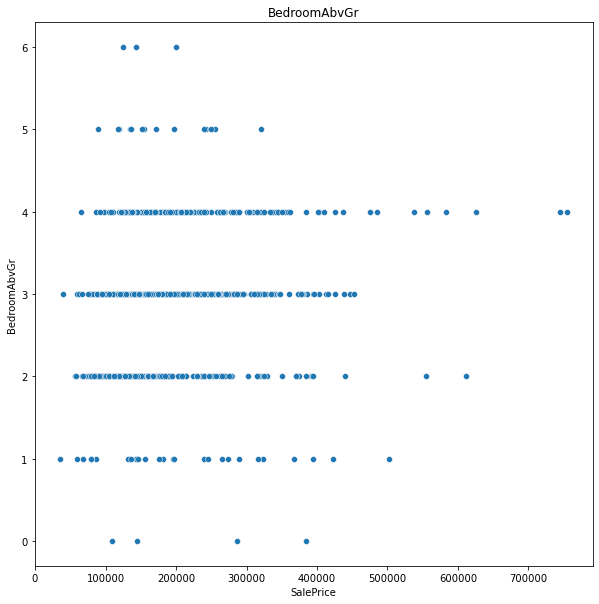

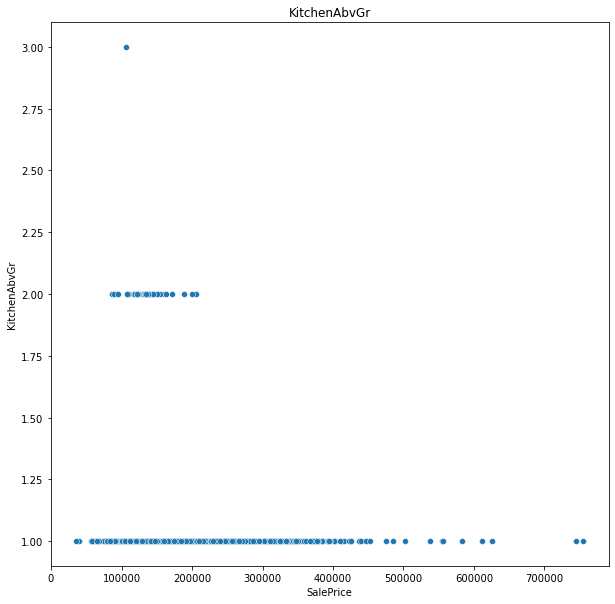

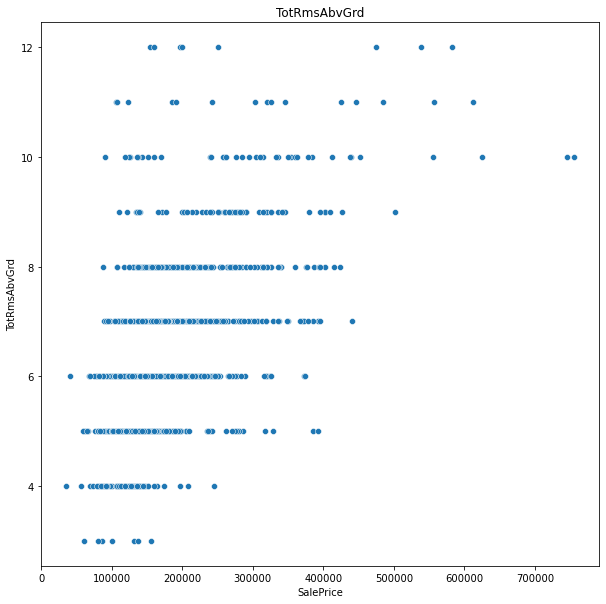

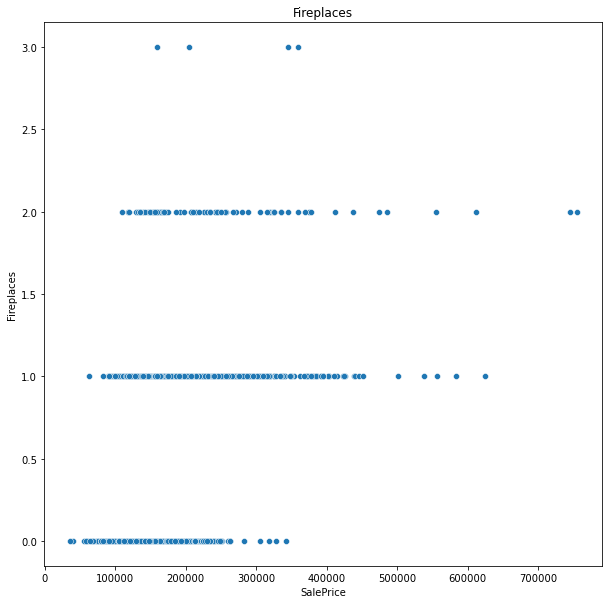

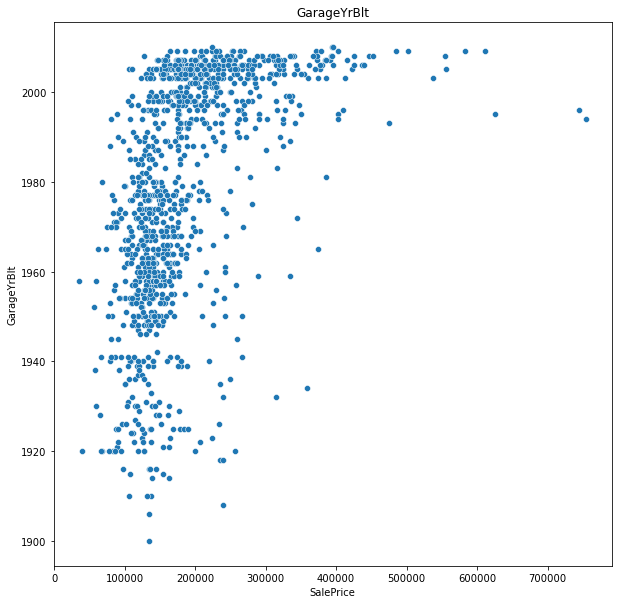

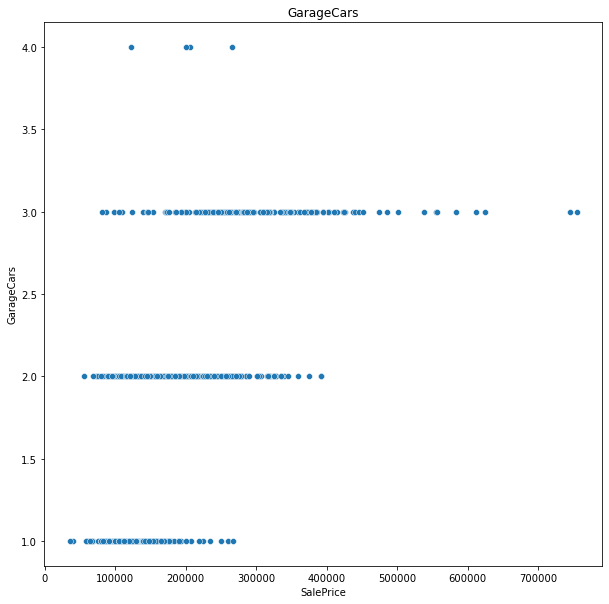

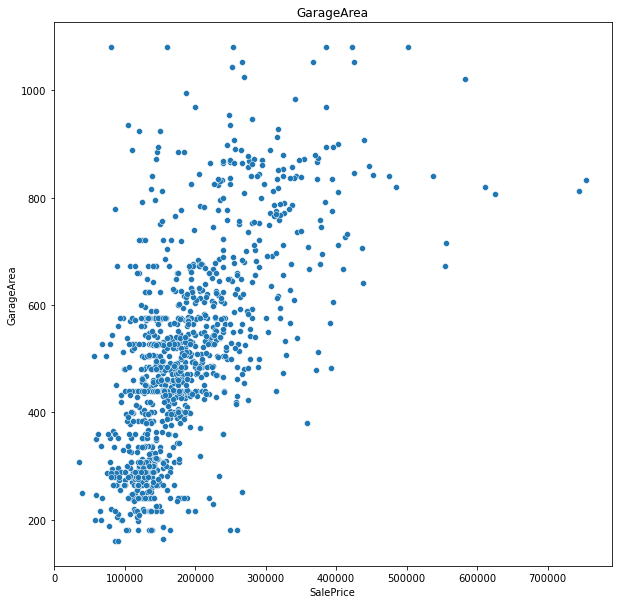

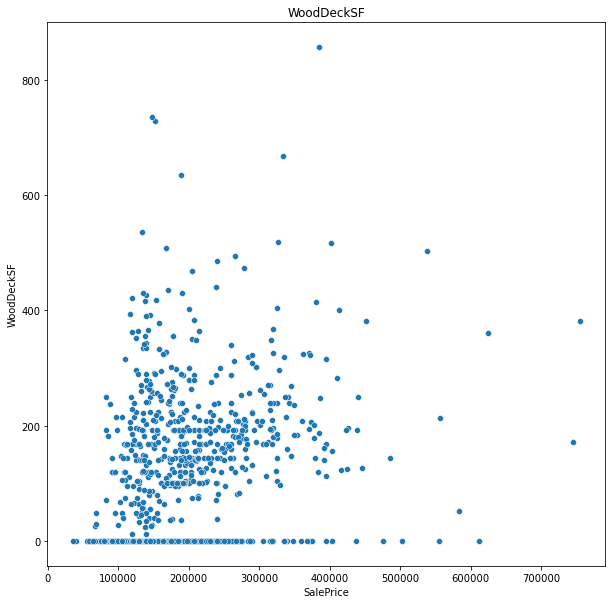

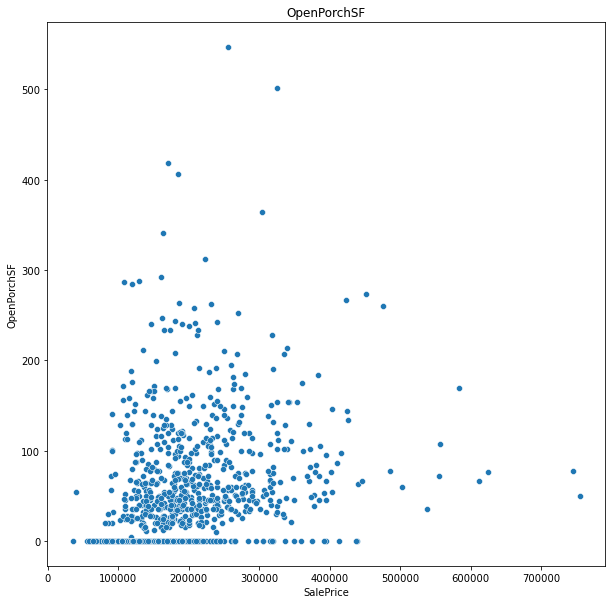

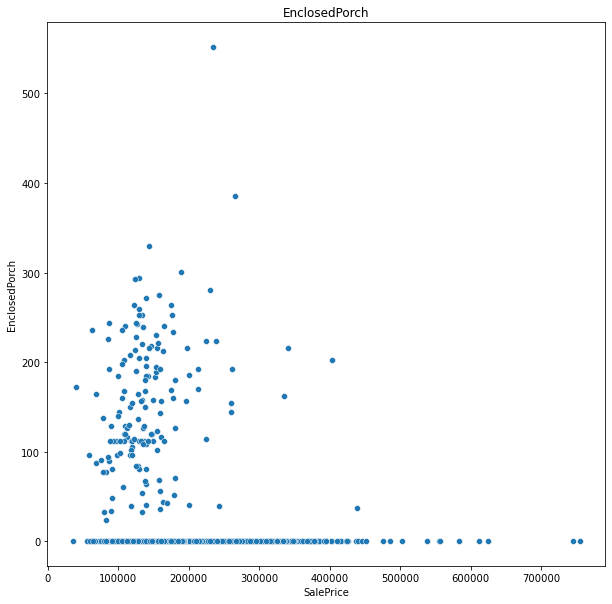

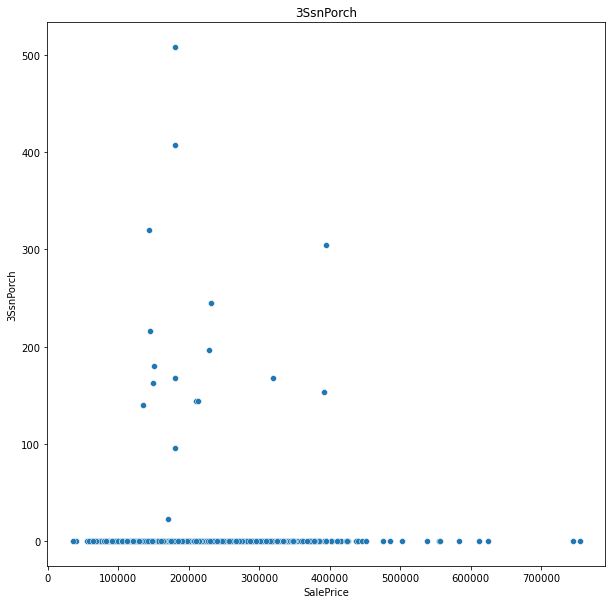

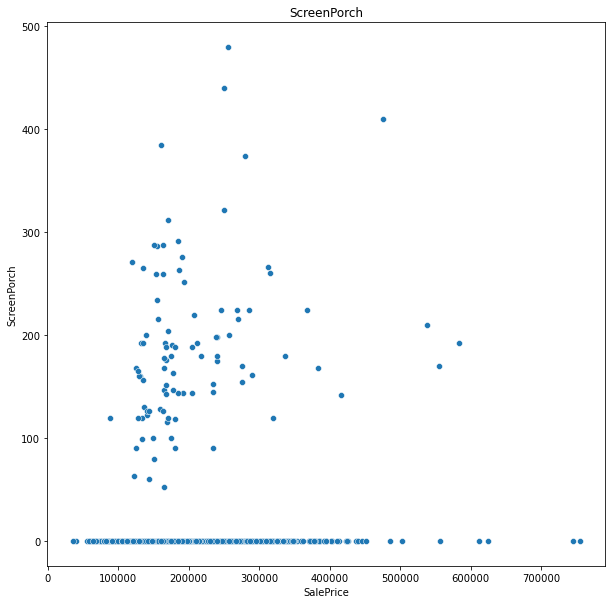

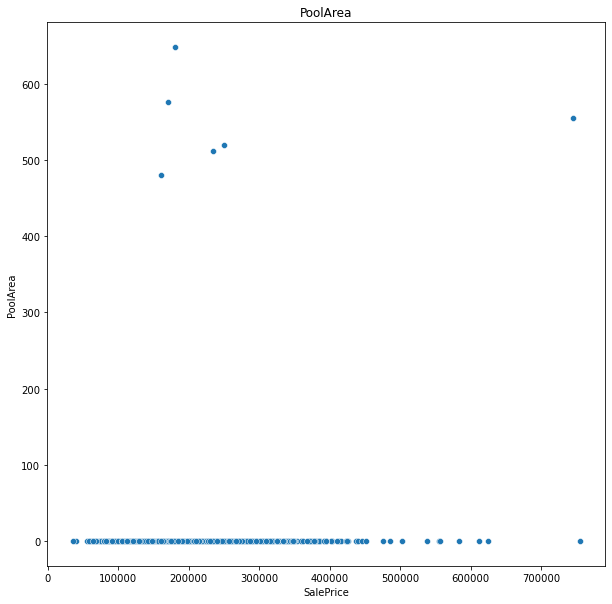

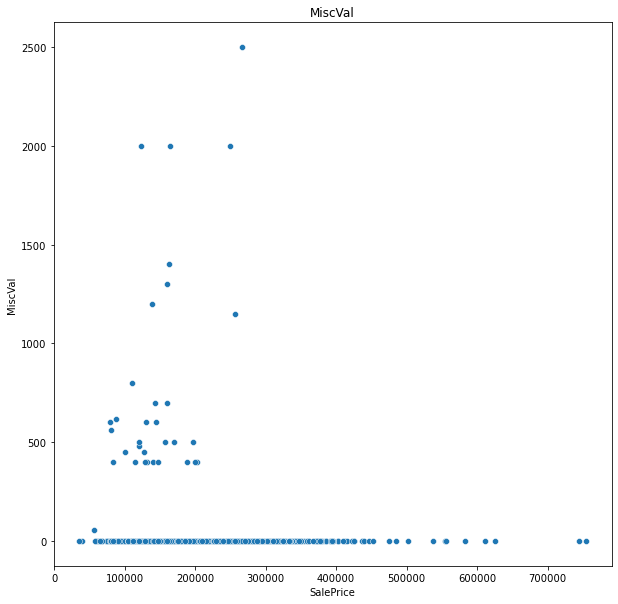

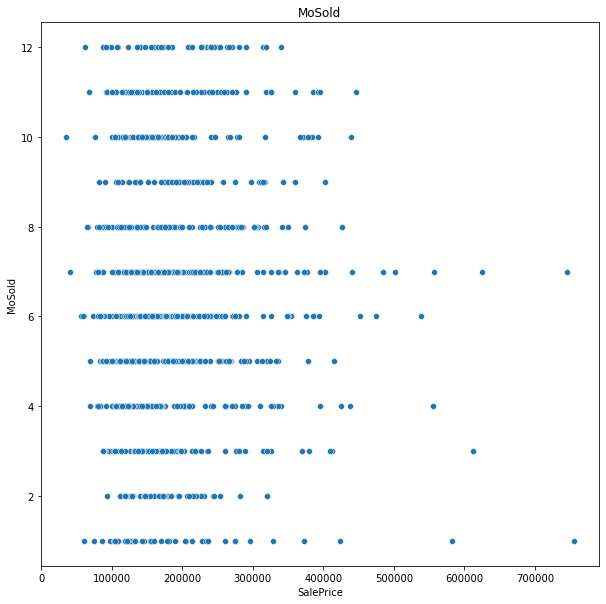

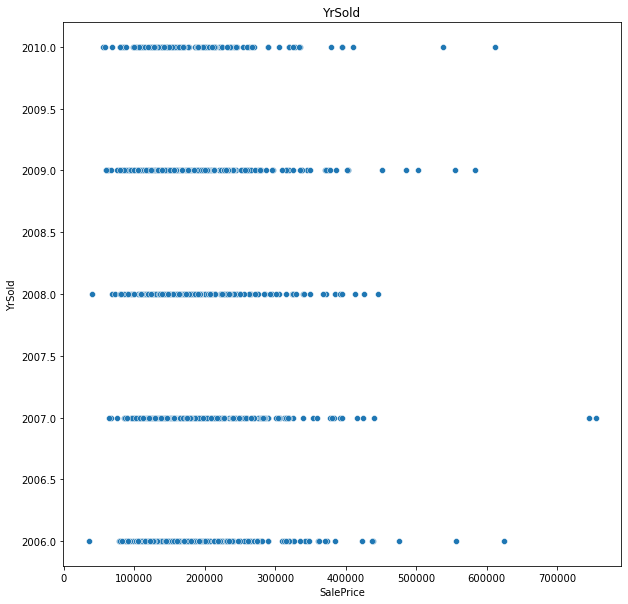

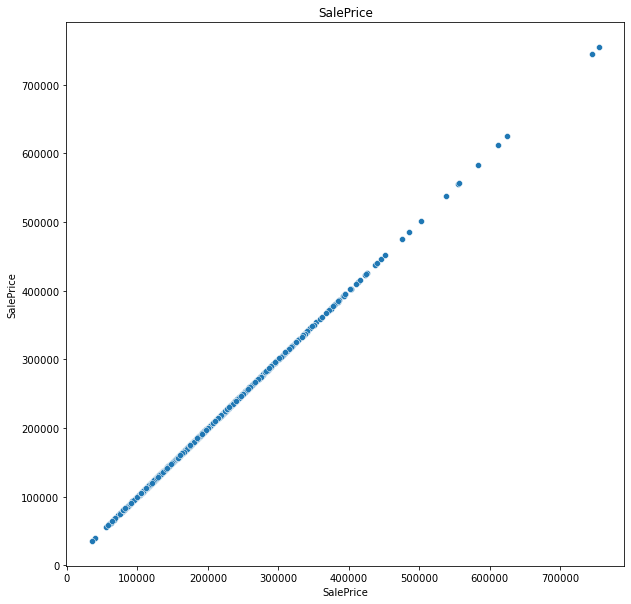

In [22]:
#I want to explore relationship price sale vs numerical values

# select numerical features
num_cols = df_train.select_dtypes(include=['float64','int64']).columns

# create a scatterplot for each numerical feature
for col in num_cols:
    plt.figure(figsize=(10,10))
    ax = sns.scatterplot(data=df_train, x='SalePrice', y=col)
    plt.title(col)
    plt.show()

Some of the variables like GarageArea, LotArea, YearBuilt etc. have significant correlation with saleprice. These factors are strong input candidates for prediction.

In [23]:
df_train = df_train.drop('Id', axis=1)

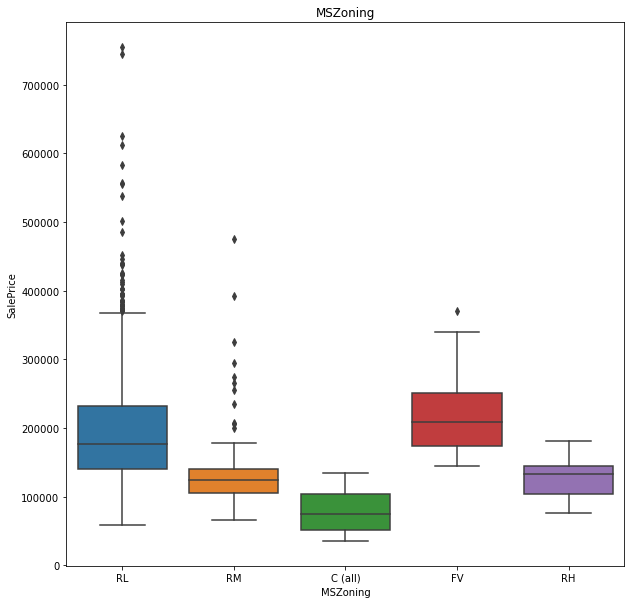

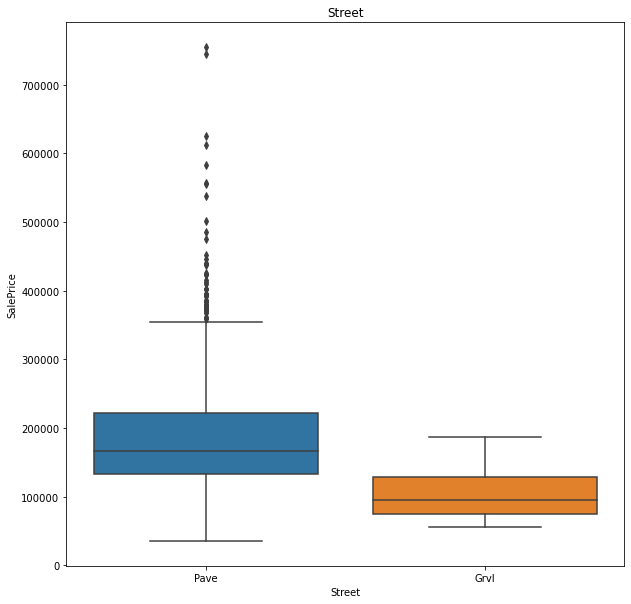

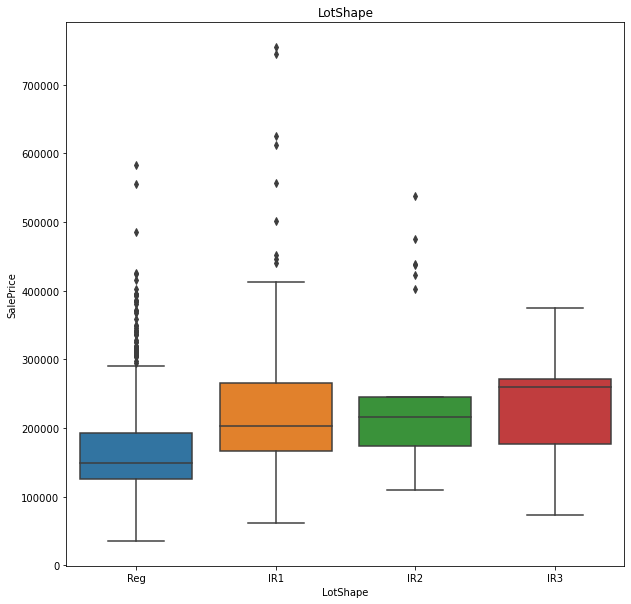

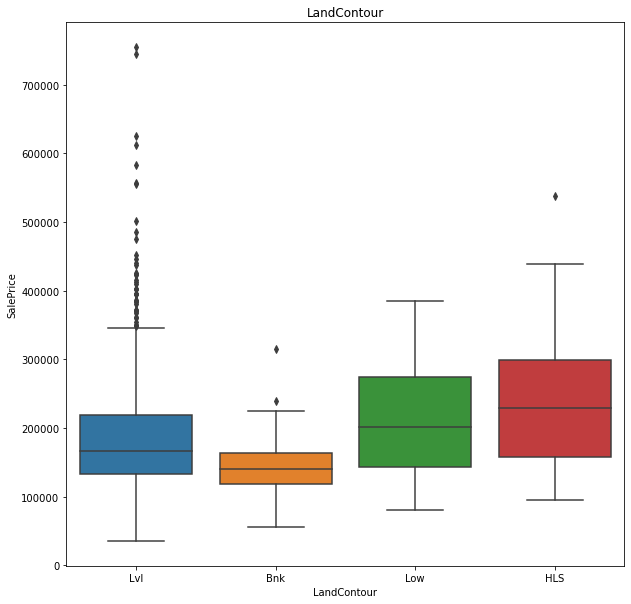

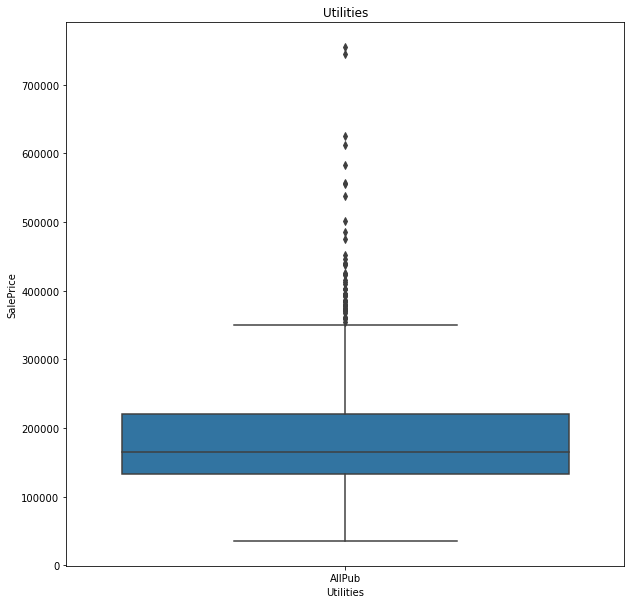

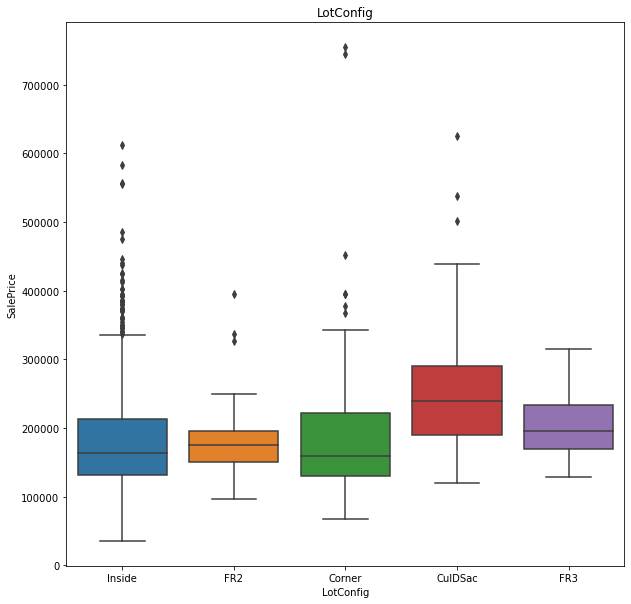

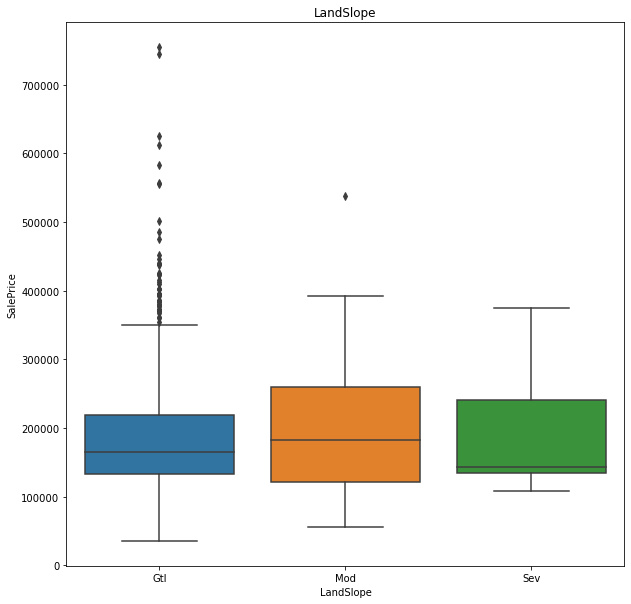

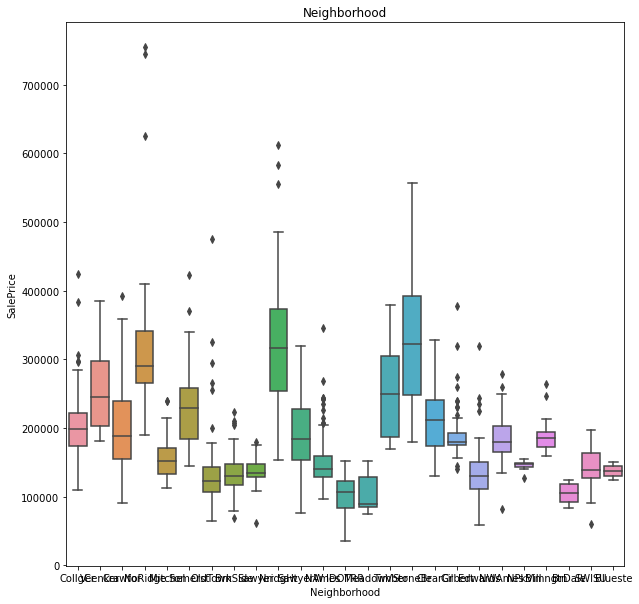

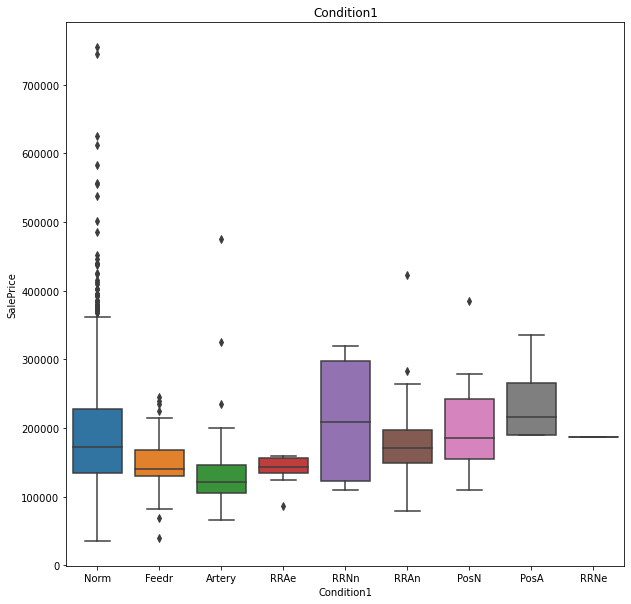

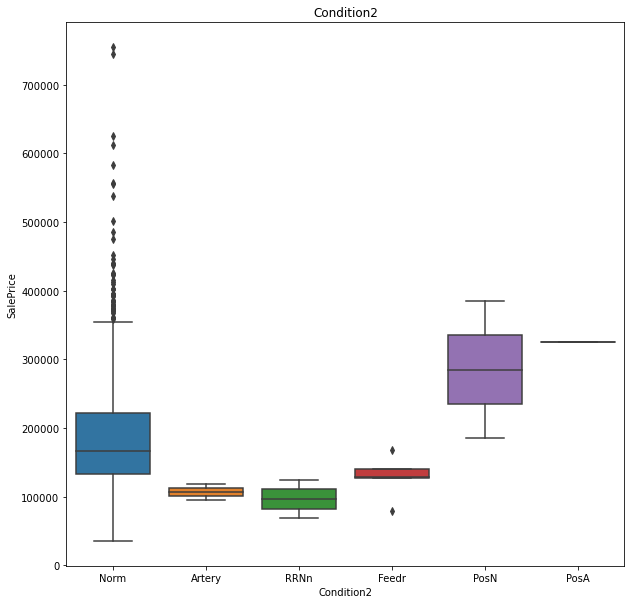

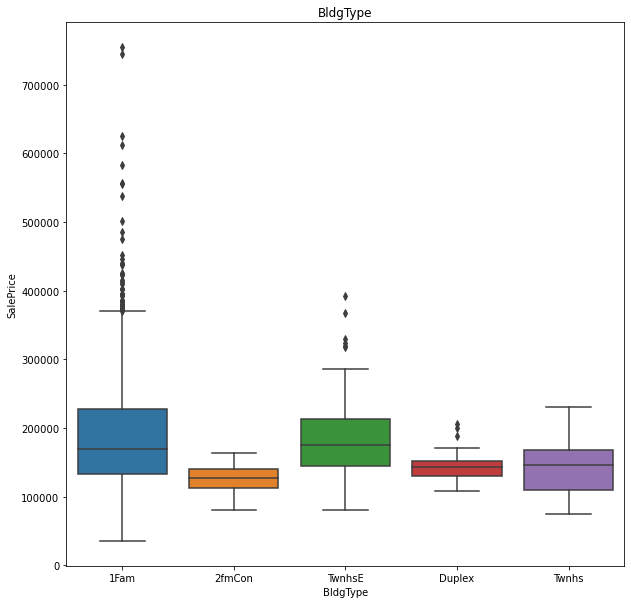

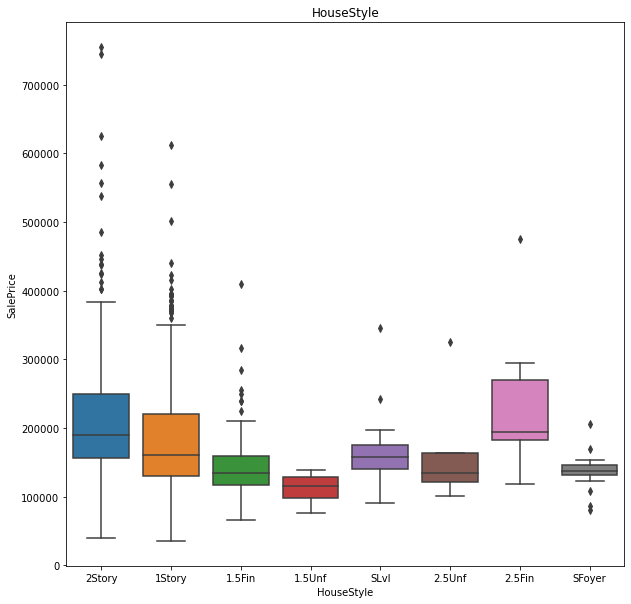

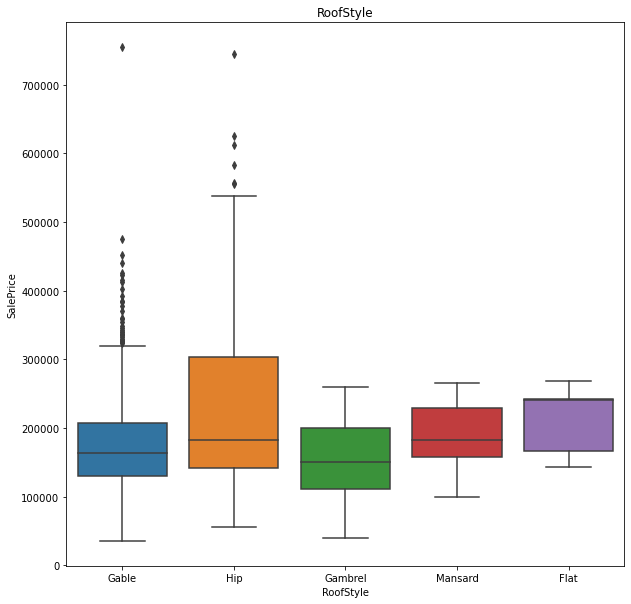

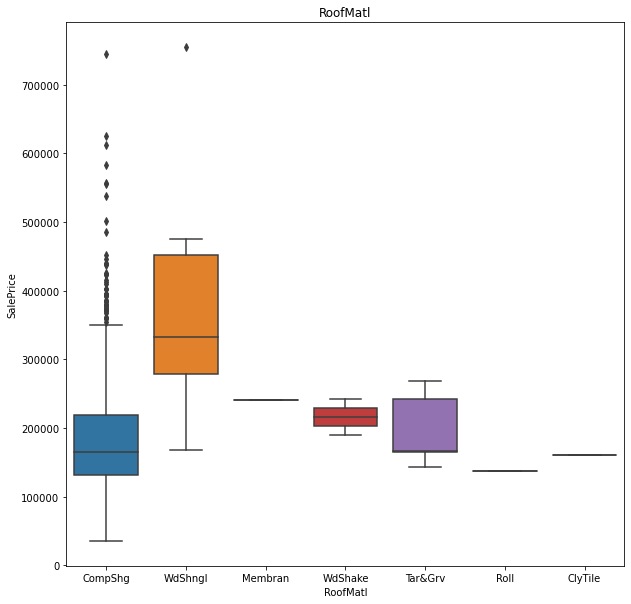

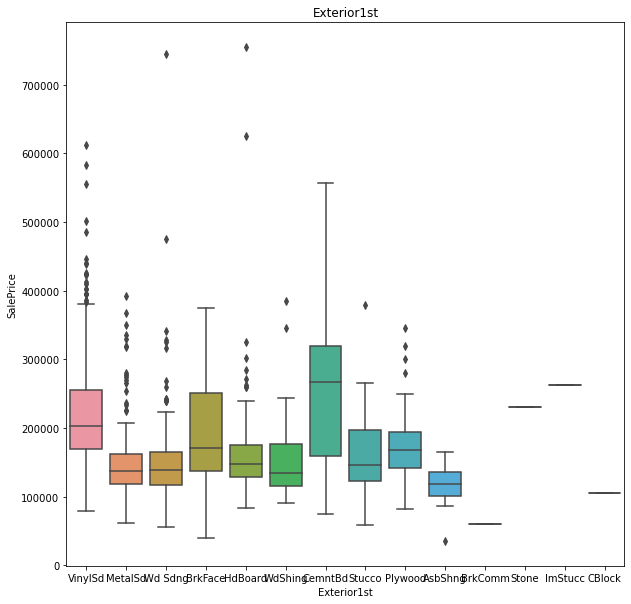

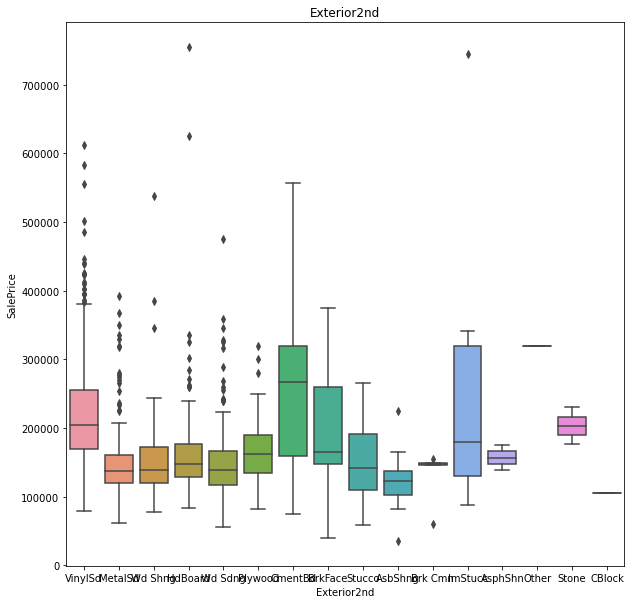

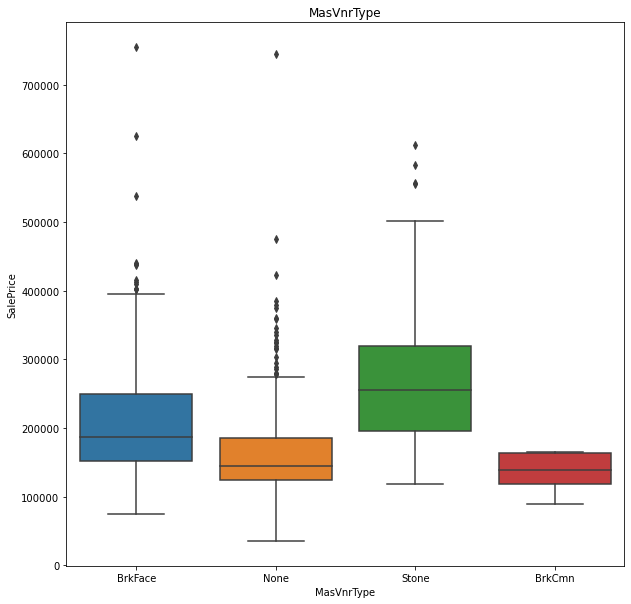

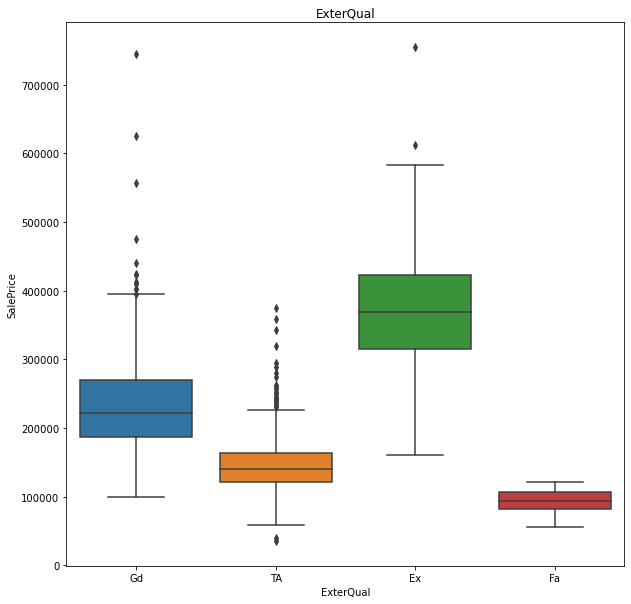

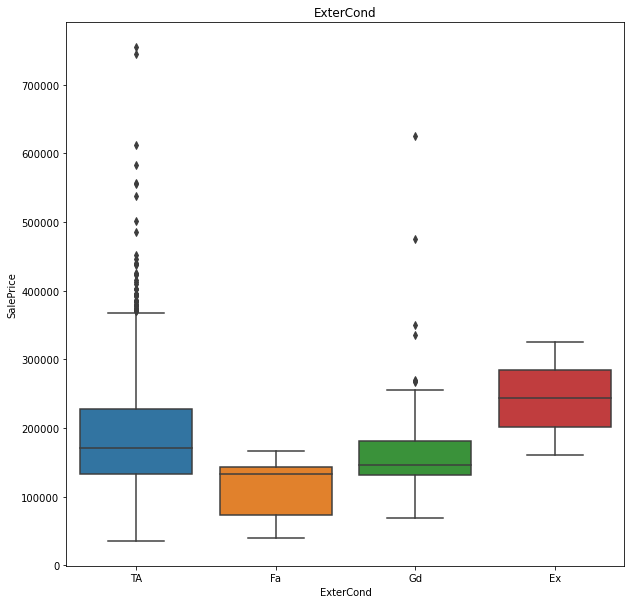

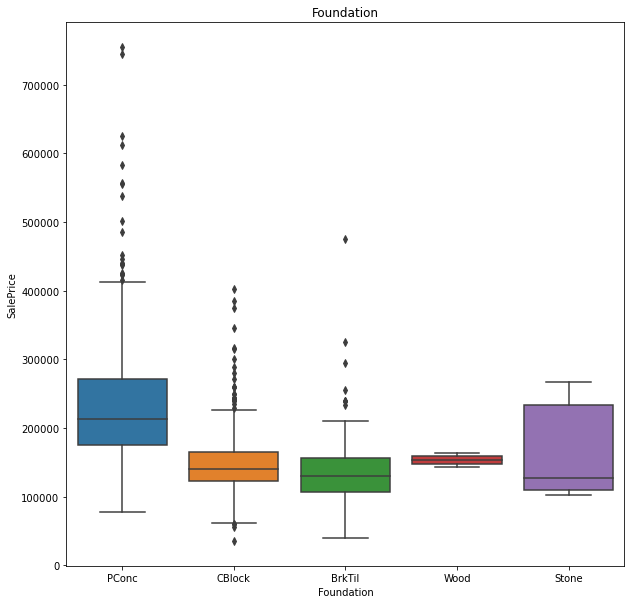

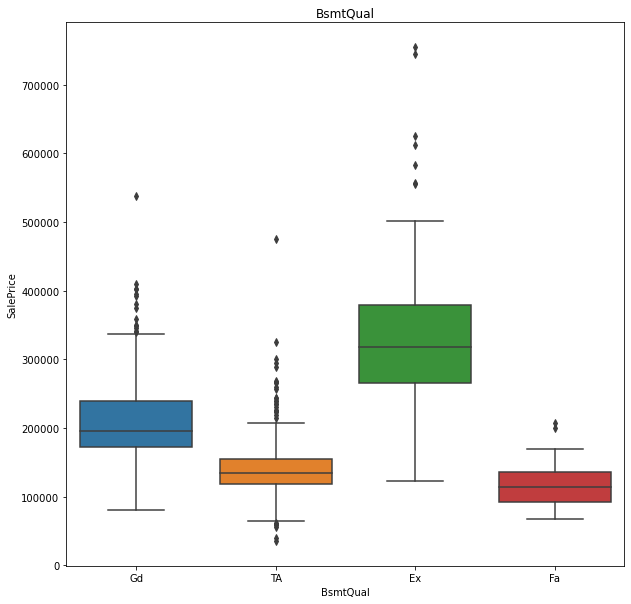

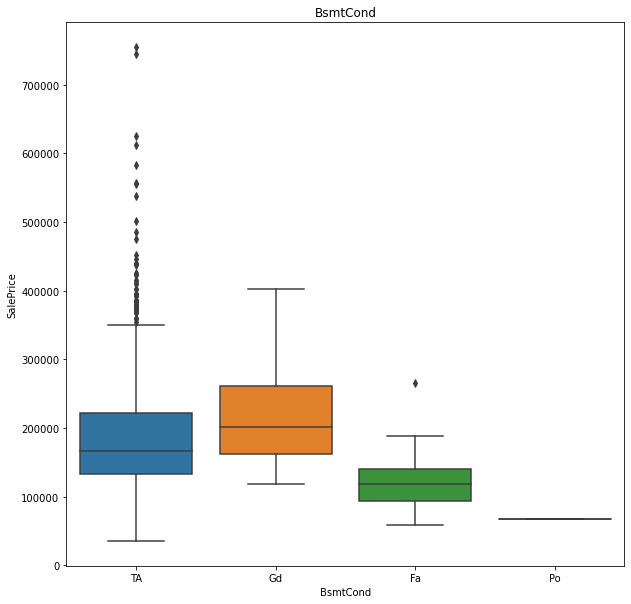

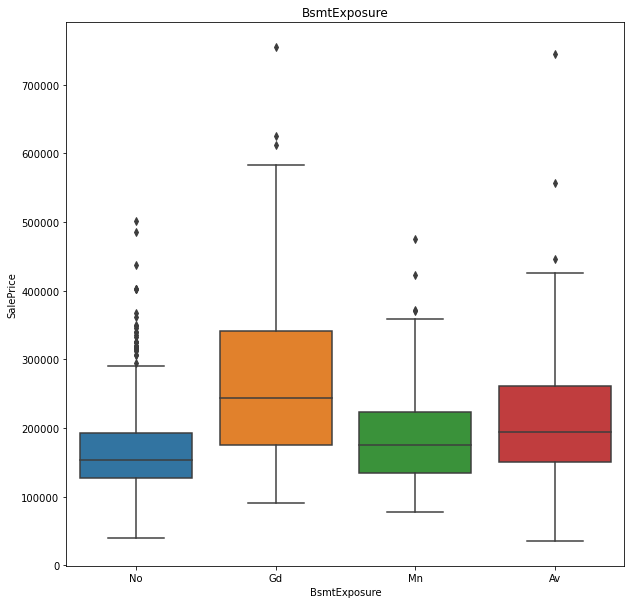

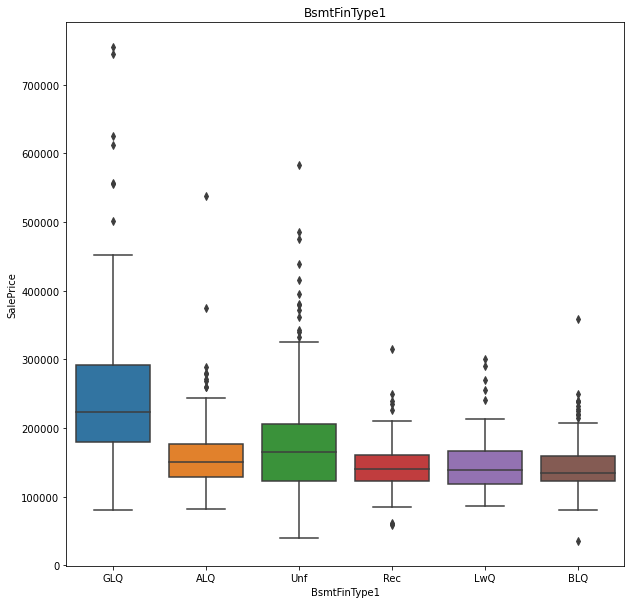

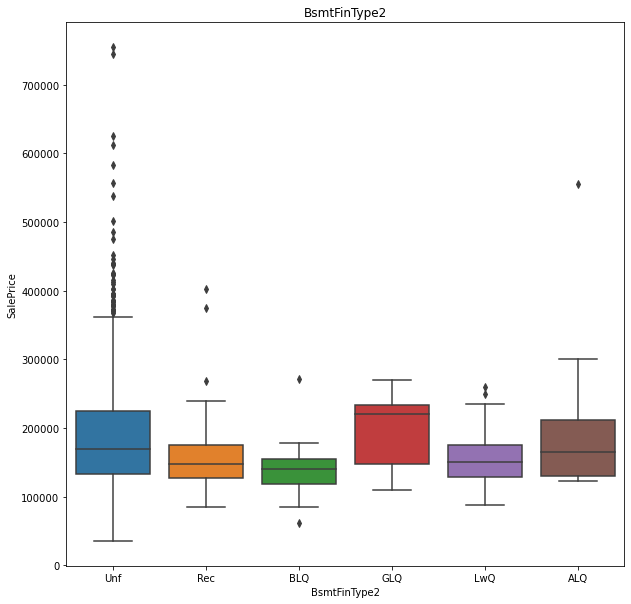

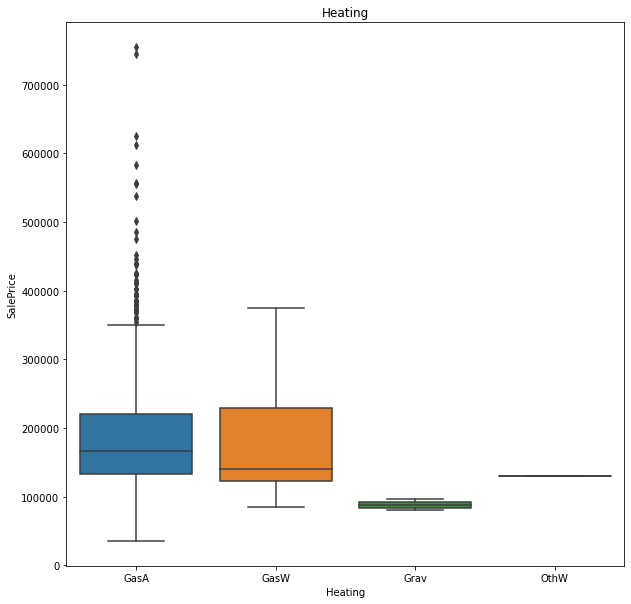

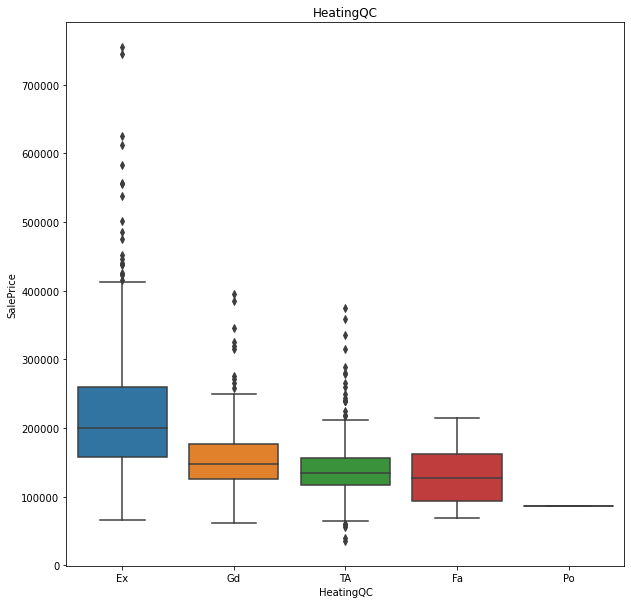

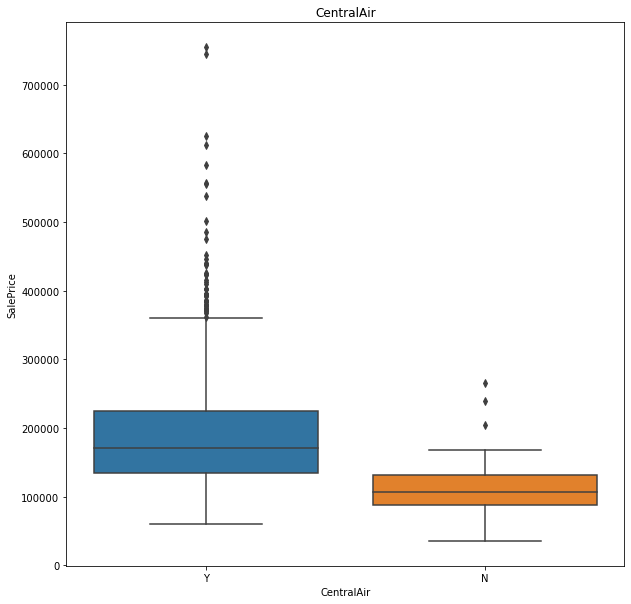

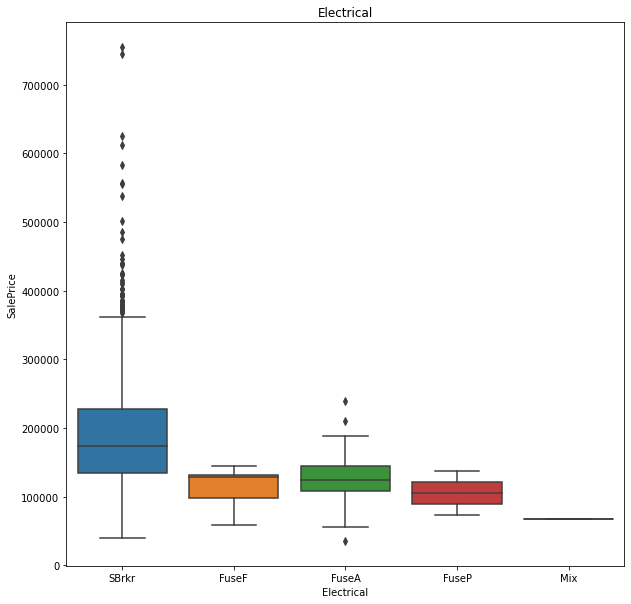

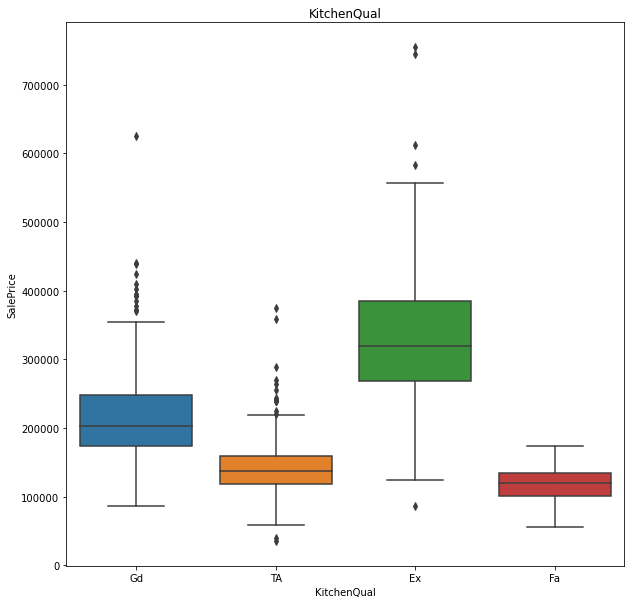

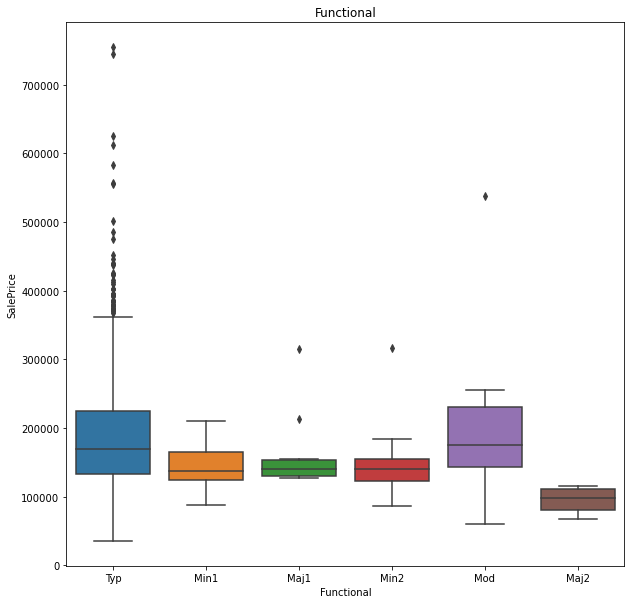

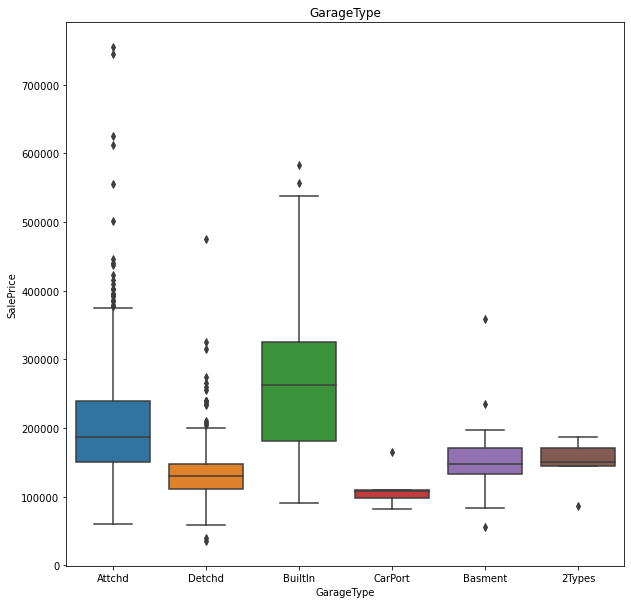

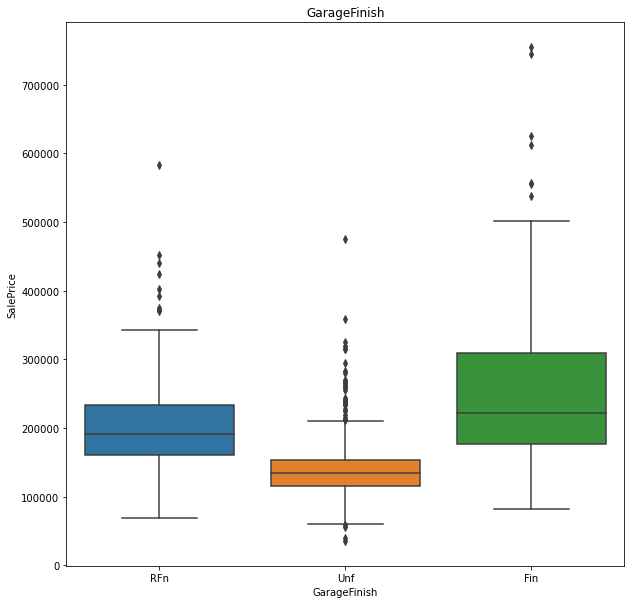

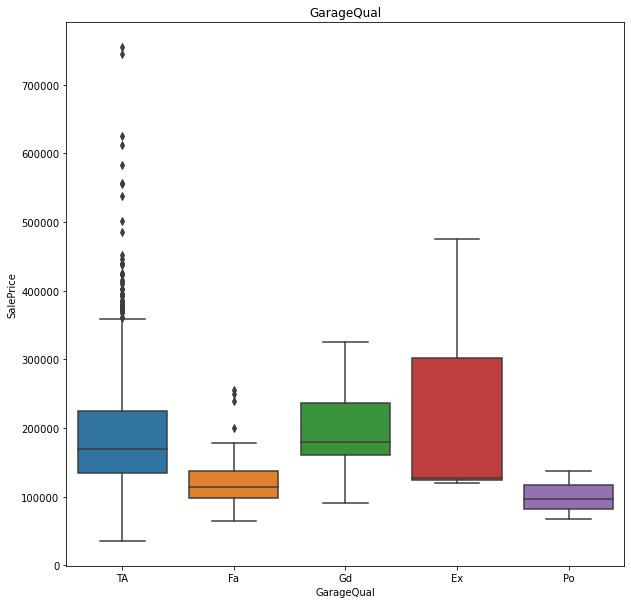

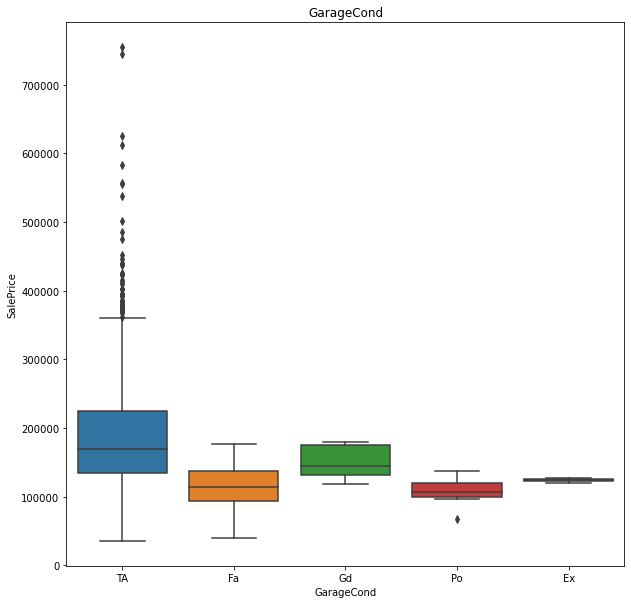

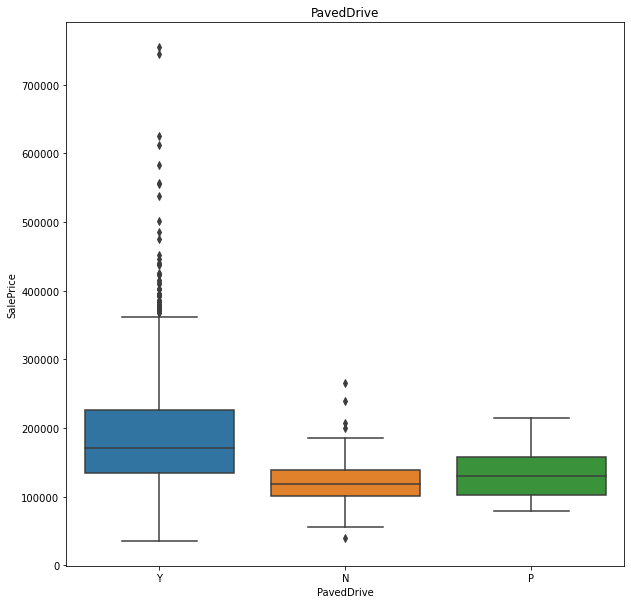

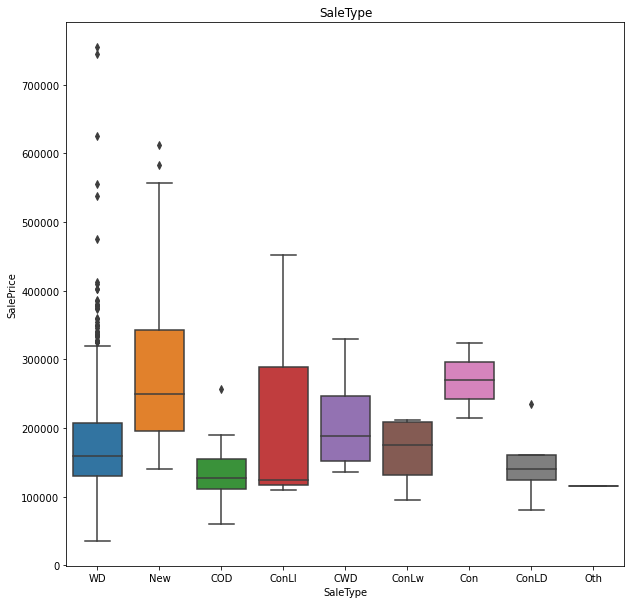

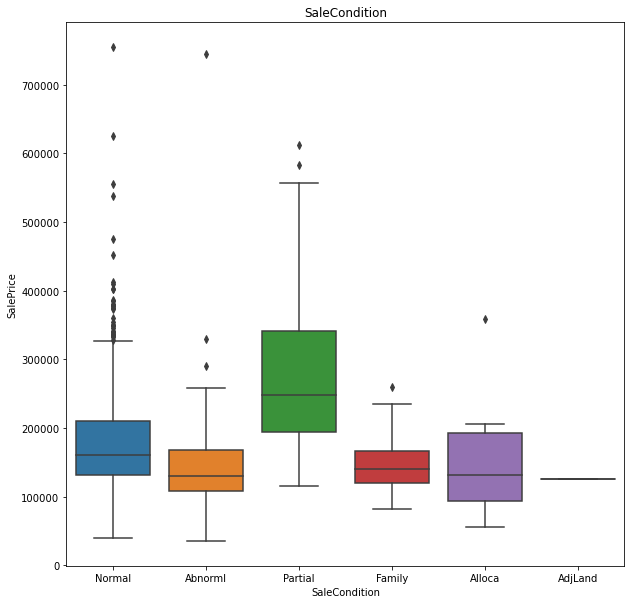

In [24]:

cat_cols = df_train.select_dtypes(include=['object','category']).columns

# create a boxplot for each numerical feature
for col in cat_cols:
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(data=df_train, x=col, y='SalePrice')
    plt.title(col)
    plt.show()


Almost all categoric values seem significant for our model. Allpub Utilities should be dropped cause there is only 1 unique value.

In [25]:
df_train=df_train.drop("Utilities",axis=1)

## MODEL BUILDING

## LINEAR REGRESSION

In [26]:
df_reg=df_train

In [27]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_reg.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_reg[col] = le.fit_transform(df_reg[col])

In [28]:
# check the data types of all the columns
print(df_reg.dtypes)


MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea          float64
Street             int64
LotShape           int64
LandContour        int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating            int64
HeatingQC          int64
CentralAir         int64
Electrical         int64


In [29]:
y=df_reg['SalePrice']
X=df_reg.drop("SalePrice",axis=1)

In [30]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create the linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [32]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid for hyperparameter optimization
param_grid = {'linearregression__fit_intercept':[True,False]}

# Create the pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

# Make predictions on the test set
y_pred_test = grid_search.predict(X_test)
y_pred_train = grid_search.predict(X_train)


Best parameters:  {'linearregression__fit_intercept': True}
Best CV score:  0.7465905036556577


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score, accuracy_score, matthews_corrcoef
# Print evaluation metrics
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R^2: ", r2_score(y_train, y_pred_train))
print("Test R^2: ", r2_score(y_test, y_pred_test))

Train MAE:  18845.99081765078
Test MAE:  19917.970776858314
Train MSE:  944775849.0976094
Test MSE:  851050496.9983296
Train RMSE:  30737.20626695942
Test RMSE:  29172.76978619496
Train R^2:  0.8601723139187334
Test R^2:  0.8868642857609463


In [34]:
# Summary of Train Model 

import statsmodels.api as sm

# Access the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Fit the best estimator to the training data
best_model = best_estimator.fit(X_train, y_train)

# Extract the coefficients
coef = best_model.named_steps['linearregression'].coef_

# Adding a column of ones for the constant term
X_train_const = sm.add_constant(X_train)

# Fit the best model to the training data using statsmodels
statsmodel = sm.OLS(y_train, X_train_const)
result = statsmodel.fit()

# Print the summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     67.50
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          6.00e-293
Time:                        11:08:42   Log-Likelihood:                -10283.
No. Observations:                 875   AIC:                         2.071e+04
Df Residuals:                     801   BIC:                         2.107e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.72e+05   1.79e+06      0.319

In [35]:
# Summary of Test Model 
# Access the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Fit the best estimator to the training data
best_model = best_estimator.fit(X_test, y_test)

# Extract the coefficients
coef = best_model.named_steps['linearregression'].coef_

# Adding a column of ones for the constant term
X_test_const = sm.add_constant(X_test)

# Fit the best model to the training data using statsmodels
statsmodel = sm.OLS(y_test, X_test_const)
result = statsmodel.fit()

# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     47.76
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           3.89e-74
Time:                        11:08:43   Log-Likelihood:                -2448.3
No. Observations:                 219   AIC:                             5045.
Df Residuals:                     145   BIC:                             5295.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.915e+06   2.59e+06      1.124

Our linear regression model have multicollinearity problem. We should solve this.  I will use recursive elimination method to decrease independent variables. 


In [36]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=30)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('MSZoning', True, 1),
 ('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('Street', True, 1),
 ('LotShape', True, 1),
 ('LandContour', True, 1),
 ('LotConfig', False, 3),
 ('LandSlope', True, 1),
 ('Neighborhood', True, 1),
 ('Condition1', False, 3),
 ('Condition2', True, 1),
 ('BldgType', True, 1),
 ('HouseStyle', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 3),
 ('YearRemodAdd', False, 3),
 ('RoofStyle', True, 1),
 ('RoofMatl', True, 1),
 ('Exterior1st', True, 1),
 ('Exterior2nd', False, 3),
 ('MasVnrType', False, 2),
 ('MasVnrArea', False, 3),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1),
 ('Foundation', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinType2', False, 2),
 ('BsmtFinSF2', False, 3),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', False, 3),
 ('Heating', True, 1),
 ('HeatingQC', False, 2),
 ('Cent

In [37]:
#Selected 30 variables column names
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating',
       'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
#Train and test groups due to chosen columns
X_train_rfe = X_train[col_sup]
X_test_rfe=X_test[col_sup]

In [39]:
import statsmodels.api as sm  
X_train_rfe= sm.add_constant(X_train_rfe)
X_test_rfe=sm.add_constant(X_test_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()
#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     97.38
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          1.50e-271
Time:                        11:08:44   Log-Likelihood:                -10424.
No. Observations:                 875   AIC:                         2.092e+04
Df Residuals:                     838   BIC:                         2.110e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.763e+04   3.88e+04     -0.454

Multicollinearity problem seem solved. We should drop high p-values to make our model significant.

In [40]:
#Dropping MSZoning
X_train_rfe=X_train_rfe.drop("MSZoning", axis=1)
X_test_rfe=X_test_rfe.drop("MSZoning", axis=1)
X_train_rfe= sm.add_constant(X_train_rfe)
X_test_rfe= sm.add_constant(X_test_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()
#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          1.58e-272
Time:                        11:08:45   Log-Likelihood:                -10424.
No. Observations:                 875   AIC:                         2.092e+04
Df Residuals:                     839   BIC:                         2.109e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.634e+04   3.86e+04     -0.423

In [41]:
# create a list of column names with p-values above a certain threshold
cols_to_drop = [col for col, val in zip(X_train_rfe.columns, lm_rfe.pvalues) if val > 0.05]

# drop the columns from the dataset
X_train_rfe = X_train_rfe.drop(cols_to_drop, axis=1)

# drop the columns from the dataset
X_test_rfe = X_test_rfe.drop(cols_to_drop, axis=1)

In [42]:
X_train_rfe= sm.add_constant(X_train_rfe)
X_test_rfe= sm.add_constant(X_test_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()
#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          2.32e-282
Time:                        11:08:45   Log-Likelihood:                -10436.
No. Observations:                 875   AIC:                         2.092e+04
Df Residuals:                     853   BIC:                         2.102e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -2.8e+04   3.33e+04     -0.840   

Model seems accurate and our predictors seem significant. So, we can use this regression model to make predictions. 

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score, accuracy_score, matthews_corrcoef
# Make predictions on the training set
y_pred_train = lm_rfe.predict(X_train_rfe)

# Make predictions on the test set
y_pred_test = lm_rfe.predict(X_test_rfe)

# Print evaluation metrics
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R^2: ", r2_score(y_train, y_pred_train))
print("Test R^2: ", r2_score(y_test, y_pred_test))

Train MAE:  24013.27458671901
Test MAE:  25159.417528885242
Train MSE:  1339758868.007207
Test MSE:  1438054911.9154131
Train RMSE:  36602.71667523064
Test RMSE:  37921.694475793316
Train R^2:  0.8017144674059611
Test R^2:  0.8088299458747051


In [44]:
Results = pd.DataFrame(columns=['ModelName', 'MAE', 'MSE', 'RMSE', 'R-sq'])
Results.loc[0] = ['Linear_Regression Test', mean_absolute_error(y_test, y_pred_test), mean_squared_error(y_test, y_pred_test), np.sqrt(mean_squared_error(y_test, y_pred_test)),
                  r2_score(y_test, y_pred_test)]
Results.loc[1] = ['Linear_Regression Train', mean_absolute_error(y_train, y_pred_train), mean_squared_error(y_train, y_pred_train), np.sqrt(mean_squared_error(y_train, y_pred_train)), 
                  r2_score(y_train, y_pred_train)]

In [45]:
Results

ModelName           MAE           MSE          RMSE      R-sq
0   Linear_Regression Test  25159.417529  1.438055e+09  37921.694476  0.808830
1  Linear_Regression Train  24013.274587  1.339759e+09  36602.716675  0.801714

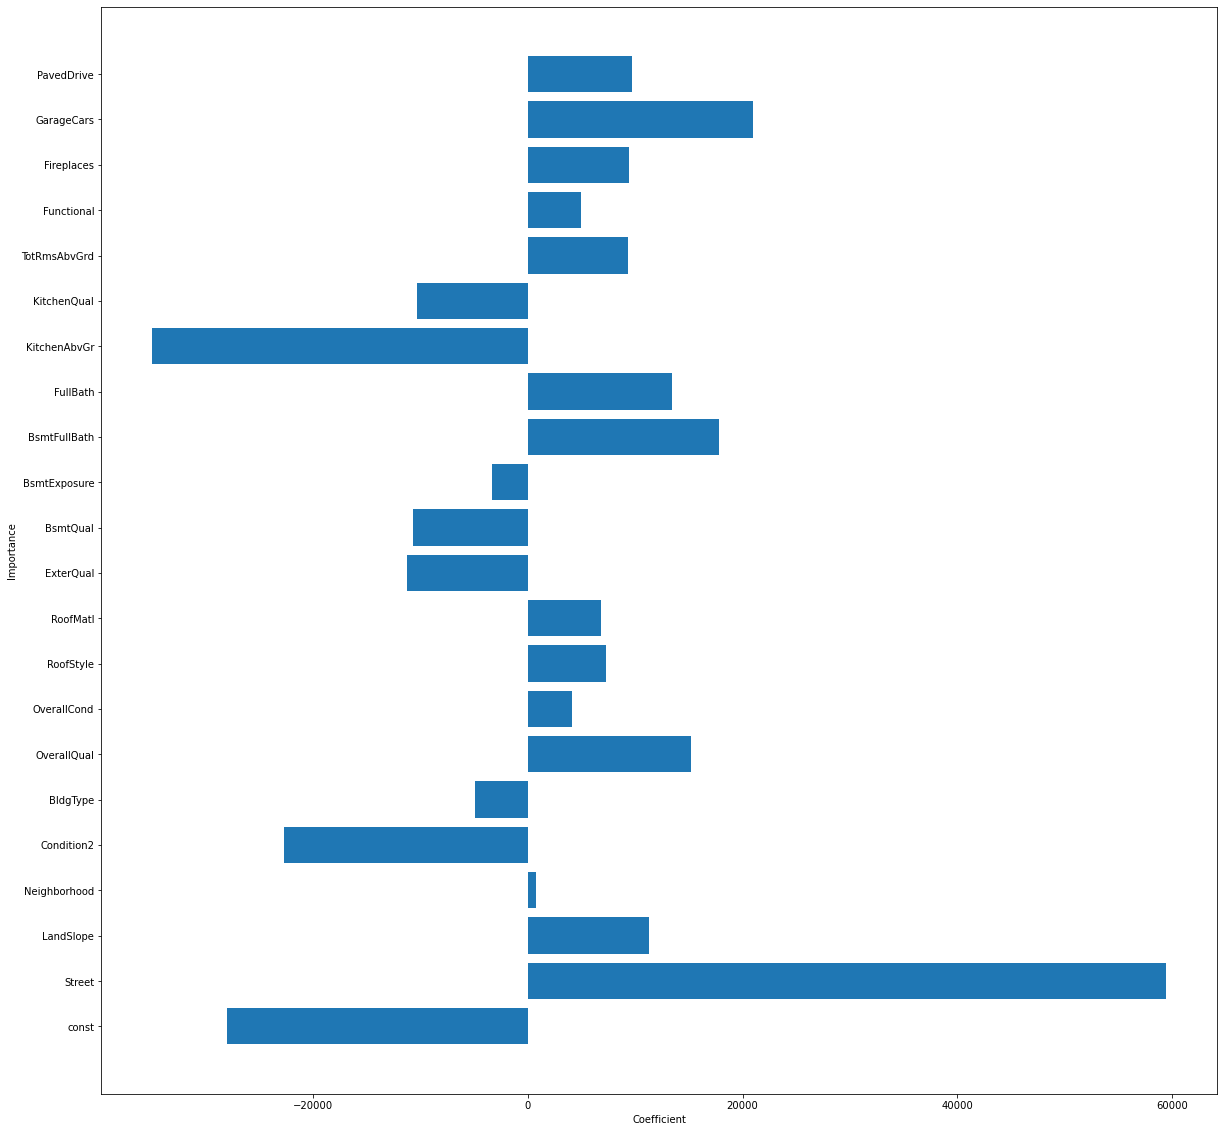

In [46]:

coef_influence = lm_rfe.params
coef_influence.sort_values()

figure(figsize=(20,20))
plt.barh(coef_influence.index, coef_influence)
plt.xlabel("Coefficient")
plt.ylabel("Importance")
plt.show()


Street, KitchenAbvGrd, Condition2 and GarageCars seem important predictors affect SalePrice

## CATBOOST MODEL

In [47]:
df_cat=df_train

In [48]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_cat.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_cat[col] = le.fit_transform(df_cat[col])

In [49]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   int64  
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   float64
 4   Street         1094 non-null   int64  
 5   LotShape       1094 non-null   int64  
 6   LandContour    1094 non-null   int64  
 7   LotConfig      1094 non-null   int64  
 8   LandSlope      1094 non-null   int64  
 9   Neighborhood   1094 non-null   int64  
 10  Condition1     1094 non-null   int64  
 11  Condition2     1094 non-null   int64  
 12  BldgType       1094 non-null   int64  
 13  HouseStyle     1094 non-null   int64  
 14  OverallQual    1094 non-null   int64  
 15  OverallCond    1094 non-null   int64  
 16  YearBuilt      1094 non-null   int64  
 17  YearRemodAdd   1094 non-null   int64  
 18  RoofStyl

In [50]:
from catboost import CatBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [51]:
y=df_cat['SalePrice']
X=df_cat.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# Define the parameter grid for the CatBoost model
param_grid = {'iterations': [1000],
              'depth': [3],
              'learning_rate': [0.01]
             }

fit_params = {
    "early_stopping_rounds": 40, 
    "eval_metric": "RMSE", 
    "eval_set": [(X_test, y_test)],
    "verbose": False,
    "use_best_model": True
}


# Create an instance of the CatBoost model
cat_boost = CatBoostRegressor()

# Perform a grid search with 3-fold cross validation
grid_search = GridSearchCV(estimator=cat_boost, param_grid=param_grid, cv=3, n_jobs=-1, verbose=True)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 86550.2570732	total: 57ms	remaining: 56.9s
1:	learn: 86074.3473882	total: 58.3ms	remaining: 29.1s
2:	learn: 85542.0747990	total: 59.6ms	remaining: 19.8s
3:	learn: 85096.2408644	total: 64.2ms	remaining: 16s
4:	learn: 84583.7840146	total: 65.2ms	remaining: 13s
5:	learn: 84159.9805236	total: 66.3ms	remaining: 11s
6:	learn: 83666.4567488	total: 67.4ms	remaining: 9.56s
7:	learn: 83179.3337388	total: 68.6ms	remaining: 8.5s
8:	learn: 82736.9204296	total: 69.8ms	remaining: 7.68s
9:	learn: 82258.5869311	total: 70.9ms	remaining: 7.02s
10:	learn: 81763.0183126	total: 72.1ms	remaining: 6.49s
11:	learn: 81307.7221846	total: 82.9ms	remaining: 6.82s
12:	learn: 80857.8578683	total: 84.5ms	remaining: 6.41s
13:	learn: 80409.7241315	total: 86ms	remaining: 6.06s
14:	learn: 79969.2210295	total: 96.3ms	remaining: 6.32s
15:	learn: 79559.7893827	total: 97.9ms	remaining: 6.02s
16:	learn: 79132.5941779	total: 99.6ms	remaining: 5.76s
17:	learn:

In [53]:

# Use the best parameters to train a new model
best_cat = CatBoostRegressor(**grid_search.best_params_)
best_cat.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_test = best_cat.predict(X_test)
y_pred_train = best_cat.predict(X_train)

cat_boost=best_cat

0:	learn: 81715.0520196	total: 1.49ms	remaining: 1.49s
1:	learn: 81228.6105173	total: 3.41ms	remaining: 1.7s
2:	learn: 80763.7448606	total: 4.37ms	remaining: 1.45s
3:	learn: 80330.4114381	total: 5.2ms	remaining: 1.29s
4:	learn: 79913.1282682	total: 6.06ms	remaining: 1.21s
5:	learn: 79498.2232148	total: 6.93ms	remaining: 1.15s
6:	learn: 79034.6640161	total: 7.82ms	remaining: 1.11s
7:	learn: 78553.9574527	total: 8.61ms	remaining: 1.07s
8:	learn: 78112.8274629	total: 9.48ms	remaining: 1.04s
9:	learn: 77669.9746247	total: 10.4ms	remaining: 1.02s
10:	learn: 77234.0717465	total: 11.2ms	remaining: 1.01s
11:	learn: 76795.4529219	total: 12.1ms	remaining: 996ms
12:	learn: 76357.0449127	total: 13ms	remaining: 985ms
13:	learn: 75961.7082704	total: 13.8ms	remaining: 972ms
14:	learn: 75534.1856139	total: 14.6ms	remaining: 958ms
15:	learn: 75109.2997361	total: 15.5ms	remaining: 955ms
16:	learn: 74676.7058446	total: 16.5ms	remaining: 954ms
17:	learn: 74276.8771184	total: 17.5ms	remaining: 955ms
18:	le

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score, accuracy_score, matthews_corrcoef


# Print evaluation metrics
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R^2: ", r2_score(y_train, y_pred_train))
print("Test R^2: ", r2_score(y_test, y_pred_test))

Train MAE:  14788.183271826265
Test MAE:  17485.989634935515
Train MSE:  457905831.6847817
Test MSE:  720940012.1674145
Train RMSE:  21398.73434773145
Test RMSE:  26850.326109144644
Train R^2:  0.9322295198921984
Test R^2:  0.9041607243192379


In [55]:
Results.loc[2] = ['Catboost Test', mean_absolute_error(y_test, y_pred_test), mean_squared_error(y_test, y_pred_test), np.sqrt(mean_squared_error(y_test, y_pred_test)),
                  r2_score(y_test, y_pred_test)]
Results.loc[3] = ['Catboost Train', mean_absolute_error(y_train, y_pred_train), mean_squared_error(y_train, y_pred_train), np.sqrt(mean_squared_error(y_train, y_pred_train)), 
                  r2_score(y_train, y_pred_train)]

In [56]:
Results

ModelName           MAE           MSE          RMSE      R-sq
0   Linear_Regression Test  25159.417529  1.438055e+09  37921.694476  0.808830
1  Linear_Regression Train  24013.274587  1.339759e+09  36602.716675  0.801714
2            Catboost Test  17485.989635  7.209400e+08  26850.326109  0.904161
3           Catboost Train  14788.183272  4.579058e+08  21398.734348  0.932230

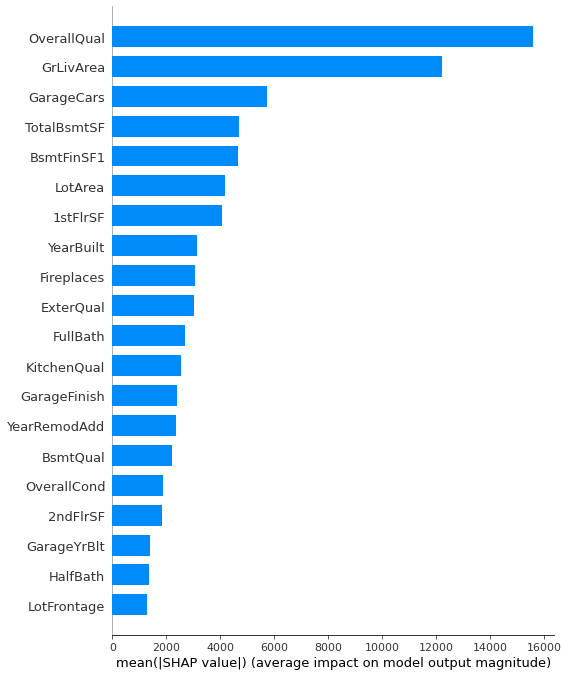

In [57]:
import shap 
explainercat = shap.TreeExplainer(cat_boost)
shap_values_cat_test = explainercat.shap_values(X_test)
shap_values_cat_train = explainercat.shap_values(X_train)

shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar")

GrLivArea,OverallQual,GarageCars seem important predictors

## XGBOOST MODEL

In [58]:
df_xgb=df_train

In [59]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_xgb.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_xgb[col] = le.fit_transform(df_xgb[col])

In [60]:
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   int64  
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   float64
 4   Street         1094 non-null   int64  
 5   LotShape       1094 non-null   int64  
 6   LandContour    1094 non-null   int64  
 7   LotConfig      1094 non-null   int64  
 8   LandSlope      1094 non-null   int64  
 9   Neighborhood   1094 non-null   int64  
 10  Condition1     1094 non-null   int64  
 11  Condition2     1094 non-null   int64  
 12  BldgType       1094 non-null   int64  
 13  HouseStyle     1094 non-null   int64  
 14  OverallQual    1094 non-null   int64  
 15  OverallCond    1094 non-null   int64  
 16  YearBuilt      1094 non-null   int64  
 17  YearRemodAdd   1094 non-null   int64  
 18  RoofStyl

In [61]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [62]:
y=df_xgb['SalePrice']
X=df_xgb.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Create the XGBoost model
xgb_model = xgb.XGBRegressor(
                    random_state=42,
                    n_jobs = -1,
                    early_stopping_rounds=10,
                    eval_metric='rmse')



In [64]:
# Define the parameter grid for tuning
param_grid = {'n_estimators': [50],
              'max_depth': [5],
              'learning_rate': [0.05]}

# Perform the grid search
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train,  eval_set=[(X_test, y_test)],   verbose=True )

# Print the best parameters and score
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

[0]	validation_0-rmse:196884.29453
[1]	validation_0-rmse:187584.31066
[2]	validation_0-rmse:178732.83608
[3]	validation_0-rmse:170428.99307
[4]	validation_0-rmse:162529.00827
[5]	validation_0-rmse:154753.13197
[6]	validation_0-rmse:147670.20600
[7]	validation_0-rmse:140983.23616
[8]	validation_0-rmse:134632.37491
[9]	validation_0-rmse:128455.29133
[10]	validation_0-rmse:122704.83022
[11]	validation_0-rmse:117157.62596
[12]	validation_0-rmse:111906.01000
[13]	validation_0-rmse:107017.70362
[14]	validation_0-rmse:102264.46576
[15]	validation_0-rmse:97880.29354
[16]	validation_0-rmse:93773.97325
[17]	validation_0-rmse:89619.32514
[18]	validation_0-rmse:86037.78281
[19]	validation_0-rmse:82354.03127
[20]	validation_0-rmse:79109.02034
[21]	validation_0-rmse:75864.08289
[22]	validation_0-rmse:72970.71857
[23]	validation_0-rmse:70334.25357
[24]	validation_0-rmse:67811.08081
[25]	validation_0-rmse:65177.79941
[26]	validation_0-rmse:62712.48342
[27]	validation_0-rmse:60510.63457
[28]	validation

In [65]:
# Use the best parameters to make predictions on the test set
xgb_model = xgb.XGBRegressor(n_estimators=xgb_grid.best_params_['n_estimators'],
                             max_depth=xgb_grid.best_params_['max_depth'],
                             learning_rate=xgb_grid.best_params_['learning_rate'])


# Make predictions on the test set using the best model

xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score, accuracy_score, matthews_corrcoef


# Print evaluation metrics
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R^2: ", r2_score(y_train, y_pred_train))
print("Test R^2: ", r2_score(y_test, y_pred_test))

Train MAE:  17587.834808035714
Test MAE:  21651.551976312785
Train MSE:  576645123.1541461
Test MSE:  1003819489.5643737
Train RMSE:  24013.436304580526
Test RMSE:  31683.11047805082
Train R^2:  0.9146559966179227
Test R^2:  0.8665557034282882


In [67]:
Results

ModelName           MAE           MSE          RMSE      R-sq
0   Linear_Regression Test  25159.417529  1.438055e+09  37921.694476  0.808830
1  Linear_Regression Train  24013.274587  1.339759e+09  36602.716675  0.801714
2            Catboost Test  17485.989635  7.209400e+08  26850.326109  0.904161
3           Catboost Train  14788.183272  4.579058e+08  21398.734348  0.932230

In [68]:
Results.loc[4] = ['XGB Test', mean_absolute_error(y_test, y_pred_test), mean_squared_error(y_test, y_pred_test), np.sqrt(mean_squared_error(y_test, y_pred_test)),
                  r2_score(y_test, y_pred_test)]
Results.loc[5] = ['XGB Train', mean_absolute_error(y_train, y_pred_train), mean_squared_error(y_train, y_pred_train), np.sqrt(mean_squared_error(y_train, y_pred_train)), 
                  r2_score(y_train, y_pred_train)]

In [69]:
Results

ModelName           MAE           MSE          RMSE      R-sq
0   Linear_Regression Test  25159.417529  1.438055e+09  37921.694476  0.808830
1  Linear_Regression Train  24013.274587  1.339759e+09  36602.716675  0.801714
2            Catboost Test  17485.989635  7.209400e+08  26850.326109  0.904161
3           Catboost Train  14788.183272  4.579058e+08  21398.734348  0.932230
4                 XGB Test  21651.551976  1.003819e+09  31683.110478  0.866556
5                XGB Train  17587.834808  5.766451e+08  24013.436305  0.914656

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

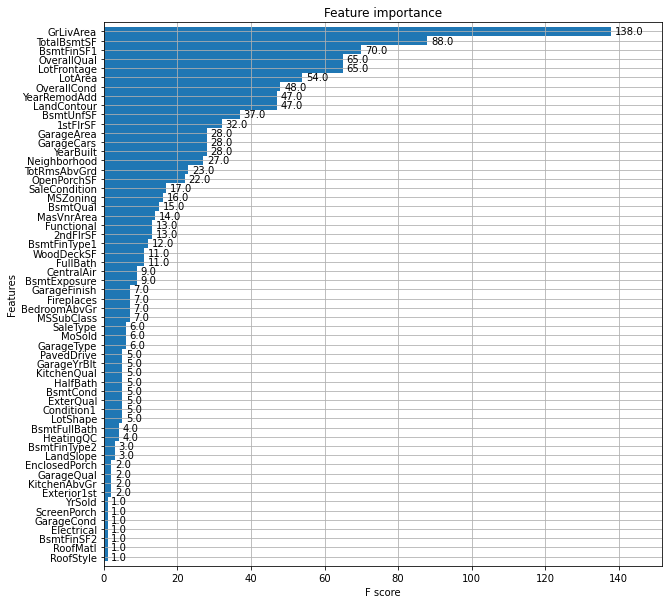

In [70]:
figsize=(10,10)
fig, ax = plt.subplots(1,1,figsize=figsize)
plot_importance(xgb_model, ax=ax,height = 1)

GRLivArea, TotalBsmtSF, BsmtFinSF1 seem important predictors acc to XGBoost model we built

## LightGBM Model

In [71]:
df_lgbm=df_train

In [72]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_lgbm.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_lgbm[col] = le.fit_transform(df_lgbm[col])

In [73]:
df_lgbm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   int64  
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   float64
 4   Street         1094 non-null   int64  
 5   LotShape       1094 non-null   int64  
 6   LandContour    1094 non-null   int64  
 7   LotConfig      1094 non-null   int64  
 8   LandSlope      1094 non-null   int64  
 9   Neighborhood   1094 non-null   int64  
 10  Condition1     1094 non-null   int64  
 11  Condition2     1094 non-null   int64  
 12  BldgType       1094 non-null   int64  
 13  HouseStyle     1094 non-null   int64  
 14  OverallQual    1094 non-null   int64  
 15  OverallCond    1094 non-null   int64  
 16  YearBuilt      1094 non-null   int64  
 17  YearRemodAdd   1094 non-null   int64  
 18  RoofStyl

In [74]:
import lightgbm as lgb

from lightgbm import plot_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [75]:
y=df_lgbm['SalePrice']
X=df_lgbm.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Create the LGBM model
lgbm_model = lgb.LGBMRegressor(
                       objective='regression', 
                       learning_rate=0.01, 
                       #n_estimators=7000,
                       verbose=-1,
                       random_state=42 )




In [77]:
# Define the parameter grid for tuning
param_grid = {'n_estimators': [500,200,200],
              'max_depth': [5,3,3],
              'learning_rate': [0.05,0.05,0.02]}

# Perform the grid search
lgbm_grid = GridSearchCV(lgbm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
lgbm_grid.fit(X_train, y_train,  eval_set=[(X_test, y_test)],early_stopping_rounds=100  )

# Print the best parameters and score
print(lgbm_grid.best_params_)
print(lgbm_grid.best_score_)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 6.98177e+09
[2]	valid_0's l2: 6.45904e+09
[3]	valid_0's l2: 5.98943e+09
[4]	valid_0's l2: 5.58235e+09
[5]	valid_0's l2: 5.22718e+09
[6]	valid_0's l2: 4.88485e+09
[7]	valid_0's l2: 4.58451e+09
[8]	valid_0's l2: 4.29352e+09
[9]	valid_0's l2: 4.02377e+09
[10]	valid_0's l2: 3.80239e+09
[11]	valid_0's l2: 3.58579e+09
[12]	valid_0's l2: 3.40034e+09
[13]	valid_0's l2: 3.22407e+09
[14]	valid_0's l2: 3.04885e+09
[15]	valid_0's l2: 2.90484e+09
[16]	valid_0's l2: 2.75421e+09
[17]	valid_0's l2: 2.63533e+09
[18]	valid_0's l2: 2.53286e+09
[19]	valid_0's l2: 2.42846e+09
[20]	valid_0's l2: 2.33133e+09
[21]	valid_0's l2: 2.2366e+09
[22]	valid_0's l2: 2.15661e+09
[23]	valid_0's l2: 2.06929e+09
[24]	valid_0's l2: 1.99344e+09
[25]	valid_0's l2: 1.93081e+09
[26]	valid_0's l2: 1.86406e+09
[27]	valid_0's l2: 1.80924e+09
[28]	valid_0's l2: 1.76169e+09
[29]	valid_0's l2: 1.71309e+09
[30]	valid_0's l2: 1.66019e+09
[31]	valid_0's l2: 1.63244e+09
[32]	valid_0's l2: 1.59699e+09
[33]	valid_0's l2:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[12]	valid_0's l2: 3.45869e+09
[13]	valid_0's l2: 3.29292e+09
[14]	valid_0's l2: 3.11625e+09
[15]	valid_0's l2: 2.97982e+09
[16]	valid_0's l2: 2.83096e+09
[17]	valid_0's l2: 2.71062e+09
[18]	valid_0's l2: 2.58815e+09
[19]	valid_0's l2: 2.49192e+09
[20]	valid_0's l2: 2.39248e+09
[21]	valid_0's l2: 2.2785e+09
[22]	valid_0's l2: 2.1962e+09
[23]	valid_0's l2: 2.12238e+09
[24]	valid_0's l2: 2.03287e+09
[25]	valid_0's l2: 1.9641e+09
[26]	valid_0's l2: 1.89719e+09
[27]	valid_0's l2: 1.82314e+09
[28]	valid_0's l2: 1.76886e+09
[29]	valid_0's l2: 1.71602e+09
[30]	valid_0's l2: 1.66688e+09
[31]	valid_0's l2: 1.62206e+09
[32]	valid_0's l2: 1.58148e+09
[33]	valid_0's l2: 1.54076e+09
[34]	valid_0's l2: 1.50335e+09
[35]	valid_0's l2: 1.48075e+09
[36]	valid_0's l2: 1.45767e+09
[37]	valid_0's l2: 1.4354e+09
[38]	valid_0's l2: 1.39271e+09
[39]	valid_0's l2: 1.37177e+09
[40]	valid_0's l2: 1.35853e+09
[41]	valid_0's l2: 1.33784e+09
[42]	valid_0's l2: 1.31191e+09
[43]	valid_0's l2: 1.2889e+09
[44]	valid_0'

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[183]	valid_0's l2: 7.58837e+08
[184]	valid_0's l2: 7.58136e+08
[185]	valid_0's l2: 7.5636e+08
[186]	valid_0's l2: 7.54853e+08
[187]	valid_0's l2: 7.53886e+08
[188]	valid_0's l2: 7.52204e+08
[189]	valid_0's l2: 7.51661e+08
[190]	valid_0's l2: 7.50579e+08
[191]	valid_0's l2: 7.49457e+08
[192]	valid_0's l2: 7.4873e+08
[193]	valid_0's l2: 7.47908e+08
[194]	valid_0's l2: 7.46506e+08
[195]	valid_0's l2: 7.45189e+08
[196]	valid_0's l2: 7.43721e+08
[197]	valid_0's l2: 7.41789e+08
[198]	valid_0's l2: 7.4063e+08
[199]	valid_0's l2: 7.39117e+08
[200]	valid_0's l2: 7.38301e+08
[201]	valid_0's l2: 7.37514e+08
[202]	valid_0's l2: 7.36382e+08
[203]	valid_0's l2: 7.35388e+08
[204]	valid_0's l2: 7.33532e+08
[205]	valid_0's l2: 7.32346e+08
[206]	valid_0's l2: 7.31747e+08
[207]	valid_0's l2: 7.31447e+08
[208]	valid_0's l2: 7.30098e+08
[209]	valid_0's l2: 7.2913e+08
[210]	valid_0's l2: 7.2751e+08
[211]	valid_0's l2: 7.27334e+08
[212]	valid_0's l2: 7.26282e+08
[213]	valid_0's l2: 7.24807e+08
[214]	valid_0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.0155e+09
[2]	valid_0's l2: 6.55165e+09
[3]	valid_0's l2: 6.09949e+09
[4]	valid_0's l2: 5.69329e+09
[5]	valid_0's l2: 5.32526e+09
[6]	valid_0's l2: 4.99109e+09
[7]	valid_0's l2: 4.70418e+09
[8]	valid_0's l2: 4.42476e+09
[9]	valid_0's l2: 4.17021e+09
[10]	valid_0's l2: 3.93718e+09
[11]	valid_0's l2: 3.7353e+09
[12]	valid_0's l2: 3.54295e+09
[13]	valid_0's l2: 3.36537e+09
[14]	valid_0's l2: 3.19169e+09
[15]	valid_0's l2: 3.04711e+09
[16]	valid_0's l2: 2.91472e+09
[17]	valid_0's l2: 2.78866e+09
[18]	valid_0's l2: 2.67351e+09
[19]	valid_0's l2: 2.58075e+09
[20]	valid_0's l2: 2.4781e+09
[21]	valid_0's l2: 2.39022e+09
[22]	valid_0's l2: 2.31833e+09
[23]	valid_0's l2: 2.24301e+09
[24]	valid_0's l2: 2.17528e+09
[25]	valid_0's l2: 2.1135e+09
[26]	valid_0's l2: 2.05873e+09
[27]	valid_0's l2: 2.0102e+09
[28]	valid_0's l2: 1.95981e+09
[29]	valid_0's l2: 1.91071e+09
[30]	valid_0's l2: 1.8538e+09
[31]	valid_0's l2: 1.81165e+09
[32]	valid_0's l2: 1.76302e+09
[33]	valid_0's l2: 1.72

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 6.93476e+09
[2]	valid_0's l2: 6.40116e+09
[3]	valid_0's l2: 5.98871e+09
[4]	valid_0's l2: 5.53836e+09
[5]	valid_0's l2: 5.18203e+09
[6]	valid_0's l2: 4.87768e+09
[7]	valid_0's l2: 4.56808e+09
[8]	valid_0's l2: 4.28843e+09
[9]	valid_0's l2: 4.0278e+09
[10]	valid_0's l2: 3.80042e+09
[11]	valid_0's l2: 3.59044e+09
[12]	valid_0's l2: 3.37819e+09
[13]	valid_0's l2: 3.20621e+09
[14]	valid_0's l2: 3.03935e+09
[15]	valid_0's l2: 2.88423e+09
[16]	valid_0's l2: 2.74469e+09
[17]	valid_0's l2: 2.61823e+09
[18]	valid_0's l2: 2.51708e+09
[19]	valid_0's l2: 2.39901e+09
[20]	valid_0's l2: 2.29916e+09
[21]	valid_0's l2: 2.20767e+09
[22]	valid_0's l2: 2.122e+09
[23]	valid_0's l2: 2.04155e+09
[24]	valid_0's l2: 1.96781e+09
[25]	valid_0's l2: 1.9084e+09
[26]	valid_0's l2: 1.84684e+09
[27]	valid_0's l2: 1.78146e+09
[28]	valid_0's l2: 1.72688e+09
[29]	valid_0's l2: 1.68175e+09
[30]	valid_0's l2: 1.63408e+09
[31]	valid_0's l2: 1.59084e+09
[32]	valid_0's l2: 1.5546e+09
[33]	valid_0's l2: 1.5

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[2]	valid_0's l2: 6.49469e+09
[3]	valid_0's l2: 6.05002e+09
[4]	valid_0's l2: 5.62644e+09
[5]	valid_0's l2: 5.25353e+09
[6]	valid_0's l2: 4.90836e+09
[7]	valid_0's l2: 4.611e+09
[8]	valid_0's l2: 4.33792e+09
[9]	valid_0's l2: 4.08638e+09
[10]	valid_0's l2: 3.85938e+09
[11]	valid_0's l2: 3.6624e+09
[12]	valid_0's l2: 3.45869e+09
[13]	valid_0's l2: 3.29292e+09
[14]	valid_0's l2: 3.11625e+09
[15]	valid_0's l2: 2.97982e+09
[16]	valid_0's l2: 2.83096e+09
[17]	valid_0's l2: 2.71062e+09
[18]	valid_0's l2: 2.58815e+09
[19]	valid_0's l2: 2.49192e+09
[20]	valid_0's l2: 2.39248e+09
[21]	valid_0's l2: 2.2785e+09
[22]	valid_0's l2: 2.1962e+09
[23]	valid_0's l2: 2.12238e+09
[24]	valid_0's l2: 2.03287e+09
[25]	valid_0's l2: 1.9641e+09
[26]	valid_0's l2: 1.89719e+09
[27]	valid_0's l2: 1.82314e+09
[28]	valid_0's l2: 1.76886e+09
[29]	valid_0's l2: 1.71602e+09
[30]	valid_0's l2: 1.66688e+09
[31]	valid_0's l2: 1.62206e+09
[32]	valid_0's l2: 1.58148e+09
[33]	valid_0's l2: 1.54076e+09
[34]	valid_0's l2: 1.5

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[85]	valid_0's l2: 9.45567e+08
[86]	valid_0's l2: 9.39764e+08
[87]	valid_0's l2: 9.36533e+08
[88]	valid_0's l2: 9.33733e+08
[89]	valid_0's l2: 9.2826e+08
[90]	valid_0's l2: 9.26872e+08
[91]	valid_0's l2: 9.19864e+08
[92]	valid_0's l2: 9.14151e+08
[93]	valid_0's l2: 9.13167e+08
[94]	valid_0's l2: 9.10049e+08
[95]	valid_0's l2: 9.05194e+08
[96]	valid_0's l2: 9.0439e+08
[97]	valid_0's l2: 8.98226e+08
[98]	valid_0's l2: 8.95717e+08
[99]	valid_0's l2: 8.94352e+08
[100]	valid_0's l2: 8.90708e+08
[101]	valid_0's l2: 8.88048e+08
[102]	valid_0's l2: 8.86714e+08
[103]	valid_0's l2: 8.84499e+08
[104]	valid_0's l2: 8.8223e+08
[105]	valid_0's l2: 8.77649e+08
[106]	valid_0's l2: 8.76112e+08
[107]	valid_0's l2: 8.72743e+08
[108]	valid_0's l2: 8.70481e+08
[109]	valid_0's l2: 8.6946e+08
[110]	valid_0's l2: 8.65392e+08
[111]	valid_0's l2: 8.64503e+08
[112]	valid_0's l2: 8.61785e+08
[113]	valid_0's l2: 8.59872e+08
[114]	valid_0's l2: 8.544e+08
[115]	valid_0's l2: 8.52847e+08
[116]	valid_0's l2: 8.51515e+

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[19]	valid_0's l2: 2.42846e+09
[20]	valid_0's l2: 2.33133e+09
[21]	valid_0's l2: 2.2366e+09
[22]	valid_0's l2: 2.15661e+09
[23]	valid_0's l2: 2.06929e+09
[24]	valid_0's l2: 1.99344e+09
[25]	valid_0's l2: 1.93081e+09
[26]	valid_0's l2: 1.86406e+09
[27]	valid_0's l2: 1.80924e+09
[28]	valid_0's l2: 1.76169e+09
[29]	valid_0's l2: 1.71309e+09
[30]	valid_0's l2: 1.66019e+09
[31]	valid_0's l2: 1.63244e+09
[32]	valid_0's l2: 1.59699e+09
[33]	valid_0's l2: 1.56861e+09
[34]	valid_0's l2: 1.53037e+09
[35]	valid_0's l2: 1.49489e+09
[36]	valid_0's l2: 1.46103e+09
[37]	valid_0's l2: 1.43123e+09
[38]	valid_0's l2: 1.41529e+09
[39]	valid_0's l2: 1.37935e+09
[40]	valid_0's l2: 1.347e+09
[41]	valid_0's l2: 1.32486e+09
[42]	valid_0's l2: 1.31057e+09
[43]	valid_0's l2: 1.28326e+09
[44]	valid_0's l2: 1.25878e+09
[45]	valid_0's l2: 1.24305e+09
[46]	valid_0's l2: 1.23516e+09
[47]	valid_0's l2: 1.21588e+09
[48]	valid_0's l2: 1.19688e+09
[49]	valid_0's l2: 1.1897e+09
[50]	valid_0's l2: 1.17702e+09
[51]	valid_0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[103]	valid_0's l2: 8.71948e+08
[104]	valid_0's l2: 8.72088e+08
[105]	valid_0's l2: 8.71812e+08
[106]	valid_0's l2: 8.68333e+08
[107]	valid_0's l2: 8.65326e+08
[108]	valid_0's l2: 8.61659e+08
[109]	valid_0's l2: 8.61465e+08
[110]	valid_0's l2: 8.57741e+08
[111]	valid_0's l2: 8.53691e+08
[112]	valid_0's l2: 8.53708e+08
[113]	valid_0's l2: 8.50329e+08
[114]	valid_0's l2: 8.47574e+08
[115]	valid_0's l2: 8.46821e+08
[116]	valid_0's l2: 8.45392e+08
[117]	valid_0's l2: 8.43147e+08
[118]	valid_0's l2: 8.42829e+08
[119]	valid_0's l2: 8.40627e+08
[120]	valid_0's l2: 8.39839e+08
[121]	valid_0's l2: 8.39037e+08
[122]	valid_0's l2: 8.40018e+08
[123]	valid_0's l2: 8.3796e+08
[124]	valid_0's l2: 8.36073e+08
[125]	valid_0's l2: 8.35141e+08
[126]	valid_0's l2: 8.36131e+08
[127]	valid_0's l2: 8.32851e+08
[128]	valid_0's l2: 8.33128e+08
[129]	valid_0's l2: 8.3279e+08
[130]	valid_0's l2: 8.32873e+08
[131]	valid_0's l2: 8.31573e+08
[132]	valid_0's l2: 8.2942e+08
[133]	valid_0's l2: 8.29829e+08
[134]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.0155e+09
[2]	valid_0's l2: 6.55165e+09
[3]	valid_0's l2: 6.09949e+09
[4]	valid_0's l2: 5.69329e+09
[5]	valid_0's l2: 5.32526e+09
[6]	valid_0's l2: 4.99109e+09
[7]	valid_0's l2: 4.70418e+09
[8]	valid_0's l2: 4.42476e+09
[9]	valid_0's l2: 4.17021e+09
[10]	valid_0's l2: 3.93718e+09
[11]	valid_0's l2: 3.7353e+09
[12]	valid_0's l2: 3.54295e+09
[13]	valid_0's l2: 3.36537e+09
[14]	valid_0's l2: 3.19169e+09
[15]	valid_0's l2: 3.04711e+09
[16]	valid_0's l2: 2.91472e+09
[17]	valid_0's l2: 2.78866e+09
[18]	valid_0's l2: 2.67351e+09
[19]	valid_0's l2: 2.58075e+09
[20]	valid_0's l2: 2.4781e+09
[21]	valid_0's l2: 2.39022e+09
[22]	valid_0's l2: 2.31833e+09
[23]	valid_0's l2: 2.24301e+09
[24]	valid_0's l2: 2.17528e+09
[25]	valid_0's l2: 2.1135e+09
[26]	valid_0's l2: 2.05873e+09
[27]	valid_0's l2: 2.0102e+09
[28]	valid_0's l2: 1.95981e+09
[29]	valid_0's l2: 1.91071e+09
[30]	valid_0's l2: 1.8538e+09
[31]	valid_0's l2: 1.81165e+09
[32]	valid_0's l2: 1.76302e+09
[33]	valid_0's l2: 1.72

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04072e+09
[2]	valid_0's l2: 6.55033e+09
[3]	valid_0's l2: 6.14577e+09
[4]	valid_0's l2: 5.75046e+09
[5]	valid_0's l2: 5.41109e+09
[6]	valid_0's l2: 5.10589e+09
[7]	valid_0's l2: 4.7979e+09
[8]	valid_0's l2: 4.54347e+09
[9]	valid_0's l2: 4.31597e+09
[10]	valid_0's l2: 4.06045e+09
[11]	valid_0's l2: 3.85582e+09
[12]	valid_0's l2: 3.65041e+09
[13]	valid_0's l2: 3.49205e+09
[14]	valid_0's l2: 3.29571e+09
[15]	valid_0's l2: 3.14576e+09
[16]	valid_0's l2: 3.0071e+09
[17]	valid_0's l2: 2.87503e+09
[18]	valid_0's l2: 2.78091e+09
[19]	valid_0's l2: 2.67433e+09
[20]	valid_0's l2: 2.55127e+09
[21]	valid_0's l2: 2.46899e+09
[22]	valid_0's l2: 2.37671e+09
[23]	valid_0's l2: 2.29456e+09
[24]	valid_0's l2: 2.22139e+09
[25]	valid_0's l2: 2.13891e+09
[26]	valid_0's l2: 2.07067e+09
[27]	valid_0's l2: 1.99809e+09
[28]	valid_0's l2: 1.92989e+09
[29]	valid_0's l2: 1.87076e+09
[30]	valid_0's l2: 1.80191e+09
[31]	valid_0's l2: 1.74481e+09
[32]	valid_0's l2: 1.69577e+09
[33]	valid_0's l2: 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[30]	valid_0's l2: 1.9213e+09
[31]	valid_0's l2: 1.86502e+09
[32]	valid_0's l2: 1.81252e+09
[33]	valid_0's l2: 1.76888e+09
[34]	valid_0's l2: 1.7273e+09
[35]	valid_0's l2: 1.69197e+09
[36]	valid_0's l2: 1.65382e+09
[37]	valid_0's l2: 1.62306e+09
[38]	valid_0's l2: 1.58458e+09
[39]	valid_0's l2: 1.55237e+09
[40]	valid_0's l2: 1.52506e+09
[41]	valid_0's l2: 1.49545e+09
[42]	valid_0's l2: 1.47055e+09
[43]	valid_0's l2: 1.44312e+09
[44]	valid_0's l2: 1.41802e+09
[45]	valid_0's l2: 1.39715e+09
[46]	valid_0's l2: 1.37479e+09
[47]	valid_0's l2: 1.35284e+09
[48]	valid_0's l2: 1.32982e+09
[49]	valid_0's l2: 1.31066e+09
[50]	valid_0's l2: 1.28792e+09
[51]	valid_0's l2: 1.26694e+09
[52]	valid_0's l2: 1.25205e+09
[53]	valid_0's l2: 1.24035e+09
[54]	valid_0's l2: 1.22241e+09
[55]	valid_0's l2: 1.20518e+09
[56]	valid_0's l2: 1.19605e+09
[57]	valid_0's l2: 1.18377e+09
[58]	valid_0's l2: 1.16694e+09
[59]	valid_0's l2: 1.15339e+09
[60]	valid_0's l2: 1.14291e+09
[61]	valid_0's l2: 1.13086e+09
[62]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04703e+09
[2]	valid_0's l2: 6.61527e+09
[3]	valid_0's l2: 6.19181e+09
[4]	valid_0's l2: 5.81222e+09
[5]	valid_0's l2: 5.46916e+09
[6]	valid_0's l2: 5.15777e+09
[7]	valid_0's l2: 4.86629e+09
[8]	valid_0's l2: 4.57086e+09
[9]	valid_0's l2: 4.33314e+09
[10]	valid_0's l2: 4.11561e+09
[11]	valid_0's l2: 3.9225e+09
[12]	valid_0's l2: 3.74579e+09
[13]	valid_0's l2: 3.56998e+09
[14]	valid_0's l2: 3.41619e+09
[15]	valid_0's l2: 3.26916e+09
[16]	valid_0's l2: 3.13208e+09
[17]	valid_0's l2: 3.00466e+09
[18]	valid_0's l2: 2.89843e+09
[19]	valid_0's l2: 2.7837e+09
[20]	valid_0's l2: 2.68665e+09
[21]	valid_0's l2: 2.59982e+09
[22]	valid_0's l2: 2.509e+09
[23]	valid_0's l2: 2.41723e+09
[24]	valid_0's l2: 2.35712e+09
[25]	valid_0's l2: 2.27792e+09
[26]	valid_0's l2: 2.20416e+09
[27]	valid_0's l2: 2.14241e+09
[28]	valid_0's l2: 2.07939e+09
[29]	valid_0's l2: 2.0132e+09
[30]	valid_0's l2: 1.95505e+09
[31]	valid_0's l2: 1.90956e+09
[32]	valid_0's l2: 1.86077e+09
[33]	valid_0's l2: 1.8

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04072e+09
[2]	valid_0's l2: 6.55033e+09
[3]	valid_0's l2: 6.14577e+09
[4]	valid_0's l2: 5.75046e+09
[5]	valid_0's l2: 5.41109e+09
[6]	valid_0's l2: 5.10589e+09
[7]	valid_0's l2: 4.7979e+09
[8]	valid_0's l2: 4.54347e+09
[9]	valid_0's l2: 4.31597e+09
[10]	valid_0's l2: 4.06045e+09
[11]	valid_0's l2: 3.85582e+09
[12]	valid_0's l2: 3.65041e+09
[13]	valid_0's l2: 3.49205e+09
[14]	valid_0's l2: 3.29571e+09
[15]	valid_0's l2: 3.14576e+09
[16]	valid_0's l2: 3.0071e+09
[17]	valid_0's l2: 2.87503e+09
[18]	valid_0's l2: 2.78091e+09
[19]	valid_0's l2: 2.67433e+09
[20]	valid_0's l2: 2.55127e+09
[21]	valid_0's l2: 2.46899e+09
[22]	valid_0's l2: 2.37671e+09
[23]	valid_0's l2: 2.29456e+09
[24]	valid_0's l2: 2.22139e+09
[25]	valid_0's l2: 2.13891e+09
[26]	valid_0's l2: 2.07067e+09
[27]	valid_0's l2: 1.99809e+09
[28]	valid_0's l2: 1.92989e+09
[29]	valid_0's l2: 1.87076e+09
[30]	valid_0's l2: 1.80191e+09
[31]	valid_0's l2: 1.74481e+09
[32]	valid_0's l2: 1.69577e+09
[33]	valid_0's l2: 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04703e+09
[2]	valid_0's l2: 6.61527e+09
[3]	valid_0's l2: 6.19181e+09
[4]	valid_0's l2: 5.81222e+09
[5]	valid_0's l2: 5.46916e+09
[6]	valid_0's l2: 5.15777e+09
[7]	valid_0's l2: 4.86629e+09
[8]	valid_0's l2: 4.57086e+09
[9]	valid_0's l2: 4.33314e+09
[10]	valid_0's l2: 4.11561e+09
[11]	valid_0's l2: 3.9225e+09
[12]	valid_0's l2: 3.74579e+09
[13]	valid_0's l2: 3.56998e+09
[14]	valid_0's l2: 3.41619e+09
[15]	valid_0's l2: 3.26916e+09
[16]	valid_0's l2: 3.13208e+09
[17]	valid_0's l2: 3.00466e+09
[18]	valid_0's l2: 2.89843e+09
[19]	valid_0's l2: 2.7837e+09
[20]	valid_0's l2: 2.68665e+09
[21]	valid_0's l2: 2.59982e+09
[22]	valid_0's l2: 2.509e+09
[23]	valid_0's l2: 2.41723e+09
[24]	valid_0's l2: 2.35712e+09
[25]	valid_0's l2: 2.27792e+09
[26]	valid_0's l2: 2.20416e+09
[27]	valid_0's l2: 2.14241e+09
[28]	valid_0's l2: 2.07939e+09
[29]	valid_0's l2: 2.0132e+09
[30]	valid_0's l2: 1.95505e+09
[31]	valid_0's l2: 1.90956e+09
[32]	valid_0's l2: 1.86077e+09
[33]	valid_0's l2: 1.8

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.00935e+09
[2]	valid_0's l2: 6.50781e+09
[3]	valid_0's l2: 6.09199e+09
[4]	valid_0's l2: 5.7144e+09
[5]	valid_0's l2: 5.37671e+09
[6]	valid_0's l2: 5.03428e+09
[7]	valid_0's l2: 4.7443e+09
[8]	valid_0's l2: 4.48136e+09
[9]	valid_0's l2: 4.23636e+09
[10]	valid_0's l2: 4.01461e+09
[11]	valid_0's l2: 3.81769e+09
[12]	valid_0's l2: 3.63392e+09
[13]	valid_0's l2: 3.45678e+09
[14]	valid_0's l2: 3.27877e+09
[15]	valid_0's l2: 3.13114e+09
[16]	valid_0's l2: 2.99438e+09
[17]	valid_0's l2: 2.86074e+09
[18]	valid_0's l2: 2.75001e+09
[19]	valid_0's l2: 2.64937e+09
[20]	valid_0's l2: 2.55515e+09
[21]	valid_0's l2: 2.45898e+09
[22]	valid_0's l2: 2.37499e+09
[23]	valid_0's l2: 2.29015e+09
[24]	valid_0's l2: 2.22251e+09
[25]	valid_0's l2: 2.15927e+09
[26]	valid_0's l2: 2.09295e+09
[27]	valid_0's l2: 2.03081e+09
[28]	valid_0's l2: 1.98416e+09
[29]	valid_0's l2: 1.9443e+09
[30]	valid_0's l2: 1.88139e+09
[31]	valid_0's l2: 1.84584e+09
[32]	valid_0's l2: 1.79844e+09
[33]	valid_0's l2: 1

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.02613e+09
[2]	valid_0's l2: 6.59901e+09
[3]	valid_0's l2: 6.19489e+09
[4]	valid_0's l2: 5.7908e+09
[5]	valid_0's l2: 5.47103e+09
[6]	valid_0's l2: 5.16586e+09
[7]	valid_0's l2: 4.8823e+09
[8]	valid_0's l2: 4.61896e+09
[9]	valid_0's l2: 4.38984e+09
[10]	valid_0's l2: 4.15718e+09
[11]	valid_0's l2: 3.95941e+09
[12]	valid_0's l2: 3.77029e+09
[13]	valid_0's l2: 3.59846e+09
[14]	valid_0's l2: 3.44355e+09
[15]	valid_0's l2: 3.2912e+09
[16]	valid_0's l2: 3.1538e+09
[17]	valid_0's l2: 3.01805e+09
[18]	valid_0's l2: 2.8864e+09
[19]	valid_0's l2: 2.77413e+09
[20]	valid_0's l2: 2.66328e+09
[21]	valid_0's l2: 2.58049e+09
[22]	valid_0's l2: 2.48646e+09
[23]	valid_0's l2: 2.4029e+09
[24]	valid_0's l2: 2.31447e+09
[25]	valid_0's l2: 2.2532e+09
[26]	valid_0's l2: 2.182e+09
[27]	valid_0's l2: 2.09363e+09
[28]	valid_0's l2: 2.02165e+09
[29]	valid_0's l2: 1.97971e+09
[30]	valid_0's l2: 1.9213e+09
[31]	valid_0's l2: 1.86502e+09
[32]	valid_0's l2: 1.81252e+09
[33]	valid_0's l2: 1.76888e

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 6.95794e+09
[2]	valid_0's l2: 6.44749e+09
[3]	valid_0's l2: 6.06019e+09
[4]	valid_0's l2: 5.71432e+09
[5]	valid_0's l2: 5.34065e+09
[6]	valid_0's l2: 5.01734e+09
[7]	valid_0's l2: 4.70574e+09
[8]	valid_0's l2: 4.44871e+09
[9]	valid_0's l2: 4.20922e+09
[10]	valid_0's l2: 3.97719e+09
[11]	valid_0's l2: 3.75025e+09
[12]	valid_0's l2: 3.57735e+09
[13]	valid_0's l2: 3.40736e+09
[14]	valid_0's l2: 3.23585e+09
[15]	valid_0's l2: 3.0715e+09
[16]	valid_0's l2: 2.92902e+09
[17]	valid_0's l2: 2.8023e+09
[18]	valid_0's l2: 2.68498e+09
[19]	valid_0's l2: 2.57884e+09
[20]	valid_0's l2: 2.48627e+09
[21]	valid_0's l2: 2.39574e+09
[22]	valid_0's l2: 2.30843e+09
[23]	valid_0's l2: 2.22815e+09
[24]	valid_0's l2: 2.1555e+09
[25]	valid_0's l2: 2.09003e+09
[26]	valid_0's l2: 2.02771e+09
[27]	valid_0's l2: 1.96157e+09
[28]	valid_0's l2: 1.90281e+09
[29]	valid_0's l2: 1.84006e+09
[30]	valid_0's l2: 1.79111e+09
[31]	valid_0's l2: 1.74535e+09
[32]	valid_0's l2: 1.69591e+09
[33]	valid_0's l2: 1

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[240]	valid_0's l2: 9.00489e+08
[241]	valid_0's l2: 9.01073e+08
[242]	valid_0's l2: 9.03502e+08
[243]	valid_0's l2: 9.03806e+08
[244]	valid_0's l2: 9.04338e+08
[245]	valid_0's l2: 9.04265e+08
[246]	valid_0's l2: 9.04823e+08
[247]	valid_0's l2: 9.05229e+08
[248]	valid_0's l2: 9.03691e+08
[249]	valid_0's l2: 9.03491e+08
[250]	valid_0's l2: 9.05115e+08
[251]	valid_0's l2: 9.04754e+08
[252]	valid_0's l2: 9.03959e+08
[253]	valid_0's l2: 9.04507e+08
[254]	valid_0's l2: 9.04946e+08
[255]	valid_0's l2: 9.05356e+08
[256]	valid_0's l2: 9.03813e+08
[257]	valid_0's l2: 9.03727e+08
[258]	valid_0's l2: 9.04257e+08
[259]	valid_0's l2: 9.04164e+08
[260]	valid_0's l2: 9.04574e+08
[261]	valid_0's l2: 9.03682e+08
[262]	valid_0's l2: 9.04535e+08
[263]	valid_0's l2: 9.04046e+08
[264]	valid_0's l2: 9.04814e+08
[265]	valid_0's l2: 9.05292e+08
[266]	valid_0's l2: 9.05518e+08
[267]	valid_0's l2: 9.05618e+08
[268]	valid_0's l2: 9.05863e+08
[269]	valid_0's l2: 9.05564e+08
[270]	valid_0's l2: 9.04074e+08
[271]	va

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[424]	valid_0's l2: 6.70493e+08
[425]	valid_0's l2: 6.69863e+08
[426]	valid_0's l2: 6.69779e+08
[427]	valid_0's l2: 6.69186e+08
[428]	valid_0's l2: 6.68538e+08
[429]	valid_0's l2: 6.68568e+08
[430]	valid_0's l2: 6.68536e+08
[431]	valid_0's l2: 6.67755e+08
[432]	valid_0's l2: 6.67884e+08
[433]	valid_0's l2: 6.67911e+08
[434]	valid_0's l2: 6.68097e+08
[435]	valid_0's l2: 6.68206e+08
[436]	valid_0's l2: 6.67796e+08
[437]	valid_0's l2: 6.67581e+08
[438]	valid_0's l2: 6.67343e+08
[439]	valid_0's l2: 6.67938e+08
[440]	valid_0's l2: 6.67748e+08
[441]	valid_0's l2: 6.68119e+08
[442]	valid_0's l2: 6.6824e+08
[443]	valid_0's l2: 6.68184e+08
[444]	valid_0's l2: 6.68872e+08
[445]	valid_0's l2: 6.68793e+08
[446]	valid_0's l2: 6.68623e+08
[447]	valid_0's l2: 6.68431e+08
[448]	valid_0's l2: 6.67906e+08
[449]	valid_0's l2: 6.6838e+08
[450]	valid_0's l2: 6.68504e+08
[451]	valid_0's l2: 6.68764e+08
[452]	valid_0's l2: 6.6852e+08
[453]	valid_0's l2: 6.68726e+08
[454]	valid_0's l2: 6.68679e+08
[455]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 6.95794e+09
[2]	valid_0's l2: 6.44749e+09
[3]	valid_0's l2: 6.06019e+09
[4]	valid_0's l2: 5.71432e+09
[5]	valid_0's l2: 5.34065e+09
[6]	valid_0's l2: 5.01734e+09
[7]	valid_0's l2: 4.70574e+09
[8]	valid_0's l2: 4.44871e+09
[9]	valid_0's l2: 4.20922e+09
[10]	valid_0's l2: 3.97719e+09
[11]	valid_0's l2: 3.75025e+09
[12]	valid_0's l2: 3.57735e+09
[13]	valid_0's l2: 3.40736e+09
[14]	valid_0's l2: 3.23585e+09
[15]	valid_0's l2: 3.0715e+09
[16]	valid_0's l2: 2.92902e+09
[17]	valid_0's l2: 2.8023e+09
[18]	valid_0's l2: 2.68498e+09
[19]	valid_0's l2: 2.57884e+09
[20]	valid_0's l2: 2.48627e+09
[21]	valid_0's l2: 2.39574e+09
[22]	valid_0's l2: 2.30843e+09
[23]	valid_0's l2: 2.22815e+09
[24]	valid_0's l2: 2.1555e+09
[25]	valid_0's l2: 2.09003e+09
[26]	valid_0's l2: 2.02771e+09
[27]	valid_0's l2: 1.96157e+09
[28]	valid_0's l2: 1.90281e+09
[29]	valid_0's l2: 1.84006e+09
[30]	valid_0's l2: 1.79111e+09
[31]	valid_0's l2: 1.74535e+09
[32]	valid_0's l2: 1.69591e+09
[33]	valid_0's l2: 1

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[91]	valid_0's l2: 1.00903e+09
[92]	valid_0's l2: 1.00256e+09
[93]	valid_0's l2: 9.98093e+08
[94]	valid_0's l2: 9.92257e+08
[95]	valid_0's l2: 9.90357e+08
[96]	valid_0's l2: 9.88438e+08
[97]	valid_0's l2: 9.86296e+08
[98]	valid_0's l2: 9.83807e+08
[99]	valid_0's l2: 9.78211e+08
[100]	valid_0's l2: 9.70268e+08
[101]	valid_0's l2: 9.66614e+08
[102]	valid_0's l2: 9.64853e+08
[103]	valid_0's l2: 9.60275e+08
[104]	valid_0's l2: 9.59517e+08
[105]	valid_0's l2: 9.5777e+08
[106]	valid_0's l2: 9.58714e+08
[107]	valid_0's l2: 9.55543e+08
[108]	valid_0's l2: 9.53615e+08
[109]	valid_0's l2: 9.55211e+08
[110]	valid_0's l2: 9.51104e+08
[111]	valid_0's l2: 9.47998e+08
[112]	valid_0's l2: 9.45061e+08
[113]	valid_0's l2: 9.44883e+08
[114]	valid_0's l2: 9.44646e+08
[115]	valid_0's l2: 9.46421e+08
[116]	valid_0's l2: 9.40063e+08
[117]	valid_0's l2: 9.39196e+08
[118]	valid_0's l2: 9.38164e+08
[119]	valid_0's l2: 9.35521e+08
[120]	valid_0's l2: 9.29069e+08
[121]	valid_0's l2: 9.33982e+08
[122]	valid_0's l2

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[63]	valid_0's l2: 1.10665e+09
[64]	valid_0's l2: 1.09501e+09
[65]	valid_0's l2: 1.08554e+09
[66]	valid_0's l2: 1.07673e+09
[67]	valid_0's l2: 1.06785e+09
[68]	valid_0's l2: 1.05784e+09
[69]	valid_0's l2: 1.05086e+09
[70]	valid_0's l2: 1.04421e+09
[71]	valid_0's l2: 1.03486e+09
[72]	valid_0's l2: 1.0255e+09
[73]	valid_0's l2: 1.01872e+09
[74]	valid_0's l2: 1.0128e+09
[75]	valid_0's l2: 1.00435e+09
[76]	valid_0's l2: 9.98773e+08
[77]	valid_0's l2: 9.91565e+08
[78]	valid_0's l2: 9.85738e+08
[79]	valid_0's l2: 9.79586e+08
[80]	valid_0's l2: 9.72288e+08
[81]	valid_0's l2: 9.67836e+08
[82]	valid_0's l2: 9.63379e+08
[83]	valid_0's l2: 9.59028e+08
[84]	valid_0's l2: 9.53547e+08
[85]	valid_0's l2: 9.49313e+08
[86]	valid_0's l2: 9.44446e+08
[87]	valid_0's l2: 9.40256e+08
[88]	valid_0's l2: 9.35244e+08
[89]	valid_0's l2: 9.28225e+08
[90]	valid_0's l2: 9.25289e+08
[91]	valid_0's l2: 9.20171e+08
[92]	valid_0's l2: 9.17566e+08
[93]	valid_0's l2: 9.16222e+08
[94]	valid_0's l2: 9.1387e+08
[95]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[34]	valid_0's l2: 1.6013e+09
[35]	valid_0's l2: 1.56874e+09
[36]	valid_0's l2: 1.53006e+09
[37]	valid_0's l2: 1.49612e+09
[38]	valid_0's l2: 1.46423e+09
[39]	valid_0's l2: 1.43924e+09
[40]	valid_0's l2: 1.41781e+09
[41]	valid_0's l2: 1.39166e+09
[42]	valid_0's l2: 1.36953e+09
[43]	valid_0's l2: 1.34711e+09
[44]	valid_0's l2: 1.32207e+09
[45]	valid_0's l2: 1.29945e+09
[46]	valid_0's l2: 1.28091e+09
[47]	valid_0's l2: 1.26142e+09
[48]	valid_0's l2: 1.24193e+09
[49]	valid_0's l2: 1.22141e+09
[50]	valid_0's l2: 1.20943e+09
[51]	valid_0's l2: 1.19557e+09
[52]	valid_0's l2: 1.18192e+09
[53]	valid_0's l2: 1.17199e+09
[54]	valid_0's l2: 1.15911e+09
[55]	valid_0's l2: 1.1439e+09
[56]	valid_0's l2: 1.1285e+09
[57]	valid_0's l2: 1.12053e+09
[58]	valid_0's l2: 1.11369e+09
[59]	valid_0's l2: 1.10628e+09
[60]	valid_0's l2: 1.09667e+09
[61]	valid_0's l2: 1.0848e+09
[62]	valid_0's l2: 1.07542e+09
[63]	valid_0's l2: 1.07057e+09
[64]	valid_0's l2: 1.06371e+09
[65]	valid_0's l2: 1.05258e+09
[66]	valid_0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04072e+09
[2]	valid_0's l2: 6.55033e+09
[3]	valid_0's l2: 6.14577e+09
[4]	valid_0's l2: 5.75046e+09
[5]	valid_0's l2: 5.41109e+09
[6]	valid_0's l2: 5.10589e+09
[7]	valid_0's l2: 4.7979e+09
[8]	valid_0's l2: 4.54347e+09
[9]	valid_0's l2: 4.31597e+09
[10]	valid_0's l2: 4.06045e+09
[11]	valid_0's l2: 3.85582e+09
[12]	valid_0's l2: 3.65041e+09
[13]	valid_0's l2: 3.49205e+09
[14]	valid_0's l2: 3.29571e+09
[15]	valid_0's l2: 3.14576e+09
[16]	valid_0's l2: 3.0071e+09
[17]	valid_0's l2: 2.87503e+09
[18]	valid_0's l2: 2.78091e+09
[19]	valid_0's l2: 2.67433e+09
[20]	valid_0's l2: 2.55127e+09
[21]	valid_0's l2: 2.46899e+09
[22]	valid_0's l2: 2.37671e+09
[23]	valid_0's l2: 2.29456e+09
[24]	valid_0's l2: 2.22139e+09
[25]	valid_0's l2: 2.13891e+09
[26]	valid_0's l2: 2.07067e+09
[27]	valid_0's l2: 1.99809e+09
[28]	valid_0's l2: 1.92989e+09
[29]	valid_0's l2: 1.87076e+09
[30]	valid_0's l2: 1.80191e+09
[31]	valid_0's l2: 1.74481e+09
[32]	valid_0's l2: 1.69577e+09
[33]	valid_0's l2: 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04703e+09
[2]	valid_0's l2: 6.61527e+09
[3]	valid_0's l2: 6.19181e+09
[4]	valid_0's l2: 5.81222e+09
[5]	valid_0's l2: 5.46916e+09
[6]	valid_0's l2: 5.15777e+09
[7]	valid_0's l2: 4.86629e+09
[8]	valid_0's l2: 4.57086e+09
[9]	valid_0's l2: 4.33314e+09
[10]	valid_0's l2: 4.11561e+09
[11]	valid_0's l2: 3.9225e+09
[12]	valid_0's l2: 3.74579e+09
[13]	valid_0's l2: 3.56998e+09
[14]	valid_0's l2: 3.41619e+09
[15]	valid_0's l2: 3.26916e+09
[16]	valid_0's l2: 3.13208e+09
[17]	valid_0's l2: 3.00466e+09
[18]	valid_0's l2: 2.89843e+09
[19]	valid_0's l2: 2.7837e+09
[20]	valid_0's l2: 2.68665e+09
[21]	valid_0's l2: 2.59982e+09
[22]	valid_0's l2: 2.509e+09
[23]	valid_0's l2: 2.41723e+09
[24]	valid_0's l2: 2.35712e+09
[25]	valid_0's l2: 2.27792e+09
[26]	valid_0's l2: 2.20416e+09
[27]	valid_0's l2: 2.14241e+09
[28]	valid_0's l2: 2.07939e+09
[29]	valid_0's l2: 2.0132e+09
[30]	valid_0's l2: 1.95505e+09
[31]	valid_0's l2: 1.90956e+09
[32]	valid_0's l2: 1.86077e+09
[33]	valid_0's l2: 1.8

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 6.98177e+09
[2]	valid_0's l2: 6.45904e+09
[3]	valid_0's l2: 5.98943e+09
[4]	valid_0's l2: 5.58235e+09
[5]	valid_0's l2: 5.22718e+09
[6]	valid_0's l2: 4.88485e+09
[7]	valid_0's l2: 4.58451e+09
[8]	valid_0's l2: 4.29352e+09
[9]	valid_0's l2: 4.02377e+09
[10]	valid_0's l2: 3.80239e+09
[11]	valid_0's l2: 3.58579e+09
[12]	valid_0's l2: 3.40034e+09
[13]	valid_0's l2: 3.22407e+09
[14]	valid_0's l2: 3.04885e+09
[15]	valid_0's l2: 2.90484e+09
[16]	valid_0's l2: 2.75421e+09
[17]	valid_0's l2: 2.63533e+09
[18]	valid_0's l2: 2.53286e+09
[19]	valid_0's l2: 2.42846e+09
[20]	valid_0's l2: 2.33133e+09
[21]	valid_0's l2: 2.2366e+09
[22]	valid_0's l2: 2.15661e+09
[23]	valid_0's l2: 2.06929e+09
[24]	valid_0's l2: 1.99344e+09
[25]	valid_0's l2: 1.93081e+09
[26]	valid_0's l2: 1.86406e+09
[27]	valid_0's l2: 1.80924e+09
[28]	valid_0's l2: 1.76169e+09
[29]	valid_0's l2: 1.71309e+09
[30]	valid_0's l2: 1.66019e+09
[31]	valid_0's l2: 1.63244e+09
[32]	valid_0's l2: 1.59699e+09
[33]	valid_0's l2:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[221]	valid_0's l2: 7.17704e+08
[222]	valid_0's l2: 7.17341e+08
[223]	valid_0's l2: 7.16777e+08
[224]	valid_0's l2: 7.15897e+08
[225]	valid_0's l2: 7.14247e+08
[226]	valid_0's l2: 7.13332e+08
[227]	valid_0's l2: 7.11966e+08
[228]	valid_0's l2: 7.11154e+08
[229]	valid_0's l2: 7.10218e+08
[230]	valid_0's l2: 7.09666e+08
[231]	valid_0's l2: 7.0907e+08
[232]	valid_0's l2: 7.07826e+08
[233]	valid_0's l2: 7.0703e+08
[234]	valid_0's l2: 7.0672e+08
[235]	valid_0's l2: 7.05814e+08
[236]	valid_0's l2: 7.05464e+08
[237]	valid_0's l2: 7.05445e+08
[238]	valid_0's l2: 7.05031e+08
[239]	valid_0's l2: 7.03771e+08
[240]	valid_0's l2: 7.03321e+08
[241]	valid_0's l2: 7.02129e+08
[242]	valid_0's l2: 7.02099e+08
[243]	valid_0's l2: 7.01965e+08
[244]	valid_0's l2: 7.01135e+08
[245]	valid_0's l2: 7.00871e+08
[246]	valid_0's l2: 7.00056e+08
[247]	valid_0's l2: 6.99533e+08
[248]	valid_0's l2: 6.97468e+08
[249]	valid_0's l2: 6.97288e+08
[250]	valid_0's l2: 6.96197e+08
[251]	valid_0's l2: 6.95896e+08
[252]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[20]	valid_0's l2: 2.4781e+09
[21]	valid_0's l2: 2.39022e+09
[22]	valid_0's l2: 2.31833e+09
[23]	valid_0's l2: 2.24301e+09
[24]	valid_0's l2: 2.17528e+09
[25]	valid_0's l2: 2.1135e+09
[26]	valid_0's l2: 2.05873e+09
[27]	valid_0's l2: 2.0102e+09
[28]	valid_0's l2: 1.95981e+09
[29]	valid_0's l2: 1.91071e+09
[30]	valid_0's l2: 1.8538e+09
[31]	valid_0's l2: 1.81165e+09
[32]	valid_0's l2: 1.76302e+09
[33]	valid_0's l2: 1.72661e+09
[34]	valid_0's l2: 1.69128e+09
[35]	valid_0's l2: 1.65154e+09
[36]	valid_0's l2: 1.62374e+09
[37]	valid_0's l2: 1.5893e+09
[38]	valid_0's l2: 1.56211e+09
[39]	valid_0's l2: 1.53128e+09
[40]	valid_0's l2: 1.51515e+09
[41]	valid_0's l2: 1.49239e+09
[42]	valid_0's l2: 1.46967e+09
[43]	valid_0's l2: 1.44339e+09
[44]	valid_0's l2: 1.43155e+09
[45]	valid_0's l2: 1.41651e+09
[46]	valid_0's l2: 1.40047e+09
[47]	valid_0's l2: 1.38473e+09
[48]	valid_0's l2: 1.36997e+09
[49]	valid_0's l2: 1.35391e+09
[50]	valid_0's l2: 1.34563e+09
[51]	valid_0's l2: 1.33272e+09
[52]	valid_0'

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[7]	valid_0's l2: 4.56808e+09
[8]	valid_0's l2: 4.28843e+09
[9]	valid_0's l2: 4.0278e+09
[10]	valid_0's l2: 3.80042e+09
[11]	valid_0's l2: 3.59044e+09
[12]	valid_0's l2: 3.37819e+09
[13]	valid_0's l2: 3.20621e+09
[14]	valid_0's l2: 3.03935e+09
[15]	valid_0's l2: 2.88423e+09
[16]	valid_0's l2: 2.74469e+09
[17]	valid_0's l2: 2.61823e+09
[18]	valid_0's l2: 2.51708e+09
[19]	valid_0's l2: 2.39901e+09
[20]	valid_0's l2: 2.29916e+09
[21]	valid_0's l2: 2.20767e+09
[22]	valid_0's l2: 2.122e+09
[23]	valid_0's l2: 2.04155e+09
[24]	valid_0's l2: 1.96781e+09
[25]	valid_0's l2: 1.9084e+09
[26]	valid_0's l2: 1.84684e+09
[27]	valid_0's l2: 1.78146e+09
[28]	valid_0's l2: 1.72688e+09
[29]	valid_0's l2: 1.68175e+09
[30]	valid_0's l2: 1.63408e+09
[31]	valid_0's l2: 1.59084e+09
[32]	valid_0's l2: 1.5546e+09
[33]	valid_0's l2: 1.51678e+09
[34]	valid_0's l2: 1.47678e+09
[35]	valid_0's l2: 1.43873e+09
[36]	valid_0's l2: 1.40376e+09
[37]	valid_0's l2: 1.36376e+09
[38]	valid_0's l2: 1.32466e+09
[39]	valid_0's l

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[5]	valid_0's l2: 5.25353e+09
[6]	valid_0's l2: 4.90836e+09
[7]	valid_0's l2: 4.611e+09
[8]	valid_0's l2: 4.33792e+09
[9]	valid_0's l2: 4.08638e+09
[10]	valid_0's l2: 3.85938e+09
[11]	valid_0's l2: 3.6624e+09
[12]	valid_0's l2: 3.45869e+09
[13]	valid_0's l2: 3.29292e+09
[14]	valid_0's l2: 3.11625e+09
[15]	valid_0's l2: 2.97982e+09
[16]	valid_0's l2: 2.83096e+09
[17]	valid_0's l2: 2.71062e+09
[18]	valid_0's l2: 2.58815e+09
[19]	valid_0's l2: 2.49192e+09
[20]	valid_0's l2: 2.39248e+09
[21]	valid_0's l2: 2.2785e+09
[22]	valid_0's l2: 2.1962e+09
[23]	valid_0's l2: 2.12238e+09
[24]	valid_0's l2: 2.03287e+09
[25]	valid_0's l2: 1.9641e+09
[26]	valid_0's l2: 1.89719e+09
[27]	valid_0's l2: 1.82314e+09
[28]	valid_0's l2: 1.76886e+09
[29]	valid_0's l2: 1.71602e+09
[30]	valid_0's l2: 1.66688e+09
[31]	valid_0's l2: 1.62206e+09
[32]	valid_0's l2: 1.58148e+09
[33]	valid_0's l2: 1.54076e+09
[34]	valid_0's l2: 1.50335e+09
[35]	valid_0's l2: 1.48075e+09
[36]	valid_0's l2: 1.45767e+09
[37]	valid_0's l2: 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[86]	valid_0's l2: 9.39764e+08
[87]	valid_0's l2: 9.36533e+08
[88]	valid_0's l2: 9.33733e+08
[89]	valid_0's l2: 9.2826e+08
[90]	valid_0's l2: 9.26872e+08
[91]	valid_0's l2: 9.19864e+08
[92]	valid_0's l2: 9.14151e+08
[93]	valid_0's l2: 9.13167e+08
[94]	valid_0's l2: 9.10049e+08
[95]	valid_0's l2: 9.05194e+08
[96]	valid_0's l2: 9.0439e+08
[97]	valid_0's l2: 8.98226e+08
[98]	valid_0's l2: 8.95717e+08
[99]	valid_0's l2: 8.94352e+08
[100]	valid_0's l2: 8.90708e+08
[101]	valid_0's l2: 8.88048e+08
[102]	valid_0's l2: 8.86714e+08
[103]	valid_0's l2: 8.84499e+08
[104]	valid_0's l2: 8.8223e+08
[105]	valid_0's l2: 8.77649e+08
[106]	valid_0's l2: 8.76112e+08
[107]	valid_0's l2: 8.72743e+08
[108]	valid_0's l2: 8.70481e+08
[109]	valid_0's l2: 8.6946e+08
[110]	valid_0's l2: 8.65392e+08
[111]	valid_0's l2: 8.64503e+08
[112]	valid_0's l2: 8.61785e+08
[113]	valid_0's l2: 8.59872e+08
[114]	valid_0's l2: 8.544e+08
[115]	valid_0's l2: 8.52847e+08
[116]	valid_0's l2: 8.51515e+08
[117]	valid_0's l2: 8.48682e

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 6.93476e+09
[2]	valid_0's l2: 6.40116e+09
[3]	valid_0's l2: 5.98871e+09
[4]	valid_0's l2: 5.53836e+09
[5]	valid_0's l2: 5.18203e+09
[6]	valid_0's l2: 4.87768e+09
[7]	valid_0's l2: 4.56808e+09
[8]	valid_0's l2: 4.28843e+09
[9]	valid_0's l2: 4.0278e+09
[10]	valid_0's l2: 3.80042e+09
[11]	valid_0's l2: 3.59044e+09
[12]	valid_0's l2: 3.37819e+09
[13]	valid_0's l2: 3.20621e+09
[14]	valid_0's l2: 3.03935e+09
[15]	valid_0's l2: 2.88423e+09
[16]	valid_0's l2: 2.74469e+09
[17]	valid_0's l2: 2.61823e+09
[18]	valid_0's l2: 2.51708e+09
[19]	valid_0's l2: 2.39901e+09
[20]	valid_0's l2: 2.29916e+09
[21]	valid_0's l2: 2.20767e+09
[22]	valid_0's l2: 2.122e+09
[23]	valid_0's l2: 2.04155e+09
[24]	valid_0's l2: 1.96781e+09
[25]	valid_0's l2: 1.9084e+09
[26]	valid_0's l2: 1.84684e+09
[27]	valid_0's l2: 1.78146e+09
[28]	valid_0's l2: 1.72688e+09
[29]	valid_0's l2: 1.68175e+09
[30]	valid_0's l2: 1.63408e+09
[31]	valid_0's l2: 1.59084e+09
[32]	valid_0's l2: 1.5546e+09
[33]	valid_0's l2: 1.5

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[113]	valid_0's l2: 8.50329e+08
[114]	valid_0's l2: 8.47574e+08
[115]	valid_0's l2: 8.46821e+08
[116]	valid_0's l2: 8.45392e+08
[117]	valid_0's l2: 8.43147e+08
[118]	valid_0's l2: 8.42829e+08
[119]	valid_0's l2: 8.40627e+08
[120]	valid_0's l2: 8.39839e+08
[121]	valid_0's l2: 8.39037e+08
[122]	valid_0's l2: 8.40018e+08
[123]	valid_0's l2: 8.3796e+08
[124]	valid_0's l2: 8.36073e+08
[125]	valid_0's l2: 8.35141e+08
[126]	valid_0's l2: 8.36131e+08
[127]	valid_0's l2: 8.32851e+08
[128]	valid_0's l2: 8.33128e+08
[129]	valid_0's l2: 8.3279e+08
[130]	valid_0's l2: 8.32873e+08
[131]	valid_0's l2: 8.31573e+08
[132]	valid_0's l2: 8.2942e+08
[133]	valid_0's l2: 8.29829e+08
[134]	valid_0's l2: 8.29118e+08
[135]	valid_0's l2: 8.29531e+08
[136]	valid_0's l2: 8.2748e+08
[137]	valid_0's l2: 8.26889e+08
[138]	valid_0's l2: 8.28879e+08
[139]	valid_0's l2: 8.27447e+08
[140]	valid_0's l2: 8.2516e+08
[141]	valid_0's l2: 8.22572e+08
[142]	valid_0's l2: 8.21912e+08
[143]	valid_0's l2: 8.20791e+08
[144]	valid_0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.00018e+09
[2]	valid_0's l2: 6.52173e+09
[3]	valid_0's l2: 6.07943e+09
[4]	valid_0's l2: 5.68275e+09
[5]	valid_0's l2: 5.33177e+09
[6]	valid_0's l2: 4.99536e+09
[7]	valid_0's l2: 4.69898e+09
[8]	valid_0's l2: 4.41846e+09
[9]	valid_0's l2: 4.17962e+09
[10]	valid_0's l2: 3.94411e+09
[11]	valid_0's l2: 3.74067e+09
[12]	valid_0's l2: 3.5522e+09
[13]	valid_0's l2: 3.36891e+09
[14]	valid_0's l2: 3.20754e+09
[15]	valid_0's l2: 3.05685e+09
[16]	valid_0's l2: 2.92239e+09
[17]	valid_0's l2: 2.79898e+09
[18]	valid_0's l2: 2.68033e+09
[19]	valid_0's l2: 2.57066e+09
[20]	valid_0's l2: 2.46558e+09
[21]	valid_0's l2: 2.37745e+09
[22]	valid_0's l2: 2.29063e+09
[23]	valid_0's l2: 2.20976e+09
[24]	valid_0's l2: 2.13939e+09
[25]	valid_0's l2: 2.07121e+09
[26]	valid_0's l2: 2.0027e+09
[27]	valid_0's l2: 1.93265e+09
[28]	valid_0's l2: 1.88493e+09
[29]	valid_0's l2: 1.83779e+09
[30]	valid_0's l2: 1.78005e+09
[31]	valid_0's l2: 1.7327e+09
[32]	valid_0's l2: 1.68714e+09
[33]	valid_0's l2: 1

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[92]	valid_0's l2: 1.06647e+09
[93]	valid_0's l2: 1.06044e+09
[94]	valid_0's l2: 1.05992e+09
[95]	valid_0's l2: 1.05367e+09
[96]	valid_0's l2: 1.05378e+09
[97]	valid_0's l2: 1.05422e+09
[98]	valid_0's l2: 1.0505e+09
[99]	valid_0's l2: 1.04467e+09
[100]	valid_0's l2: 1.03843e+09
[101]	valid_0's l2: 1.0381e+09
[102]	valid_0's l2: 1.03331e+09
[103]	valid_0's l2: 1.02786e+09
[104]	valid_0's l2: 1.02802e+09
[105]	valid_0's l2: 1.02401e+09
[106]	valid_0's l2: 1.02681e+09
[107]	valid_0's l2: 1.02264e+09
[108]	valid_0's l2: 1.0208e+09
[109]	valid_0's l2: 1.0207e+09
[110]	valid_0's l2: 1.01581e+09
[111]	valid_0's l2: 1.01215e+09
[112]	valid_0's l2: 1.01246e+09
[113]	valid_0's l2: 1.00992e+09
[114]	valid_0's l2: 1.00592e+09
[115]	valid_0's l2: 1.00653e+09
[116]	valid_0's l2: 1.00384e+09
[117]	valid_0's l2: 1.00668e+09
[118]	valid_0's l2: 1.00681e+09
[119]	valid_0's l2: 1.00461e+09
[120]	valid_0's l2: 1.00537e+09
[121]	valid_0's l2: 1.00117e+09
[122]	valid_0's l2: 1.00184e+09
[123]	valid_0's l2: 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.00935e+09
[2]	valid_0's l2: 6.50781e+09
[3]	valid_0's l2: 6.09199e+09
[4]	valid_0's l2: 5.7144e+09
[5]	valid_0's l2: 5.37671e+09
[6]	valid_0's l2: 5.03428e+09
[7]	valid_0's l2: 4.7443e+09
[8]	valid_0's l2: 4.48136e+09
[9]	valid_0's l2: 4.23636e+09
[10]	valid_0's l2: 4.01461e+09
[11]	valid_0's l2: 3.81769e+09
[12]	valid_0's l2: 3.63392e+09
[13]	valid_0's l2: 3.45678e+09
[14]	valid_0's l2: 3.27877e+09
[15]	valid_0's l2: 3.13114e+09
[16]	valid_0's l2: 2.99438e+09
[17]	valid_0's l2: 2.86074e+09
[18]	valid_0's l2: 2.75001e+09
[19]	valid_0's l2: 2.64937e+09
[20]	valid_0's l2: 2.55515e+09
[21]	valid_0's l2: 2.45898e+09
[22]	valid_0's l2: 2.37499e+09
[23]	valid_0's l2: 2.29015e+09
[24]	valid_0's l2: 2.22251e+09
[25]	valid_0's l2: 2.15927e+09
[26]	valid_0's l2: 2.09295e+09
[27]	valid_0's l2: 2.03081e+09
[28]	valid_0's l2: 1.98416e+09
[29]	valid_0's l2: 1.9443e+09
[30]	valid_0's l2: 1.88139e+09
[31]	valid_0's l2: 1.84584e+09
[32]	valid_0's l2: 1.79844e+09
[33]	valid_0's l2: 1

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[211]	valid_0's l2: 7.35718e+08
[212]	valid_0's l2: 7.34513e+08
[213]	valid_0's l2: 7.32945e+08
[214]	valid_0's l2: 7.30992e+08
[215]	valid_0's l2: 7.29661e+08
[216]	valid_0's l2: 7.2986e+08
[217]	valid_0's l2: 7.30227e+08
[218]	valid_0's l2: 7.30072e+08
[219]	valid_0's l2: 7.29026e+08
[220]	valid_0's l2: 7.27698e+08
[221]	valid_0's l2: 7.26274e+08
[222]	valid_0's l2: 7.24863e+08
[223]	valid_0's l2: 7.2537e+08
[224]	valid_0's l2: 7.24409e+08
[225]	valid_0's l2: 7.23212e+08
[226]	valid_0's l2: 7.22516e+08
[227]	valid_0's l2: 7.21389e+08
[228]	valid_0's l2: 7.21648e+08
[229]	valid_0's l2: 7.20194e+08
[230]	valid_0's l2: 7.19889e+08
[231]	valid_0's l2: 7.19717e+08
[232]	valid_0's l2: 7.18486e+08
[233]	valid_0's l2: 7.18894e+08
[234]	valid_0's l2: 7.19656e+08
[235]	valid_0's l2: 7.18822e+08
[236]	valid_0's l2: 7.18096e+08
[237]	valid_0's l2: 7.182e+08
[238]	valid_0's l2: 7.17203e+08
[239]	valid_0's l2: 7.16094e+08
[240]	valid_0's l2: 7.1477e+08
[241]	valid_0's l2: 7.13696e+08
[242]	valid_0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[146]	valid_0's l2: 9.82993e+08
[147]	valid_0's l2: 9.80869e+08
[148]	valid_0's l2: 9.81893e+08
[149]	valid_0's l2: 9.82919e+08
[150]	valid_0's l2: 9.80079e+08
[151]	valid_0's l2: 9.80131e+08
[152]	valid_0's l2: 9.81118e+08
[153]	valid_0's l2: 9.7959e+08
[154]	valid_0's l2: 9.75671e+08
[155]	valid_0's l2: 9.76453e+08
[156]	valid_0's l2: 9.76981e+08
[157]	valid_0's l2: 9.77346e+08
[158]	valid_0's l2: 9.73436e+08
[159]	valid_0's l2: 9.74381e+08
[160]	valid_0's l2: 9.75216e+08
[161]	valid_0's l2: 9.77304e+08
[162]	valid_0's l2: 9.79201e+08
[163]	valid_0's l2: 9.79653e+08
[164]	valid_0's l2: 9.78463e+08
[165]	valid_0's l2: 9.78548e+08
[166]	valid_0's l2: 9.79811e+08
[167]	valid_0's l2: 9.80602e+08
[168]	valid_0's l2: 9.82456e+08
[169]	valid_0's l2: 9.82094e+08
[170]	valid_0's l2: 9.83225e+08
[171]	valid_0's l2: 9.83866e+08
[172]	valid_0's l2: 9.8606e+08
[173]	valid_0's l2: 9.83091e+08
[174]	valid_0's l2: 9.81652e+08
[175]	valid_0's l2: 9.82264e+08
[176]	valid_0's l2: 9.83324e+08
[177]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[153]	valid_0's l2: 8.31607e+08
[154]	valid_0's l2: 8.2841e+08
[155]	valid_0's l2: 8.27811e+08
[156]	valid_0's l2: 8.25555e+08
[157]	valid_0's l2: 8.25366e+08
[158]	valid_0's l2: 8.23952e+08
[159]	valid_0's l2: 8.19667e+08
[160]	valid_0's l2: 8.19335e+08
[161]	valid_0's l2: 8.17095e+08
[162]	valid_0's l2: 8.16527e+08
[163]	valid_0's l2: 8.17972e+08
[164]	valid_0's l2: 8.18044e+08
[165]	valid_0's l2: 8.17934e+08
[166]	valid_0's l2: 8.14631e+08
[167]	valid_0's l2: 8.11464e+08
[168]	valid_0's l2: 8.11641e+08
[169]	valid_0's l2: 8.12558e+08
[170]	valid_0's l2: 8.11505e+08
[171]	valid_0's l2: 8.08126e+08
[172]	valid_0's l2: 8.09812e+08
[173]	valid_0's l2: 8.10169e+08
[174]	valid_0's l2: 8.10179e+08
[175]	valid_0's l2: 8.11642e+08
[176]	valid_0's l2: 8.10824e+08
[177]	valid_0's l2: 8.08234e+08
[178]	valid_0's l2: 8.06275e+08
[179]	valid_0's l2: 8.06776e+08
[180]	valid_0's l2: 8.0456e+08
[181]	valid_0's l2: 8.04994e+08
[182]	valid_0's l2: 8.05228e+08
[183]	valid_0's l2: 8.03221e+08
[184]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[121]	valid_0's l2: 1.01403e+09
[122]	valid_0's l2: 1.00905e+09
[123]	valid_0's l2: 1.00851e+09
[124]	valid_0's l2: 1.00619e+09
[125]	valid_0's l2: 1.00031e+09
[126]	valid_0's l2: 9.98388e+08
[127]	valid_0's l2: 9.98356e+08
[128]	valid_0's l2: 9.97691e+08
[129]	valid_0's l2: 9.93706e+08
[130]	valid_0's l2: 9.94003e+08
[131]	valid_0's l2: 9.93276e+08
[132]	valid_0's l2: 9.91526e+08
[133]	valid_0's l2: 9.87691e+08
[134]	valid_0's l2: 9.83974e+08
[135]	valid_0's l2: 9.84658e+08
[136]	valid_0's l2: 9.85869e+08
[137]	valid_0's l2: 9.89243e+08
[138]	valid_0's l2: 9.84954e+08
[139]	valid_0's l2: 9.8242e+08
[140]	valid_0's l2: 9.80776e+08
[141]	valid_0's l2: 9.8101e+08
[142]	valid_0's l2: 9.77826e+08
[143]	valid_0's l2: 9.78955e+08
[144]	valid_0's l2: 9.79757e+08
[145]	valid_0's l2: 9.80788e+08
[146]	valid_0's l2: 9.82993e+08
[147]	valid_0's l2: 9.80869e+08
[148]	valid_0's l2: 9.81893e+08
[149]	valid_0's l2: 9.82919e+08
[150]	valid_0's l2: 9.80079e+08
[151]	valid_0's l2: 9.80131e+08
[152]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[78]	valid_0's l2: 1.08283e+09
[79]	valid_0's l2: 1.07425e+09
[80]	valid_0's l2: 1.06573e+09
[81]	valid_0's l2: 1.06218e+09
[82]	valid_0's l2: 1.05118e+09
[83]	valid_0's l2: 1.04461e+09
[84]	valid_0's l2: 1.03881e+09
[85]	valid_0's l2: 1.03658e+09
[86]	valid_0's l2: 1.03266e+09
[87]	valid_0's l2: 1.03009e+09
[88]	valid_0's l2: 1.02858e+09
[89]	valid_0's l2: 1.02072e+09
[90]	valid_0's l2: 1.01485e+09
[91]	valid_0's l2: 1.00903e+09
[92]	valid_0's l2: 1.00256e+09
[93]	valid_0's l2: 9.98093e+08
[94]	valid_0's l2: 9.92257e+08
[95]	valid_0's l2: 9.90357e+08
[96]	valid_0's l2: 9.88438e+08
[97]	valid_0's l2: 9.86296e+08
[98]	valid_0's l2: 9.83807e+08
[99]	valid_0's l2: 9.78211e+08
[100]	valid_0's l2: 9.70268e+08
[101]	valid_0's l2: 9.66614e+08
[102]	valid_0's l2: 9.64853e+08
[103]	valid_0's l2: 9.60275e+08
[104]	valid_0's l2: 9.59517e+08
[105]	valid_0's l2: 9.5777e+08
[106]	valid_0's l2: 9.58714e+08
[107]	valid_0's l2: 9.55543e+08
[108]	valid_0's l2: 9.53615e+08
[109]	valid_0's l2: 9.55211e+08

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[51]	valid_0's l2: 1.26694e+09
[52]	valid_0's l2: 1.25205e+09
[53]	valid_0's l2: 1.24035e+09
[54]	valid_0's l2: 1.22241e+09
[55]	valid_0's l2: 1.20518e+09
[56]	valid_0's l2: 1.19605e+09
[57]	valid_0's l2: 1.18377e+09
[58]	valid_0's l2: 1.16694e+09
[59]	valid_0's l2: 1.15339e+09
[60]	valid_0's l2: 1.14291e+09
[61]	valid_0's l2: 1.13086e+09
[62]	valid_0's l2: 1.11804e+09
[63]	valid_0's l2: 1.10665e+09
[64]	valid_0's l2: 1.09501e+09
[65]	valid_0's l2: 1.08554e+09
[66]	valid_0's l2: 1.07673e+09
[67]	valid_0's l2: 1.06785e+09
[68]	valid_0's l2: 1.05784e+09
[69]	valid_0's l2: 1.05086e+09
[70]	valid_0's l2: 1.04421e+09
[71]	valid_0's l2: 1.03486e+09
[72]	valid_0's l2: 1.0255e+09
[73]	valid_0's l2: 1.01872e+09
[74]	valid_0's l2: 1.0128e+09
[75]	valid_0's l2: 1.00435e+09
[76]	valid_0's l2: 9.98773e+08
[77]	valid_0's l2: 9.91565e+08
[78]	valid_0's l2: 9.85738e+08
[79]	valid_0's l2: 9.79586e+08
[80]	valid_0's l2: 9.72288e+08
[81]	valid_0's l2: 9.67836e+08
[82]	valid_0's l2: 9.63379e+08
[83]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[28]	valid_0's l2: 1.90281e+09
[29]	valid_0's l2: 1.84006e+09
[30]	valid_0's l2: 1.79111e+09
[31]	valid_0's l2: 1.74535e+09
[32]	valid_0's l2: 1.69591e+09
[33]	valid_0's l2: 1.64885e+09
[34]	valid_0's l2: 1.6013e+09
[35]	valid_0's l2: 1.56874e+09
[36]	valid_0's l2: 1.53006e+09
[37]	valid_0's l2: 1.49612e+09
[38]	valid_0's l2: 1.46423e+09
[39]	valid_0's l2: 1.43924e+09
[40]	valid_0's l2: 1.41781e+09
[41]	valid_0's l2: 1.39166e+09
[42]	valid_0's l2: 1.36953e+09
[43]	valid_0's l2: 1.34711e+09
[44]	valid_0's l2: 1.32207e+09
[45]	valid_0's l2: 1.29945e+09
[46]	valid_0's l2: 1.28091e+09
[47]	valid_0's l2: 1.26142e+09
[48]	valid_0's l2: 1.24193e+09
[49]	valid_0's l2: 1.22141e+09
[50]	valid_0's l2: 1.20943e+09
[51]	valid_0's l2: 1.19557e+09
[52]	valid_0's l2: 1.18192e+09
[53]	valid_0's l2: 1.17199e+09
[54]	valid_0's l2: 1.15911e+09
[55]	valid_0's l2: 1.1439e+09
[56]	valid_0's l2: 1.1285e+09
[57]	valid_0's l2: 1.12053e+09
[58]	valid_0's l2: 1.11369e+09
[59]	valid_0's l2: 1.10628e+09
[60]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[244]	valid_0's l2: 9.04338e+08
[245]	valid_0's l2: 9.04265e+08
[246]	valid_0's l2: 9.04823e+08
[247]	valid_0's l2: 9.05229e+08
[248]	valid_0's l2: 9.03691e+08
[249]	valid_0's l2: 9.03491e+08
[250]	valid_0's l2: 9.05115e+08
[251]	valid_0's l2: 9.04754e+08
[252]	valid_0's l2: 9.03959e+08
[253]	valid_0's l2: 9.04507e+08
[254]	valid_0's l2: 9.04946e+08
[255]	valid_0's l2: 9.05356e+08
[256]	valid_0's l2: 9.03813e+08
[257]	valid_0's l2: 9.03727e+08
[258]	valid_0's l2: 9.04257e+08
[259]	valid_0's l2: 9.04164e+08
[260]	valid_0's l2: 9.04574e+08
[261]	valid_0's l2: 9.03682e+08
[262]	valid_0's l2: 9.04535e+08
[263]	valid_0's l2: 9.04046e+08
[264]	valid_0's l2: 9.04814e+08
[265]	valid_0's l2: 9.05292e+08
[266]	valid_0's l2: 9.05518e+08
[267]	valid_0's l2: 9.05618e+08
[268]	valid_0's l2: 9.05863e+08
[269]	valid_0's l2: 9.05564e+08
[270]	valid_0's l2: 9.04074e+08
[271]	valid_0's l2: 9.0448e+08
[272]	valid_0's l2: 9.04752e+08
[273]	valid_0's l2: 9.05384e+08
[274]	valid_0's l2: 9.04964e+08
[275]	val

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.02613e+09
[2]	valid_0's l2: 6.59901e+09
[3]	valid_0's l2: 6.19489e+09
[4]	valid_0's l2: 5.7908e+09
[5]	valid_0's l2: 5.47103e+09
[6]	valid_0's l2: 5.16586e+09
[7]	valid_0's l2: 4.8823e+09
[8]	valid_0's l2: 4.61896e+09
[9]	valid_0's l2: 4.38984e+09
[10]	valid_0's l2: 4.15718e+09
[11]	valid_0's l2: 3.95941e+09
[12]	valid_0's l2: 3.77029e+09
[13]	valid_0's l2: 3.59846e+09
[14]	valid_0's l2: 3.44355e+09
[15]	valid_0's l2: 3.2912e+09
[16]	valid_0's l2: 3.1538e+09
[17]	valid_0's l2: 3.01805e+09
[18]	valid_0's l2: 2.8864e+09
[19]	valid_0's l2: 2.77413e+09
[20]	valid_0's l2: 2.66328e+09
[21]	valid_0's l2: 2.58049e+09
[22]	valid_0's l2: 2.48646e+09
[23]	valid_0's l2: 2.4029e+09
[24]	valid_0's l2: 2.31447e+09
[25]	valid_0's l2: 2.2532e+09
[26]	valid_0's l2: 2.182e+09
[27]	valid_0's l2: 2.09363e+09
[28]	valid_0's l2: 2.02165e+09
[29]	valid_0's l2: 1.97971e+09
[30]	valid_0's l2: 1.9213e+09
[31]	valid_0's l2: 1.86502e+09
[32]	valid_0's l2: 1.81252e+09
[33]	valid_0's l2: 1.76888e

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04703e+09
[2]	valid_0's l2: 6.61527e+09
[3]	valid_0's l2: 6.19181e+09
[4]	valid_0's l2: 5.81222e+09
[5]	valid_0's l2: 5.46916e+09
[6]	valid_0's l2: 5.15777e+09
[7]	valid_0's l2: 4.86629e+09
[8]	valid_0's l2: 4.57086e+09
[9]	valid_0's l2: 4.33314e+09
[10]	valid_0's l2: 4.11561e+09
[11]	valid_0's l2: 3.9225e+09
[12]	valid_0's l2: 3.74579e+09
[13]	valid_0's l2: 3.56998e+09
[14]	valid_0's l2: 3.41619e+09
[15]	valid_0's l2: 3.26916e+09
[16]	valid_0's l2: 3.13208e+09
[17]	valid_0's l2: 3.00466e+09
[18]	valid_0's l2: 2.89843e+09
[19]	valid_0's l2: 2.7837e+09
[20]	valid_0's l2: 2.68665e+09
[21]	valid_0's l2: 2.59982e+09
[22]	valid_0's l2: 2.509e+09
[23]	valid_0's l2: 2.41723e+09
[24]	valid_0's l2: 2.35712e+09
[25]	valid_0's l2: 2.27792e+09
[26]	valid_0's l2: 2.20416e+09
[27]	valid_0's l2: 2.14241e+09
[28]	valid_0's l2: 2.07939e+09
[29]	valid_0's l2: 2.0132e+09
[30]	valid_0's l2: 1.95505e+09
[31]	valid_0's l2: 1.90956e+09
[32]	valid_0's l2: 1.86077e+09
[33]	valid_0's l2: 1.8

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[7]	valid_0's l2: 4.7979e+09
[8]	valid_0's l2: 4.54347e+09
[9]	valid_0's l2: 4.31597e+09
[10]	valid_0's l2: 4.06045e+09
[11]	valid_0's l2: 3.85582e+09
[12]	valid_0's l2: 3.65041e+09
[13]	valid_0's l2: 3.49205e+09
[14]	valid_0's l2: 3.29571e+09
[15]	valid_0's l2: 3.14576e+09
[16]	valid_0's l2: 3.0071e+09
[17]	valid_0's l2: 2.87503e+09
[18]	valid_0's l2: 2.78091e+09
[19]	valid_0's l2: 2.67433e+09
[20]	valid_0's l2: 2.55127e+09
[21]	valid_0's l2: 2.46899e+09
[22]	valid_0's l2: 2.37671e+09
[23]	valid_0's l2: 2.29456e+09
[24]	valid_0's l2: 2.22139e+09
[25]	valid_0's l2: 2.13891e+09
[26]	valid_0's l2: 2.07067e+09
[27]	valid_0's l2: 1.99809e+09
[28]	valid_0's l2: 1.92989e+09
[29]	valid_0's l2: 1.87076e+09
[30]	valid_0's l2: 1.80191e+09
[31]	valid_0's l2: 1.74481e+09
[32]	valid_0's l2: 1.69577e+09
[33]	valid_0's l2: 1.65039e+09
[34]	valid_0's l2: 1.60725e+09
[35]	valid_0's l2: 1.56793e+09
[36]	valid_0's l2: 1.53873e+09
[37]	valid_0's l2: 1.5082e+09
[38]	valid_0's l2: 1.48832e+09
[39]	valid_0's

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.04703e+09
[2]	valid_0's l2: 6.61527e+09
[3]	valid_0's l2: 6.19181e+09
[4]	valid_0's l2: 5.81222e+09
[5]	valid_0's l2: 5.46916e+09
[6]	valid_0's l2: 5.15777e+09
[7]	valid_0's l2: 4.86629e+09
[8]	valid_0's l2: 4.57086e+09
[9]	valid_0's l2: 4.33314e+09
[10]	valid_0's l2: 4.11561e+09
[11]	valid_0's l2: 3.9225e+09
[12]	valid_0's l2: 3.74579e+09
[13]	valid_0's l2: 3.56998e+09
[14]	valid_0's l2: 3.41619e+09
[15]	valid_0's l2: 3.26916e+09
[16]	valid_0's l2: 3.13208e+09
[17]	valid_0's l2: 3.00466e+09
[18]	valid_0's l2: 2.89843e+09
[19]	valid_0's l2: 2.7837e+09
[20]	valid_0's l2: 2.68665e+09
[21]	valid_0's l2: 2.59982e+09
[22]	valid_0's l2: 2.509e+09
[23]	valid_0's l2: 2.41723e+09
[24]	valid_0's l2: 2.35712e+09
[25]	valid_0's l2: 2.27792e+09
[26]	valid_0's l2: 2.20416e+09
[27]	valid_0's l2: 2.14241e+09
[28]	valid_0's l2: 2.07939e+09
[29]	valid_0's l2: 2.0132e+09
[30]	valid_0's l2: 1.95505e+09
[31]	valid_0's l2: 1.90956e+09
[32]	valid_0's l2: 1.86077e+09
[33]	valid_0's l2: 1.8

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.00935e+09
[2]	valid_0's l2: 6.50781e+09
[3]	valid_0's l2: 6.09199e+09
[4]	valid_0's l2: 5.7144e+09
[5]	valid_0's l2: 5.37671e+09
[6]	valid_0's l2: 5.03428e+09
[7]	valid_0's l2: 4.7443e+09
[8]	valid_0's l2: 4.48136e+09
[9]	valid_0's l2: 4.23636e+09
[10]	valid_0's l2: 4.01461e+09
[11]	valid_0's l2: 3.81769e+09
[12]	valid_0's l2: 3.63392e+09
[13]	valid_0's l2: 3.45678e+09
[14]	valid_0's l2: 3.27877e+09
[15]	valid_0's l2: 3.13114e+09
[16]	valid_0's l2: 2.99438e+09
[17]	valid_0's l2: 2.86074e+09
[18]	valid_0's l2: 2.75001e+09
[19]	valid_0's l2: 2.64937e+09
[20]	valid_0's l2: 2.55515e+09
[21]	valid_0's l2: 2.45898e+09
[22]	valid_0's l2: 2.37499e+09
[23]	valid_0's l2: 2.29015e+09
[24]	valid_0's l2: 2.22251e+09
[25]	valid_0's l2: 2.15927e+09
[26]	valid_0's l2: 2.09295e+09
[27]	valid_0's l2: 2.03081e+09
[28]	valid_0's l2: 1.98416e+09
[29]	valid_0's l2: 1.9443e+09
[30]	valid_0's l2: 1.88139e+09
[31]	valid_0's l2: 1.84584e+09
[32]	valid_0's l2: 1.79844e+09
[33]	valid_0's l2: 1

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.02613e+09
[2]	valid_0's l2: 6.59901e+09
[3]	valid_0's l2: 6.19489e+09
[4]	valid_0's l2: 5.7908e+09
[5]	valid_0's l2: 5.47103e+09
[6]	valid_0's l2: 5.16586e+09
[7]	valid_0's l2: 4.8823e+09
[8]	valid_0's l2: 4.61896e+09
[9]	valid_0's l2: 4.38984e+09
[10]	valid_0's l2: 4.15718e+09
[11]	valid_0's l2: 3.95941e+09
[12]	valid_0's l2: 3.77029e+09
[13]	valid_0's l2: 3.59846e+09
[14]	valid_0's l2: 3.44355e+09
[15]	valid_0's l2: 3.2912e+09
[16]	valid_0's l2: 3.1538e+09
[17]	valid_0's l2: 3.01805e+09
[18]	valid_0's l2: 2.8864e+09
[19]	valid_0's l2: 2.77413e+09
[20]	valid_0's l2: 2.66328e+09
[21]	valid_0's l2: 2.58049e+09
[22]	valid_0's l2: 2.48646e+09
[23]	valid_0's l2: 2.4029e+09
[24]	valid_0's l2: 2.31447e+09
[25]	valid_0's l2: 2.2532e+09
[26]	valid_0's l2: 2.182e+09
[27]	valid_0's l2: 2.09363e+09
[28]	valid_0's l2: 2.02165e+09
[29]	valid_0's l2: 1.97971e+09
[30]	valid_0's l2: 1.9213e+09
[31]	valid_0's l2: 1.86502e+09
[32]	valid_0's l2: 1.81252e+09
[33]	valid_0's l2: 1.76888e

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 6.95794e+09
[2]	valid_0's l2: 6.44749e+09
[3]	valid_0's l2: 6.06019e+09
[4]	valid_0's l2: 5.71432e+09
[5]	valid_0's l2: 5.34065e+09
[6]	valid_0's l2: 5.01734e+09
[7]	valid_0's l2: 4.70574e+09
[8]	valid_0's l2: 4.44871e+09
[9]	valid_0's l2: 4.20922e+09
[10]	valid_0's l2: 3.97719e+09
[11]	valid_0's l2: 3.75025e+09
[12]	valid_0's l2: 3.57735e+09
[13]	valid_0's l2: 3.40736e+09
[14]	valid_0's l2: 3.23585e+09
[15]	valid_0's l2: 3.0715e+09
[16]	valid_0's l2: 2.92902e+09
[17]	valid_0's l2: 2.8023e+09
[18]	valid_0's l2: 2.68498e+09
[19]	valid_0's l2: 2.57884e+09
[20]	valid_0's l2: 2.48627e+09
[21]	valid_0's l2: 2.39574e+09
[22]	valid_0's l2: 2.30843e+09
[23]	valid_0's l2: 2.22815e+09
[24]	valid_0's l2: 2.1555e+09
[25]	valid_0's l2: 2.09003e+09
[26]	valid_0's l2: 2.02771e+09
[27]	valid_0's l2: 1.96157e+09
[28]	valid_0's l2: 1.90281e+09
[29]	valid_0's l2: 1.84006e+09
[30]	valid_0's l2: 1.79111e+09
[31]	valid_0's l2: 1.74535e+09
[32]	valid_0's l2: 1.69591e+09
[33]	valid_0's l2: 1

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[118]	valid_0's l2: 1.23724e+09
[119]	valid_0's l2: 1.23345e+09
[120]	valid_0's l2: 1.2302e+09
[121]	valid_0's l2: 1.22853e+09
[122]	valid_0's l2: 1.22025e+09
[123]	valid_0's l2: 1.21277e+09
[124]	valid_0's l2: 1.21014e+09
[125]	valid_0's l2: 1.20885e+09
[126]	valid_0's l2: 1.20099e+09
[127]	valid_0's l2: 1.19823e+09
[128]	valid_0's l2: 1.19249e+09
[129]	valid_0's l2: 1.18685e+09
[130]	valid_0's l2: 1.18595e+09
[131]	valid_0's l2: 1.18048e+09
[132]	valid_0's l2: 1.17475e+09
[133]	valid_0's l2: 1.16805e+09
[134]	valid_0's l2: 1.16304e+09
[135]	valid_0's l2: 1.15703e+09
[136]	valid_0's l2: 1.15235e+09
[137]	valid_0's l2: 1.15024e+09
[138]	valid_0's l2: 1.14559e+09
[139]	valid_0's l2: 1.14409e+09
[140]	valid_0's l2: 1.14009e+09
[141]	valid_0's l2: 1.13622e+09
[142]	valid_0's l2: 1.13104e+09
[143]	valid_0's l2: 1.12608e+09
[144]	valid_0's l2: 1.12253e+09
[145]	valid_0's l2: 1.11867e+09
[146]	valid_0's l2: 1.1182e+09
[147]	valid_0's l2: 1.11446e+09
[148]	valid_0's l2: 1.11053e+09
[149]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.31383e+09
[2]	valid_0's l2: 7.10962e+09
[3]	valid_0's l2: 6.89792e+09
[4]	valid_0's l2: 6.69963e+09
[5]	valid_0's l2: 6.5119e+09
[6]	valid_0's l2: 6.3199e+09
[7]	valid_0's l2: 6.14718e+09
[8]	valid_0's l2: 5.97199e+09
[9]	valid_0's l2: 5.80352e+09
[10]	valid_0's l2: 5.65061e+09
[11]	valid_0's l2: 5.49478e+09
[12]	valid_0's l2: 5.34848e+09
[13]	valid_0's l2: 5.21102e+09
[14]	valid_0's l2: 5.07013e+09
[15]	valid_0's l2: 4.94001e+09
[16]	valid_0's l2: 4.81683e+09
[17]	valid_0's l2: 4.7004e+09
[18]	valid_0's l2: 4.5861e+09
[19]	valid_0's l2: 4.46534e+09
[20]	valid_0's l2: 4.35977e+09
[21]	valid_0's l2: 4.25778e+09
[22]	valid_0's l2: 4.15602e+09
[23]	valid_0's l2: 4.06212e+09
[24]	valid_0's l2: 3.96513e+09
[25]	valid_0's l2: 3.87798e+09
[26]	valid_0's l2: 3.78902e+09
[27]	valid_0's l2: 3.70842e+09
[28]	valid_0's l2: 3.63348e+09
[29]	valid_0's l2: 3.55017e+09
[30]	valid_0's l2: 3.47926e+09
[31]	valid_0's l2: 3.40333e+09
[32]	valid_0's l2: 3.33952e+09
[33]	valid_0's l2: 3.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[99]	valid_0's l2: 1.44473e+09
[100]	valid_0's l2: 1.43376e+09
[101]	valid_0's l2: 1.42226e+09
[102]	valid_0's l2: 1.41355e+09
[103]	valid_0's l2: 1.40422e+09
[104]	valid_0's l2: 1.39438e+09
[105]	valid_0's l2: 1.38669e+09
[106]	valid_0's l2: 1.37634e+09
[107]	valid_0's l2: 1.36592e+09
[108]	valid_0's l2: 1.35849e+09
[109]	valid_0's l2: 1.34778e+09
[110]	valid_0's l2: 1.33829e+09
[111]	valid_0's l2: 1.33148e+09
[112]	valid_0's l2: 1.32265e+09
[113]	valid_0's l2: 1.31383e+09
[114]	valid_0's l2: 1.30742e+09
[115]	valid_0's l2: 1.29883e+09
[116]	valid_0's l2: 1.29133e+09
[117]	valid_0's l2: 1.28534e+09
[118]	valid_0's l2: 1.27772e+09
[119]	valid_0's l2: 1.27032e+09
[120]	valid_0's l2: 1.26194e+09
[121]	valid_0's l2: 1.25641e+09
[122]	valid_0's l2: 1.2492e+09
[123]	valid_0's l2: 1.24452e+09
[124]	valid_0's l2: 1.23723e+09
[125]	valid_0's l2: 1.23056e+09
[126]	valid_0's l2: 1.22298e+09
[127]	valid_0's l2: 1.21824e+09
[128]	valid_0's l2: 1.21185e+09
[129]	valid_0's l2: 1.20542e+09
[130]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[230]	valid_0's l2: 1.06048e+09
[231]	valid_0's l2: 1.05782e+09
[232]	valid_0's l2: 1.05752e+09
[233]	valid_0's l2: 1.05723e+09
[234]	valid_0's l2: 1.05513e+09
[235]	valid_0's l2: 1.05487e+09
[236]	valid_0's l2: 1.05254e+09
[237]	valid_0's l2: 1.05001e+09
[238]	valid_0's l2: 1.05024e+09
[239]	valid_0's l2: 1.04993e+09
[240]	valid_0's l2: 1.04861e+09
[241]	valid_0's l2: 1.04634e+09
[242]	valid_0's l2: 1.04392e+09
[243]	valid_0's l2: 1.04377e+09
[244]	valid_0's l2: 1.04532e+09
[245]	valid_0's l2: 1.04258e+09
[246]	valid_0's l2: 1.04238e+09
[247]	valid_0's l2: 1.03964e+09
[248]	valid_0's l2: 1.03761e+09
[249]	valid_0's l2: 1.03537e+09
[250]	valid_0's l2: 1.0355e+09
[251]	valid_0's l2: 1.03722e+09
[252]	valid_0's l2: 1.03464e+09
[253]	valid_0's l2: 1.03457e+09
[254]	valid_0's l2: 1.03263e+09
[255]	valid_0's l2: 1.03019e+09
[256]	valid_0's l2: 1.03017e+09
[257]	valid_0's l2: 1.02821e+09
[258]	valid_0's l2: 1.02579e+09
[259]	valid_0's l2: 1.02565e+09
[260]	valid_0's l2: 1.02401e+09
[261]	val

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[27]	valid_0's l2: 3.66073e+09
[28]	valid_0's l2: 3.57937e+09
[29]	valid_0's l2: 3.49501e+09
[30]	valid_0's l2: 3.42283e+09
[31]	valid_0's l2: 3.35647e+09
[32]	valid_0's l2: 3.28892e+09
[33]	valid_0's l2: 3.21818e+09
[34]	valid_0's l2: 3.15026e+09
[35]	valid_0's l2: 3.08246e+09
[36]	valid_0's l2: 3.0256e+09
[37]	valid_0's l2: 2.9644e+09
[38]	valid_0's l2: 2.90002e+09
[39]	valid_0's l2: 2.84614e+09
[40]	valid_0's l2: 2.79193e+09
[41]	valid_0's l2: 2.73998e+09
[42]	valid_0's l2: 2.69124e+09
[43]	valid_0's l2: 2.641e+09
[44]	valid_0's l2: 2.59154e+09
[45]	valid_0's l2: 2.54761e+09
[46]	valid_0's l2: 2.50209e+09
[47]	valid_0's l2: 2.4603e+09
[48]	valid_0's l2: 2.42231e+09
[49]	valid_0's l2: 2.38035e+09
[50]	valid_0's l2: 2.33945e+09
[51]	valid_0's l2: 2.30028e+09
[52]	valid_0's l2: 2.26073e+09
[53]	valid_0's l2: 2.22374e+09
[54]	valid_0's l2: 2.18954e+09
[55]	valid_0's l2: 2.15531e+09
[56]	valid_0's l2: 2.12264e+09
[57]	valid_0's l2: 2.09169e+09
[58]	valid_0's l2: 2.06008e+09
[59]	valid_0'

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[104]	valid_0's l2: 1.33819e+09
[105]	valid_0's l2: 1.32669e+09
[106]	valid_0's l2: 1.31807e+09
[107]	valid_0's l2: 1.31461e+09
[108]	valid_0's l2: 1.30377e+09
[109]	valid_0's l2: 1.29651e+09
[110]	valid_0's l2: 1.29149e+09
[111]	valid_0's l2: 1.28136e+09
[112]	valid_0's l2: 1.2718e+09
[113]	valid_0's l2: 1.26464e+09
[114]	valid_0's l2: 1.26007e+09
[115]	valid_0's l2: 1.25103e+09
[116]	valid_0's l2: 1.24256e+09
[117]	valid_0's l2: 1.23955e+09
[118]	valid_0's l2: 1.23724e+09
[119]	valid_0's l2: 1.23345e+09
[120]	valid_0's l2: 1.2302e+09
[121]	valid_0's l2: 1.22853e+09
[122]	valid_0's l2: 1.22025e+09
[123]	valid_0's l2: 1.21277e+09
[124]	valid_0's l2: 1.21014e+09
[125]	valid_0's l2: 1.20885e+09
[126]	valid_0's l2: 1.20099e+09
[127]	valid_0's l2: 1.19823e+09
[128]	valid_0's l2: 1.19249e+09
[129]	valid_0's l2: 1.18685e+09
[130]	valid_0's l2: 1.18595e+09
[131]	valid_0's l2: 1.18048e+09
[132]	valid_0's l2: 1.17475e+09
[133]	valid_0's l2: 1.16805e+09
[134]	valid_0's l2: 1.16304e+09
[135]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[194]	valid_0's l2: 9.82307e+08
[195]	valid_0's l2: 9.80591e+08
[196]	valid_0's l2: 9.79208e+08
[197]	valid_0's l2: 9.76838e+08
[198]	valid_0's l2: 9.72914e+08
[199]	valid_0's l2: 9.71468e+08
[200]	valid_0's l2: 9.68799e+08
[1]	valid_0's l2: 7.3179e+09
[2]	valid_0's l2: 7.11932e+09
[3]	valid_0's l2: 6.92706e+09
[4]	valid_0's l2: 6.73842e+09
[5]	valid_0's l2: 6.5517e+09
[6]	valid_0's l2: 6.36827e+09
[7]	valid_0's l2: 6.1962e+09
[8]	valid_0's l2: 6.02656e+09
[9]	valid_0's l2: 5.86279e+09
[10]	valid_0's l2: 5.7085e+09
[11]	valid_0's l2: 5.55718e+09
[12]	valid_0's l2: 5.41272e+09
[13]	valid_0's l2: 5.28455e+09
[14]	valid_0's l2: 5.14902e+09
[15]	valid_0's l2: 5.02162e+09
[16]	valid_0's l2: 4.89601e+09
[17]	valid_0's l2: 4.78667e+09
[18]	valid_0's l2: 4.67004e+09
[19]	valid_0's l2: 4.55648e+09
[20]	valid_0's l2: 4.44862e+09
[21]	valid_0's l2: 4.34288e+09
[22]	valid_0's l2: 4.24819e+09
[23]	valid_0's l2: 4.15241e+09
[24]	valid_0's l2: 4.05806e+09
[25]	valid_0's l2: 3.96935e+09
[26]	valid_0's

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.2849e+09
[2]	valid_0's l2: 7.05437e+09
[3]	valid_0's l2: 6.83363e+09
[4]	valid_0's l2: 6.62015e+09
[5]	valid_0's l2: 6.44612e+09
[6]	valid_0's l2: 6.24578e+09
[7]	valid_0's l2: 6.08915e+09
[8]	valid_0's l2: 5.90265e+09
[9]	valid_0's l2: 5.753e+09
[10]	valid_0's l2: 5.58866e+09
[11]	valid_0's l2: 5.43959e+09
[12]	valid_0's l2: 5.29175e+09
[13]	valid_0's l2: 5.15304e+09
[14]	valid_0's l2: 5.03032e+09
[15]	valid_0's l2: 4.90177e+09
[16]	valid_0's l2: 4.77699e+09
[17]	valid_0's l2: 4.65624e+09
[18]	valid_0's l2: 4.54022e+09
[19]	valid_0's l2: 4.42868e+09
[20]	valid_0's l2: 4.31833e+09
[21]	valid_0's l2: 4.22426e+09
[22]	valid_0's l2: 4.11531e+09
[23]	valid_0's l2: 4.02011e+09
[24]	valid_0's l2: 3.92524e+09
[25]	valid_0's l2: 3.83876e+09
[26]	valid_0's l2: 3.75222e+09
[27]	valid_0's l2: 3.66073e+09
[28]	valid_0's l2: 3.57937e+09
[29]	valid_0's l2: 3.49501e+09
[30]	valid_0's l2: 3.42283e+09
[31]	valid_0's l2: 3.35647e+09
[32]	valid_0's l2: 3.28892e+09
[33]	valid_0's l2: 3

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[49]	valid_0's l2: 2.44955e+09
[50]	valid_0's l2: 2.4016e+09
[51]	valid_0's l2: 2.3641e+09
[52]	valid_0's l2: 2.33023e+09
[53]	valid_0's l2: 2.28694e+09
[54]	valid_0's l2: 2.25292e+09
[55]	valid_0's l2: 2.21867e+09
[56]	valid_0's l2: 2.18117e+09
[57]	valid_0's l2: 2.14293e+09
[58]	valid_0's l2: 2.11458e+09
[59]	valid_0's l2: 2.07769e+09
[60]	valid_0's l2: 2.04735e+09
[61]	valid_0's l2: 2.0204e+09
[62]	valid_0's l2: 1.98701e+09
[63]	valid_0's l2: 1.95763e+09
[64]	valid_0's l2: 1.92912e+09
[65]	valid_0's l2: 1.90209e+09
[66]	valid_0's l2: 1.87608e+09
[67]	valid_0's l2: 1.84896e+09
[68]	valid_0's l2: 1.82574e+09
[69]	valid_0's l2: 1.80323e+09
[70]	valid_0's l2: 1.78071e+09
[71]	valid_0's l2: 1.75852e+09
[72]	valid_0's l2: 1.73703e+09
[73]	valid_0's l2: 1.71685e+09
[74]	valid_0's l2: 1.69779e+09
[75]	valid_0's l2: 1.67858e+09
[76]	valid_0's l2: 1.66116e+09
[77]	valid_0's l2: 1.64302e+09
[78]	valid_0's l2: 1.62599e+09
[79]	valid_0's l2: 1.60914e+09
[80]	valid_0's l2: 1.59335e+09
[81]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[131]	valid_0's l2: 1.29921e+09
[132]	valid_0's l2: 1.29334e+09
[133]	valid_0's l2: 1.2901e+09
[134]	valid_0's l2: 1.28541e+09
[135]	valid_0's l2: 1.27808e+09
[136]	valid_0's l2: 1.27226e+09
[137]	valid_0's l2: 1.26753e+09
[138]	valid_0's l2: 1.26331e+09
[139]	valid_0's l2: 1.25638e+09
[140]	valid_0's l2: 1.25154e+09
[141]	valid_0's l2: 1.24703e+09
[142]	valid_0's l2: 1.24599e+09
[143]	valid_0's l2: 1.24338e+09
[144]	valid_0's l2: 1.24008e+09
[145]	valid_0's l2: 1.23581e+09
[146]	valid_0's l2: 1.22966e+09
[147]	valid_0's l2: 1.22629e+09
[148]	valid_0's l2: 1.22034e+09
[149]	valid_0's l2: 1.21686e+09
[150]	valid_0's l2: 1.21413e+09
[151]	valid_0's l2: 1.20972e+09
[152]	valid_0's l2: 1.20738e+09
[153]	valid_0's l2: 1.2014e+09
[154]	valid_0's l2: 1.19884e+09
[155]	valid_0's l2: 1.1961e+09
[156]	valid_0's l2: 1.19372e+09
[157]	valid_0's l2: 1.19042e+09
[158]	valid_0's l2: 1.18843e+09
[159]	valid_0's l2: 1.18526e+09
[160]	valid_0's l2: 1.18236e+09
[161]	valid_0's l2: 1.18019e+09
[162]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[386]	valid_0's l2: 9.45718e+08
[387]	valid_0's l2: 9.45718e+08
[388]	valid_0's l2: 9.45656e+08
[389]	valid_0's l2: 9.46212e+08
[390]	valid_0's l2: 9.4628e+08
[391]	valid_0's l2: 9.46321e+08
[392]	valid_0's l2: 9.4625e+08
[393]	valid_0's l2: 9.44942e+08
[394]	valid_0's l2: 9.45486e+08
[395]	valid_0's l2: 9.44778e+08
[396]	valid_0's l2: 9.43504e+08
[397]	valid_0's l2: 9.441e+08
[398]	valid_0's l2: 9.4446e+08
[399]	valid_0's l2: 9.43109e+08
[400]	valid_0's l2: 9.43712e+08
[401]	valid_0's l2: 9.43715e+08
[402]	valid_0's l2: 9.43573e+08
[403]	valid_0's l2: 9.43406e+08
[404]	valid_0's l2: 9.43468e+08
[405]	valid_0's l2: 9.44194e+08
[406]	valid_0's l2: 9.43456e+08
[407]	valid_0's l2: 9.42256e+08
[408]	valid_0's l2: 9.41288e+08
[409]	valid_0's l2: 9.40279e+08
[410]	valid_0's l2: 9.40637e+08
[411]	valid_0's l2: 9.40515e+08
[412]	valid_0's l2: 9.39675e+08
[413]	valid_0's l2: 9.39938e+08
[414]	valid_0's l2: 9.3993e+08
[415]	valid_0's l2: 9.40619e+08
[416]	valid_0's l2: 9.41185e+08
[417]	valid_0'

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[265]	valid_0's l2: 8.90101e+08
[266]	valid_0's l2: 8.88092e+08
[267]	valid_0's l2: 8.86547e+08
[268]	valid_0's l2: 8.85407e+08
[269]	valid_0's l2: 8.82865e+08
[270]	valid_0's l2: 8.81118e+08
[271]	valid_0's l2: 8.81349e+08
[272]	valid_0's l2: 8.80615e+08
[273]	valid_0's l2: 8.80029e+08
[274]	valid_0's l2: 8.78933e+08
[275]	valid_0's l2: 8.78301e+08
[276]	valid_0's l2: 8.77381e+08
[277]	valid_0's l2: 8.76373e+08
[278]	valid_0's l2: 8.75275e+08
[279]	valid_0's l2: 8.75281e+08
[280]	valid_0's l2: 8.7365e+08
[281]	valid_0's l2: 8.74309e+08
[282]	valid_0's l2: 8.73846e+08
[283]	valid_0's l2: 8.73436e+08
[284]	valid_0's l2: 8.73237e+08
[285]	valid_0's l2: 8.71964e+08
[286]	valid_0's l2: 8.71273e+08
[287]	valid_0's l2: 8.71531e+08
[288]	valid_0's l2: 8.69204e+08
[289]	valid_0's l2: 8.68611e+08
[290]	valid_0's l2: 8.6739e+08
[291]	valid_0's l2: 8.65768e+08
[292]	valid_0's l2: 8.64955e+08
[293]	valid_0's l2: 8.64137e+08
[294]	valid_0's l2: 8.64043e+08
[295]	valid_0's l2: 8.6422e+08
[296]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[207]	valid_0's l2: 9.55685e+08
[208]	valid_0's l2: 9.53789e+08
[209]	valid_0's l2: 9.52153e+08
[210]	valid_0's l2: 9.50188e+08
[211]	valid_0's l2: 9.47788e+08
[212]	valid_0's l2: 9.46184e+08
[213]	valid_0's l2: 9.44793e+08
[214]	valid_0's l2: 9.42509e+08
[215]	valid_0's l2: 9.4078e+08
[216]	valid_0's l2: 9.39267e+08
[217]	valid_0's l2: 9.36874e+08
[218]	valid_0's l2: 9.34962e+08
[219]	valid_0's l2: 9.33592e+08
[220]	valid_0's l2: 9.32026e+08
[221]	valid_0's l2: 9.29799e+08
[222]	valid_0's l2: 9.28391e+08
[223]	valid_0's l2: 9.26492e+08
[224]	valid_0's l2: 9.24924e+08
[225]	valid_0's l2: 9.23597e+08
[226]	valid_0's l2: 9.22236e+08
[227]	valid_0's l2: 9.20321e+08
[228]	valid_0's l2: 9.19281e+08
[229]	valid_0's l2: 9.18159e+08
[230]	valid_0's l2: 9.16243e+08
[231]	valid_0's l2: 9.13977e+08
[232]	valid_0's l2: 9.12588e+08
[233]	valid_0's l2: 9.11122e+08
[234]	valid_0's l2: 9.10109e+08
[235]	valid_0's l2: 9.08562e+08
[236]	valid_0's l2: 9.08119e+08
[237]	valid_0's l2: 9.07036e+08
[238]	val

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[116]	valid_0's l2: 1.47451e+09
[117]	valid_0's l2: 1.46694e+09
[118]	valid_0's l2: 1.46292e+09
[119]	valid_0's l2: 1.45639e+09
[120]	valid_0's l2: 1.44906e+09
[121]	valid_0's l2: 1.44279e+09
[122]	valid_0's l2: 1.43921e+09
[123]	valid_0's l2: 1.43215e+09
[124]	valid_0's l2: 1.42499e+09
[125]	valid_0's l2: 1.42315e+09
[126]	valid_0's l2: 1.41372e+09
[127]	valid_0's l2: 1.40766e+09
[128]	valid_0's l2: 1.39853e+09
[129]	valid_0's l2: 1.39277e+09
[130]	valid_0's l2: 1.38922e+09
[131]	valid_0's l2: 1.38565e+09
[132]	valid_0's l2: 1.38309e+09
[133]	valid_0's l2: 1.37468e+09
[134]	valid_0's l2: 1.36706e+09
[135]	valid_0's l2: 1.36224e+09
[136]	valid_0's l2: 1.35535e+09
[137]	valid_0's l2: 1.34952e+09
[138]	valid_0's l2: 1.34495e+09
[139]	valid_0's l2: 1.34177e+09
[140]	valid_0's l2: 1.33739e+09
[141]	valid_0's l2: 1.33081e+09
[142]	valid_0's l2: 1.32546e+09
[143]	valid_0's l2: 1.31824e+09
[144]	valid_0's l2: 1.3137e+09
[145]	valid_0's l2: 1.31238e+09
[146]	valid_0's l2: 1.30847e+09
[147]	val

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[42]	valid_0's l2: 2.87723e+09
[43]	valid_0's l2: 2.82877e+09
[44]	valid_0's l2: 2.77933e+09
[45]	valid_0's l2: 2.73469e+09
[46]	valid_0's l2: 2.68987e+09
[47]	valid_0's l2: 2.64677e+09
[48]	valid_0's l2: 2.60309e+09
[49]	valid_0's l2: 2.56091e+09
[50]	valid_0's l2: 2.52304e+09
[51]	valid_0's l2: 2.4855e+09
[52]	valid_0's l2: 2.44771e+09
[53]	valid_0's l2: 2.41511e+09
[54]	valid_0's l2: 2.37885e+09
[55]	valid_0's l2: 2.34555e+09
[56]	valid_0's l2: 2.31525e+09
[57]	valid_0's l2: 2.28695e+09
[58]	valid_0's l2: 2.25546e+09
[59]	valid_0's l2: 2.22267e+09
[60]	valid_0's l2: 2.19499e+09
[61]	valid_0's l2: 2.16882e+09
[62]	valid_0's l2: 2.14077e+09
[63]	valid_0's l2: 2.1133e+09
[64]	valid_0's l2: 2.08714e+09
[65]	valid_0's l2: 2.06446e+09
[66]	valid_0's l2: 2.03633e+09
[67]	valid_0's l2: 2.01043e+09
[68]	valid_0's l2: 1.98206e+09
[69]	valid_0's l2: 1.95794e+09
[70]	valid_0's l2: 1.93217e+09
[71]	valid_0's l2: 1.90794e+09
[72]	valid_0's l2: 1.88637e+09
[73]	valid_0's l2: 1.86651e+09
[74]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.31652e+09
[2]	valid_0's l2: 7.09999e+09
[3]	valid_0's l2: 6.90637e+09
[4]	valid_0's l2: 6.7087e+09
[5]	valid_0's l2: 6.5303e+09
[6]	valid_0's l2: 6.3477e+09
[7]	valid_0's l2: 6.18322e+09
[8]	valid_0's l2: 6.01417e+09
[9]	valid_0's l2: 5.86363e+09
[10]	valid_0's l2: 5.72218e+09
[11]	valid_0's l2: 5.58043e+09
[12]	valid_0's l2: 5.44776e+09
[13]	valid_0's l2: 5.31252e+09
[14]	valid_0's l2: 5.18803e+09
[15]	valid_0's l2: 5.06283e+09
[16]	valid_0's l2: 4.94736e+09
[17]	valid_0's l2: 4.83476e+09
[18]	valid_0's l2: 4.72379e+09
[19]	valid_0's l2: 4.6169e+09
[20]	valid_0's l2: 4.51833e+09
[21]	valid_0's l2: 4.4203e+09
[22]	valid_0's l2: 4.32252e+09
[23]	valid_0's l2: 4.23056e+09
[24]	valid_0's l2: 4.13689e+09
[25]	valid_0's l2: 4.0391e+09
[26]	valid_0's l2: 3.95949e+09
[27]	valid_0's l2: 3.88049e+09
[28]	valid_0's l2: 3.80487e+09
[29]	valid_0's l2: 3.7309e+09
[30]	valid_0's l2: 3.66189e+09
[31]	valid_0's l2: 3.5904e+09
[32]	valid_0's l2: 3.52063e+09
[33]	valid_0's l2: 3.4543

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[167]	valid_0's l2: 1.23595e+09
[168]	valid_0's l2: 1.23161e+09
[169]	valid_0's l2: 1.22965e+09
[170]	valid_0's l2: 1.22647e+09
[171]	valid_0's l2: 1.22431e+09
[172]	valid_0's l2: 1.22089e+09
[173]	valid_0's l2: 1.2183e+09
[174]	valid_0's l2: 1.2164e+09
[175]	valid_0's l2: 1.21474e+09
[176]	valid_0's l2: 1.21176e+09
[177]	valid_0's l2: 1.20871e+09
[178]	valid_0's l2: 1.20465e+09
[179]	valid_0's l2: 1.20245e+09
[180]	valid_0's l2: 1.19841e+09
[181]	valid_0's l2: 1.19623e+09
[182]	valid_0's l2: 1.19351e+09
[183]	valid_0's l2: 1.19144e+09
[184]	valid_0's l2: 1.18819e+09
[185]	valid_0's l2: 1.18459e+09
[186]	valid_0's l2: 1.18262e+09
[187]	valid_0's l2: 1.18103e+09
[188]	valid_0's l2: 1.17902e+09
[189]	valid_0's l2: 1.17665e+09
[190]	valid_0's l2: 1.17399e+09
[191]	valid_0's l2: 1.17118e+09
[192]	valid_0's l2: 1.16876e+09
[193]	valid_0's l2: 1.16702e+09
[194]	valid_0's l2: 1.165e+09
[195]	valid_0's l2: 1.16325e+09
[196]	valid_0's l2: 1.16145e+09
[197]	valid_0's l2: 1.15869e+09
[198]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[86]	valid_0's l2: 1.71344e+09
[87]	valid_0's l2: 1.70038e+09
[88]	valid_0's l2: 1.68602e+09
[89]	valid_0's l2: 1.67205e+09
[90]	valid_0's l2: 1.65561e+09
[91]	valid_0's l2: 1.63951e+09
[92]	valid_0's l2: 1.62533e+09
[93]	valid_0's l2: 1.61372e+09
[94]	valid_0's l2: 1.60412e+09
[95]	valid_0's l2: 1.59011e+09
[96]	valid_0's l2: 1.57909e+09
[97]	valid_0's l2: 1.56683e+09
[98]	valid_0's l2: 1.55512e+09
[99]	valid_0's l2: 1.54834e+09
[100]	valid_0's l2: 1.53941e+09
[101]	valid_0's l2: 1.53417e+09
[102]	valid_0's l2: 1.52235e+09
[103]	valid_0's l2: 1.51798e+09
[104]	valid_0's l2: 1.50674e+09
[105]	valid_0's l2: 1.50282e+09
[106]	valid_0's l2: 1.49208e+09
[107]	valid_0's l2: 1.48659e+09
[108]	valid_0's l2: 1.47829e+09
[109]	valid_0's l2: 1.47299e+09
[110]	valid_0's l2: 1.46551e+09
[111]	valid_0's l2: 1.45729e+09
[112]	valid_0's l2: 1.45275e+09
[113]	valid_0's l2: 1.44412e+09
[114]	valid_0's l2: 1.43583e+09
[115]	valid_0's l2: 1.43174e+09
[116]	valid_0's l2: 1.42681e+09
[117]	valid_0's l2: 1.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[15]	valid_0's l2: 5.18411e+09
[16]	valid_0's l2: 5.06999e+09
[17]	valid_0's l2: 4.95952e+09
[18]	valid_0's l2: 4.84991e+09
[19]	valid_0's l2: 4.74964e+09
[20]	valid_0's l2: 4.64847e+09
[21]	valid_0's l2: 4.55135e+09
[22]	valid_0's l2: 4.46373e+09
[23]	valid_0's l2: 4.37094e+09
[24]	valid_0's l2: 4.27755e+09
[25]	valid_0's l2: 4.19121e+09
[26]	valid_0's l2: 4.11526e+09
[27]	valid_0's l2: 4.03374e+09
[28]	valid_0's l2: 3.95626e+09
[29]	valid_0's l2: 3.88098e+09
[30]	valid_0's l2: 3.81274e+09
[31]	valid_0's l2: 3.74502e+09
[32]	valid_0's l2: 3.67447e+09
[33]	valid_0's l2: 3.60892e+09
[34]	valid_0's l2: 3.54875e+09
[35]	valid_0's l2: 3.48136e+09
[36]	valid_0's l2: 3.41865e+09
[37]	valid_0's l2: 3.3606e+09
[38]	valid_0's l2: 3.30253e+09
[39]	valid_0's l2: 3.24822e+09
[40]	valid_0's l2: 3.18659e+09
[41]	valid_0's l2: 3.13531e+09
[42]	valid_0's l2: 3.08009e+09
[43]	valid_0's l2: 3.02689e+09
[44]	valid_0's l2: 2.97367e+09
[45]	valid_0's l2: 2.92864e+09
[46]	valid_0's l2: 2.87805e+09
[47]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.29436e+09
[2]	valid_0's l2: 7.07333e+09
[3]	valid_0's l2: 6.86123e+09
[4]	valid_0's l2: 6.65768e+09
[5]	valid_0's l2: 6.4938e+09
[6]	valid_0's l2: 6.33855e+09
[7]	valid_0's l2: 6.15404e+09
[8]	valid_0's l2: 6.0104e+09
[9]	valid_0's l2: 5.8418e+09
[10]	valid_0's l2: 5.68512e+09
[11]	valid_0's l2: 5.54809e+09
[12]	valid_0's l2: 5.42493e+09
[13]	valid_0's l2: 5.28399e+09
[14]	valid_0's l2: 5.1491e+09
[15]	valid_0's l2: 5.0215e+09
[16]	valid_0's l2: 4.90552e+09
[17]	valid_0's l2: 4.78318e+09
[18]	valid_0's l2: 4.6835e+09
[19]	valid_0's l2: 4.58074e+09
[20]	valid_0's l2: 4.46815e+09
[21]	valid_0's l2: 4.36309e+09
[22]	valid_0's l2: 4.26664e+09
[23]	valid_0's l2: 4.1766e+09
[24]	valid_0's l2: 4.08238e+09
[25]	valid_0's l2: 3.99136e+09
[26]	valid_0's l2: 3.90664e+09
[27]	valid_0's l2: 3.82555e+09
[28]	valid_0's l2: 3.75399e+09
[29]	valid_0's l2: 3.67892e+09
[30]	valid_0's l2: 3.60676e+09
[31]	valid_0's l2: 3.53332e+09
[32]	valid_0's l2: 3.47304e+09
[33]	valid_0's l2: 3.400

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[200]	valid_0's l2: 1.12117e+09
[201]	valid_0's l2: 1.11746e+09
[202]	valid_0's l2: 1.11612e+09
[203]	valid_0's l2: 1.11422e+09
[204]	valid_0's l2: 1.11293e+09
[205]	valid_0's l2: 1.11122e+09
[206]	valid_0's l2: 1.10949e+09
[207]	valid_0's l2: 1.10984e+09
[208]	valid_0's l2: 1.10885e+09
[209]	valid_0's l2: 1.10806e+09
[210]	valid_0's l2: 1.10646e+09
[211]	valid_0's l2: 1.10319e+09
[212]	valid_0's l2: 1.10212e+09
[213]	valid_0's l2: 1.10158e+09
[214]	valid_0's l2: 1.09857e+09
[215]	valid_0's l2: 1.0974e+09
[216]	valid_0's l2: 1.09785e+09
[217]	valid_0's l2: 1.09614e+09
[218]	valid_0's l2: 1.09505e+09
[219]	valid_0's l2: 1.09202e+09
[220]	valid_0's l2: 1.08914e+09
[221]	valid_0's l2: 1.08777e+09
[222]	valid_0's l2: 1.08674e+09
[223]	valid_0's l2: 1.08522e+09
[224]	valid_0's l2: 1.08235e+09
[225]	valid_0's l2: 1.0796e+09
[226]	valid_0's l2: 1.07859e+09
[227]	valid_0's l2: 1.07688e+09
[228]	valid_0's l2: 1.07471e+09
[229]	valid_0's l2: 1.0721e+09
[230]	valid_0's l2: 1.06819e+09
[231]	valid

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[126]	valid_0's l2: 1.21532e+09
[127]	valid_0's l2: 1.21054e+09
[128]	valid_0's l2: 1.20269e+09
[129]	valid_0's l2: 1.19533e+09
[130]	valid_0's l2: 1.18788e+09
[131]	valid_0's l2: 1.18271e+09
[132]	valid_0's l2: 1.17842e+09
[133]	valid_0's l2: 1.17108e+09
[134]	valid_0's l2: 1.16424e+09
[135]	valid_0's l2: 1.15896e+09
[136]	valid_0's l2: 1.15523e+09
[137]	valid_0's l2: 1.15002e+09
[138]	valid_0's l2: 1.14474e+09
[139]	valid_0's l2: 1.13987e+09
[140]	valid_0's l2: 1.13398e+09
[141]	valid_0's l2: 1.12938e+09
[142]	valid_0's l2: 1.12425e+09
[143]	valid_0's l2: 1.11912e+09
[144]	valid_0's l2: 1.11554e+09
[145]	valid_0's l2: 1.11145e+09
[146]	valid_0's l2: 1.10823e+09
[147]	valid_0's l2: 1.10464e+09
[148]	valid_0's l2: 1.10023e+09
[149]	valid_0's l2: 1.09417e+09
[150]	valid_0's l2: 1.08938e+09
[151]	valid_0's l2: 1.08632e+09
[152]	valid_0's l2: 1.08365e+09
[153]	valid_0's l2: 1.08112e+09
[154]	valid_0's l2: 1.07544e+09
[155]	valid_0's l2: 1.0724e+09
[156]	valid_0's l2: 1.06952e+09
[157]	val

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[52]	valid_0's l2: 2.6292e+09
[53]	valid_0's l2: 2.59421e+09
[54]	valid_0's l2: 2.55607e+09
[55]	valid_0's l2: 2.52644e+09
[56]	valid_0's l2: 2.4879e+09
[57]	valid_0's l2: 2.45928e+09
[58]	valid_0's l2: 2.42449e+09
[59]	valid_0's l2: 2.39317e+09
[60]	valid_0's l2: 2.36049e+09
[61]	valid_0's l2: 2.33384e+09
[62]	valid_0's l2: 2.29377e+09
[63]	valid_0's l2: 2.25815e+09
[64]	valid_0's l2: 2.22945e+09
[65]	valid_0's l2: 2.19252e+09
[66]	valid_0's l2: 2.17028e+09
[67]	valid_0's l2: 2.13908e+09
[68]	valid_0's l2: 2.11969e+09
[69]	valid_0's l2: 2.09443e+09
[70]	valid_0's l2: 2.06244e+09
[71]	valid_0's l2: 2.03488e+09
[72]	valid_0's l2: 2.0178e+09
[73]	valid_0's l2: 1.99077e+09
[74]	valid_0's l2: 1.97046e+09
[75]	valid_0's l2: 1.94894e+09
[76]	valid_0's l2: 1.92671e+09
[77]	valid_0's l2: 1.90488e+09
[78]	valid_0's l2: 1.88887e+09
[79]	valid_0's l2: 1.86236e+09
[80]	valid_0's l2: 1.84521e+09
[81]	valid_0's l2: 1.81988e+09
[82]	valid_0's l2: 1.80095e+09
[83]	valid_0's l2: 1.78505e+09
[84]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.33068e+09
[2]	valid_0's l2: 7.1444e+09
[3]	valid_0's l2: 6.96536e+09
[4]	valid_0's l2: 6.79056e+09
[5]	valid_0's l2: 6.61421e+09
[6]	valid_0's l2: 6.4423e+09
[7]	valid_0's l2: 6.28056e+09
[8]	valid_0's l2: 6.1038e+09
[9]	valid_0's l2: 5.95334e+09
[10]	valid_0's l2: 5.80625e+09
[11]	valid_0's l2: 5.66908e+09
[12]	valid_0's l2: 5.53096e+09
[13]	valid_0's l2: 5.40004e+09
[14]	valid_0's l2: 5.27733e+09
[15]	valid_0's l2: 5.14453e+09
[16]	valid_0's l2: 5.02545e+09
[17]	valid_0's l2: 4.91308e+09
[18]	valid_0's l2: 4.80395e+09
[19]	valid_0's l2: 4.70011e+09
[20]	valid_0's l2: 4.60321e+09
[21]	valid_0's l2: 4.50637e+09
[22]	valid_0's l2: 4.41222e+09
[23]	valid_0's l2: 4.3207e+09
[24]	valid_0's l2: 4.23685e+09
[25]	valid_0's l2: 4.15244e+09
[26]	valid_0's l2: 4.07574e+09
[27]	valid_0's l2: 3.99639e+09
[28]	valid_0's l2: 3.91923e+09
[29]	valid_0's l2: 3.8477e+09
[30]	valid_0's l2: 3.77839e+09
[31]	valid_0's l2: 3.7125e+09
[32]	valid_0's l2: 3.64704e+09
[33]	valid_0's l2: 3.58

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.29436e+09
[2]	valid_0's l2: 7.07333e+09
[3]	valid_0's l2: 6.86123e+09
[4]	valid_0's l2: 6.65768e+09
[5]	valid_0's l2: 6.4938e+09
[6]	valid_0's l2: 6.33855e+09
[7]	valid_0's l2: 6.15404e+09
[8]	valid_0's l2: 6.0104e+09
[9]	valid_0's l2: 5.8418e+09
[10]	valid_0's l2: 5.68512e+09
[11]	valid_0's l2: 5.54809e+09
[12]	valid_0's l2: 5.42493e+09
[13]	valid_0's l2: 5.28399e+09
[14]	valid_0's l2: 5.1491e+09
[15]	valid_0's l2: 5.0215e+09
[16]	valid_0's l2: 4.90552e+09
[17]	valid_0's l2: 4.78318e+09
[18]	valid_0's l2: 4.6835e+09
[19]	valid_0's l2: 4.58074e+09
[20]	valid_0's l2: 4.46815e+09
[21]	valid_0's l2: 4.36309e+09
[22]	valid_0's l2: 4.26664e+09
[23]	valid_0's l2: 4.1766e+09
[24]	valid_0's l2: 4.08238e+09
[25]	valid_0's l2: 3.99136e+09
[26]	valid_0's l2: 3.90664e+09
[27]	valid_0's l2: 3.82555e+09
[28]	valid_0's l2: 3.75399e+09
[29]	valid_0's l2: 3.67892e+09
[30]	valid_0's l2: 3.60676e+09
[31]	valid_0's l2: 3.53332e+09
[32]	valid_0's l2: 3.47304e+09
[33]	valid_0's l2: 3.400

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.31652e+09
[2]	valid_0's l2: 7.09999e+09
[3]	valid_0's l2: 6.90637e+09
[4]	valid_0's l2: 6.7087e+09
[5]	valid_0's l2: 6.5303e+09
[6]	valid_0's l2: 6.3477e+09
[7]	valid_0's l2: 6.18322e+09
[8]	valid_0's l2: 6.01417e+09
[9]	valid_0's l2: 5.86363e+09
[10]	valid_0's l2: 5.72218e+09
[11]	valid_0's l2: 5.58043e+09
[12]	valid_0's l2: 5.44776e+09
[13]	valid_0's l2: 5.31252e+09
[14]	valid_0's l2: 5.18803e+09
[15]	valid_0's l2: 5.06283e+09
[16]	valid_0's l2: 4.94736e+09
[17]	valid_0's l2: 4.83476e+09
[18]	valid_0's l2: 4.72379e+09
[19]	valid_0's l2: 4.6169e+09
[20]	valid_0's l2: 4.51833e+09
[21]	valid_0's l2: 4.4203e+09
[22]	valid_0's l2: 4.32252e+09
[23]	valid_0's l2: 4.23056e+09
[24]	valid_0's l2: 4.13689e+09
[25]	valid_0's l2: 4.0391e+09
[26]	valid_0's l2: 3.95949e+09
[27]	valid_0's l2: 3.88049e+09
[28]	valid_0's l2: 3.80487e+09
[29]	valid_0's l2: 3.7309e+09
[30]	valid_0's l2: 3.66189e+09
[31]	valid_0's l2: 3.5904e+09
[32]	valid_0's l2: 3.52063e+09
[33]	valid_0's l2: 3.4543

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[157]	valid_0's l2: 1.26938e+09
[158]	valid_0's l2: 1.26427e+09
[159]	valid_0's l2: 1.26031e+09
[160]	valid_0's l2: 1.25501e+09
[161]	valid_0's l2: 1.25122e+09
[162]	valid_0's l2: 1.2481e+09
[163]	valid_0's l2: 1.24626e+09
[164]	valid_0's l2: 1.24413e+09
[165]	valid_0's l2: 1.2403e+09
[166]	valid_0's l2: 1.23687e+09
[167]	valid_0's l2: 1.23595e+09
[168]	valid_0's l2: 1.23161e+09
[169]	valid_0's l2: 1.22965e+09
[170]	valid_0's l2: 1.22647e+09
[171]	valid_0's l2: 1.22431e+09
[172]	valid_0's l2: 1.22089e+09
[173]	valid_0's l2: 1.2183e+09
[174]	valid_0's l2: 1.2164e+09
[175]	valid_0's l2: 1.21474e+09
[176]	valid_0's l2: 1.21176e+09
[177]	valid_0's l2: 1.20871e+09
[178]	valid_0's l2: 1.20465e+09
[179]	valid_0's l2: 1.20245e+09
[180]	valid_0's l2: 1.19841e+09
[181]	valid_0's l2: 1.19623e+09
[182]	valid_0's l2: 1.19351e+09
[183]	valid_0's l2: 1.19144e+09
[184]	valid_0's l2: 1.18819e+09
[185]	valid_0's l2: 1.18459e+09
[186]	valid_0's l2: 1.18262e+09
[187]	valid_0's l2: 1.18103e+09
[188]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[90]	valid_0's l2: 1.65561e+09
[91]	valid_0's l2: 1.63951e+09
[92]	valid_0's l2: 1.62533e+09
[93]	valid_0's l2: 1.61372e+09
[94]	valid_0's l2: 1.60412e+09
[95]	valid_0's l2: 1.59011e+09
[96]	valid_0's l2: 1.57909e+09
[97]	valid_0's l2: 1.56683e+09
[98]	valid_0's l2: 1.55512e+09
[99]	valid_0's l2: 1.54834e+09
[100]	valid_0's l2: 1.53941e+09
[101]	valid_0's l2: 1.53417e+09
[102]	valid_0's l2: 1.52235e+09
[103]	valid_0's l2: 1.51798e+09
[104]	valid_0's l2: 1.50674e+09
[105]	valid_0's l2: 1.50282e+09
[106]	valid_0's l2: 1.49208e+09
[107]	valid_0's l2: 1.48659e+09
[108]	valid_0's l2: 1.47829e+09
[109]	valid_0's l2: 1.47299e+09
[110]	valid_0's l2: 1.46551e+09
[111]	valid_0's l2: 1.45729e+09
[112]	valid_0's l2: 1.45275e+09
[113]	valid_0's l2: 1.44412e+09
[114]	valid_0's l2: 1.43583e+09
[115]	valid_0's l2: 1.43174e+09
[116]	valid_0's l2: 1.42681e+09
[117]	valid_0's l2: 1.41913e+09
[118]	valid_0's l2: 1.40951e+09
[119]	valid_0's l2: 1.40635e+09
[120]	valid_0's l2: 1.4013e+09
[121]	valid_0's l2:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[12]	valid_0's l2: 5.56206e+09
[13]	valid_0's l2: 5.43166e+09
[14]	valid_0's l2: 5.30064e+09
[15]	valid_0's l2: 5.18411e+09
[16]	valid_0's l2: 5.06999e+09
[17]	valid_0's l2: 4.95952e+09
[18]	valid_0's l2: 4.84991e+09
[19]	valid_0's l2: 4.74964e+09
[20]	valid_0's l2: 4.64847e+09
[21]	valid_0's l2: 4.55135e+09
[22]	valid_0's l2: 4.46373e+09
[23]	valid_0's l2: 4.37094e+09
[24]	valid_0's l2: 4.27755e+09
[25]	valid_0's l2: 4.19121e+09
[26]	valid_0's l2: 4.11526e+09
[27]	valid_0's l2: 4.03374e+09
[28]	valid_0's l2: 3.95626e+09
[29]	valid_0's l2: 3.88098e+09
[30]	valid_0's l2: 3.81274e+09
[31]	valid_0's l2: 3.74502e+09
[32]	valid_0's l2: 3.67447e+09
[33]	valid_0's l2: 3.60892e+09
[34]	valid_0's l2: 3.54875e+09
[35]	valid_0's l2: 3.48136e+09
[36]	valid_0's l2: 3.41865e+09
[37]	valid_0's l2: 3.3606e+09
[38]	valid_0's l2: 3.30253e+09
[39]	valid_0's l2: 3.24822e+09
[40]	valid_0's l2: 3.18659e+09
[41]	valid_0's l2: 3.13531e+09
[42]	valid_0's l2: 3.08009e+09
[43]	valid_0's l2: 3.02689e+09
[44]	vali

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[1]	valid_0's l2: 7.29436e+09
[2]	valid_0's l2: 7.07333e+09
[3]	valid_0's l2: 6.86123e+09
[4]	valid_0's l2: 6.65768e+09
[5]	valid_0's l2: 6.4938e+09
[6]	valid_0's l2: 6.33855e+09
[7]	valid_0's l2: 6.15404e+09
[8]	valid_0's l2: 6.0104e+09
[9]	valid_0's l2: 5.8418e+09
[10]	valid_0's l2: 5.68512e+09
[11]	valid_0's l2: 5.54809e+09
[12]	valid_0's l2: 5.42493e+09
[13]	valid_0's l2: 5.28399e+09
[14]	valid_0's l2: 5.1491e+09
[15]	valid_0's l2: 5.0215e+09
[16]	valid_0's l2: 4.90552e+09
[17]	valid_0's l2: 4.78318e+09
[18]	valid_0's l2: 4.6835e+09
[19]	valid_0's l2: 4.58074e+09
[20]	valid_0's l2: 4.46815e+09
[21]	valid_0's l2: 4.36309e+09
[22]	valid_0's l2: 4.26664e+09
[23]	valid_0's l2: 4.1766e+09
[24]	valid_0's l2: 4.08238e+09
[25]	valid_0's l2: 3.99136e+09
[26]	valid_0's l2: 3.90664e+09
[27]	valid_0's l2: 3.82555e+09
[28]	valid_0's l2: 3.75399e+09
[29]	valid_0's l2: 3.67892e+09
[30]	valid_0's l2: 3.60676e+09
[31]	valid_0's l2: 3.53332e+09
[32]	valid_0's l2: 3.47304e+09
[33]	valid_0's l2: 3.400

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


In [78]:
# Use the best parameters to make predictions on the test set
lgbm_model = lgb.LGBMRegressor(n_estimators=lgbm_grid.best_params_['n_estimators'],
                             max_depth=lgbm_grid.best_params_['max_depth'],
                             learning_rate=lgbm_grid.best_params_['learning_rate'])


# Make predictions on the test set using the best model

lgbm_model.fit(X_train, y_train)
y_pred_test = lgbm_model.predict(X_test)
y_pred_train = lgbm_model.predict(X_train)


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score, accuracy_score, matthews_corrcoef


# Print evaluation metrics
print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE: ", mean_absolute_error(y_test, y_pred_test))
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R^2: ", r2_score(y_train, y_pred_train))
print("Test R^2: ", r2_score(y_test, y_pred_test))

Train MAE:  11811.409238680282
Test MAE:  18623.26387856213
Train MSE:  439183130.8053012
Test MSE:  910970679.6204796
Train RMSE:  20956.69656232349
Test RMSE:  30182.290827908997
Train R^2:  0.9350004966732729
Test R^2:  0.8788987035984288


In [80]:
Results

ModelName           MAE           MSE          RMSE      R-sq
0   Linear_Regression Test  25159.417529  1.438055e+09  37921.694476  0.808830
1  Linear_Regression Train  24013.274587  1.339759e+09  36602.716675  0.801714
2            Catboost Test  17485.989635  7.209400e+08  26850.326109  0.904161
3           Catboost Train  14788.183272  4.579058e+08  21398.734348  0.932230
4                 XGB Test  21651.551976  1.003819e+09  31683.110478  0.866556
5                XGB Train  17587.834808  5.766451e+08  24013.436305  0.914656

In [81]:
Results.loc[6] = ['LGBM Test', mean_absolute_error(y_test, y_pred_test), mean_squared_error(y_test, y_pred_test), np.sqrt(mean_squared_error(y_test, y_pred_test)),
                  r2_score(y_test, y_pred_test)]
Results.loc[7] = ['LGBM Train', mean_absolute_error(y_train, y_pred_train), mean_squared_error(y_train, y_pred_train), np.sqrt(mean_squared_error(y_train, y_pred_train)), 
                  r2_score(y_train, y_pred_train)]

In [82]:
Results

ModelName           MAE           MSE          RMSE      R-sq
0   Linear_Regression Test  25159.417529  1.438055e+09  37921.694476  0.808830
1  Linear_Regression Train  24013.274587  1.339759e+09  36602.716675  0.801714
2            Catboost Test  17485.989635  7.209400e+08  26850.326109  0.904161
3           Catboost Train  14788.183272  4.579058e+08  21398.734348  0.932230
4                 XGB Test  21651.551976  1.003819e+09  31683.110478  0.866556
5                XGB Train  17587.834808  5.766451e+08  24013.436305  0.914656
6                LGBM Test  18623.263879  9.109707e+08  30182.290828  0.878899
7               LGBM Train  11811.409239  4.391831e+08  20956.696562  0.935000

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

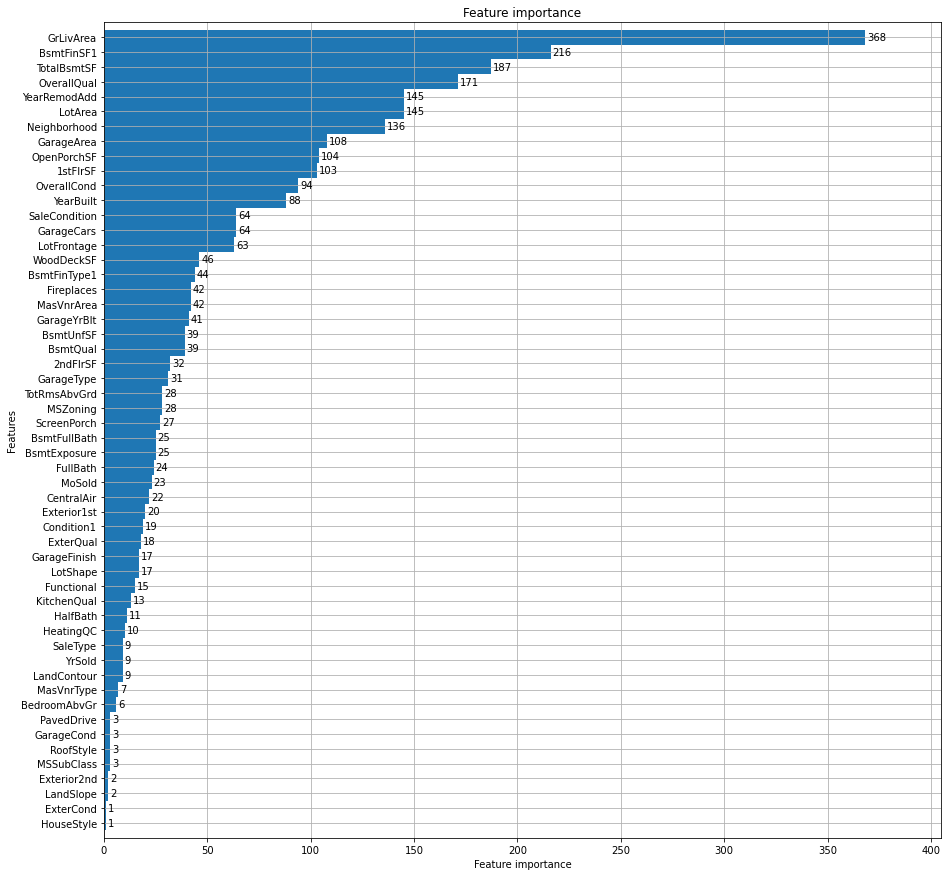

In [83]:
figsize=(15,15)
fig, ax = plt.subplots(1,1,figsize=figsize)
plot_importance(lgbm_model, ax=ax,height = 1)

GrlivArea, BsmtFinSF1, TotalBsmtSF seem strong predictors

## PREDICTON

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [85]:
df_pred=df_test

In [86]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_pred.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_pred[col] = le.fit_transform(df_pred[col])

In [87]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [88]:
X=df_pred

In [89]:
y_predict_final = best_cat.predict(X)

In [90]:
X['Id'] , y_predict_final

(0       1461
 1       1462
 2       1463
 3       1464
 4       1465
         ... 
 1454    2915
 1455    2916
 1456    2917
 1457    2918
 1458    2919
 Name: Id, Length: 1459, dtype: int64,
 array([113506.7302622 , 147501.64657909, 163291.4450922 , ...,
        159024.49180993, 116815.71768554, 223137.22627181]))

In [91]:
predictions = pd.DataFrame(zip(X['Id'], y_predict_final), columns=['Id', 'SalePrice'])


In [92]:
predictions

Id      SalePrice
0     1461  113506.730262
1     1462  147501.646579
2     1463  163291.445092
3     1464  162559.213412
4     1465  198732.734669
...    ...            ...
1454  2915   94941.076516
1455  2916   93841.847528
1456  2917  159024.491810
1457  2918  116815.717686
1458  2919  223137.226272

[1459 rows x 2 columns]

In [93]:
predictions['Id'] = predictions['Id'].astype('int')

predictions.to_csv('submissions.csv', index=False)